In [1]:
import numpy as np
import geopandas as gpd
import pickle

from skgstat import Variogram, OrdinaryKriging
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
udf = gpd.read_file(r"hillside_inventory_LA_centrality_full_new_evacmidnorth_lodes.geojson")

In [3]:
udf_before = udf.copy()

In [4]:
print(udf.columns)

Index(['OBJECTID', 'SECT_ID', 'ST_DIR', 'ST_NAME', 'ST_FROM', 'ST_TO',
       'ST_TYPE', 'ST_SURFACE', 'SSORT2', 'SSORT1', 'LANE_MILES', 'CL_MILES',
       'CD', 'ST_LENGTH', 'ST_WIDTH', 'Shape__Length', 'source', 'pci',
       'cond_status', 'Street_Designation', 'Curbs', 'Sidewalks',
       'required_width', 'width_ratio', 'sidewalk_ratio', 'curb_ratio',
       'rating', 'centrality_distance', 'centrality_population',
       'centrality_time', 'centrality_width', 'centroid_lat', 'centroid_lon',
       'DAC', 'BufferYN', 'lowincome', 'scagfldzn', 'scagsubty',
       'scaganualhazardflood', 'Burn_Prob', 'mean_left_side', 'std_left_side',
       'min_left_side', 'max_left_side', 'mean_right_side', 'std_right_side',
       'min_right_side', 'max_right_side', 'street_slope_per_length',
       'street_slope_absolute', 'currently_withdrawn', 'prev_withdrawn',
       'prev_withdrawn_unmaintained', 'unmaintained_add',
       'prev_withdrawn_maintained', 'maintained', 'landslide_zone',
       

In [5]:
# print unique values in udf['Street_Designation'] & its length

print(udf['Street_Designation'].unique())
print(len(udf['Street_Designation'].unique()))

['Local Street - Standard' 'Collector' 'Avenue I' 'Boulevard II'
 'Avenue II' 'Unidentified' 'Avenue III' 'Modified Avenue II'
 'Modified Avenue I' 'Modified Boulevard II' None 'Private' 'Boulevard I'
 'Mountain Collector' 'Modified Collector' 'Hillside Collector'
 'Scenic Parkway' 'Modified Avenue III'
 'Modified Scenic Arterial Mountain' 'Modified Local Street - Standard']
20


In [6]:
print('Potential Designations: \n')
for designation in udf['Street_Designation'].unique():
    print(designation)

Local Street - Standard
Collector
Avenue I
Boulevard II
Avenue II
Unidentified
Avenue III
Modified Avenue II
Modified Avenue I
Modified Boulevard II
None
Private
Boulevard I
Mountain Collector
Modified Collector
Hillside Collector
Scenic Parkway
Modified Avenue III
Modified Scenic Arterial Mountain
Modified Local Street - Standard


In [7]:
# # S000_adjusted

# for designation in udf['Street_Designation'].unique():
#     print(designation)
#     x1 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] != 0)]['centroid_lat'].to_numpy()
#     y1 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] != 0)]['centroid_lon'].to_numpy()
#     z_S000 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] != 0)]['S000_adjusted'].to_numpy()

#     x2 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] == 0)]['centroid_lat'].to_numpy()
#     y2 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] == 0)]['centroid_lon'].to_numpy()

#     if len(x1) == 0:
#         print("No data for designation: ", designation)

#     else:
#         if len(np.unique(z_S000)) == 1:
#             print("All values in z1 are constant for designation: ", designation)
#         else:
#             print("Values in z1 are not constant.")
#             variogram_model_S000 = Variogram(np.vstack((x1, y1)).T, z_S000)

#             ok_S000 = OrdinaryKriging(variogram_model_S000, min_points=2, max_points=10, mode='exact')

#             field_S000 = ok_S000.transform(x2, y2)

#             print(str(len(field_S000)) + " values in field for designation: ", designation)
#             print(str(len(x2)) + " should ideally be updated for designation: ", designation)

#             # norm = Normalize(vmin=min(np.min(z1), np.min(field)), vmax=max(np.max(z1), np.max(field)))

#             if len(x2) == len(field_S000):
#                 print("Lengths match for designation: ", designation)
#                 for i in range(len(x2)):
#                     udf.loc[(udf['centroid_lat'] == x2[i]) & (udf['centroid_lon'] == y2[i]), 'S000_adjusted'] = field_S000[i]

#             else:
#                 print("Lengths do not match for designation: ", designation)
#                 # for i in range(len(x2)):
#                 #     udf.loc[(udf['centroid_lat'] == x2[i]) & (udf['centroid_lon'] == y2[i]), 'S000_adjusted'] = field_S000[i]



 Currently updating:  SA01_adjusted
Local Street - Standard

 Values in z1 are not constant.


910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


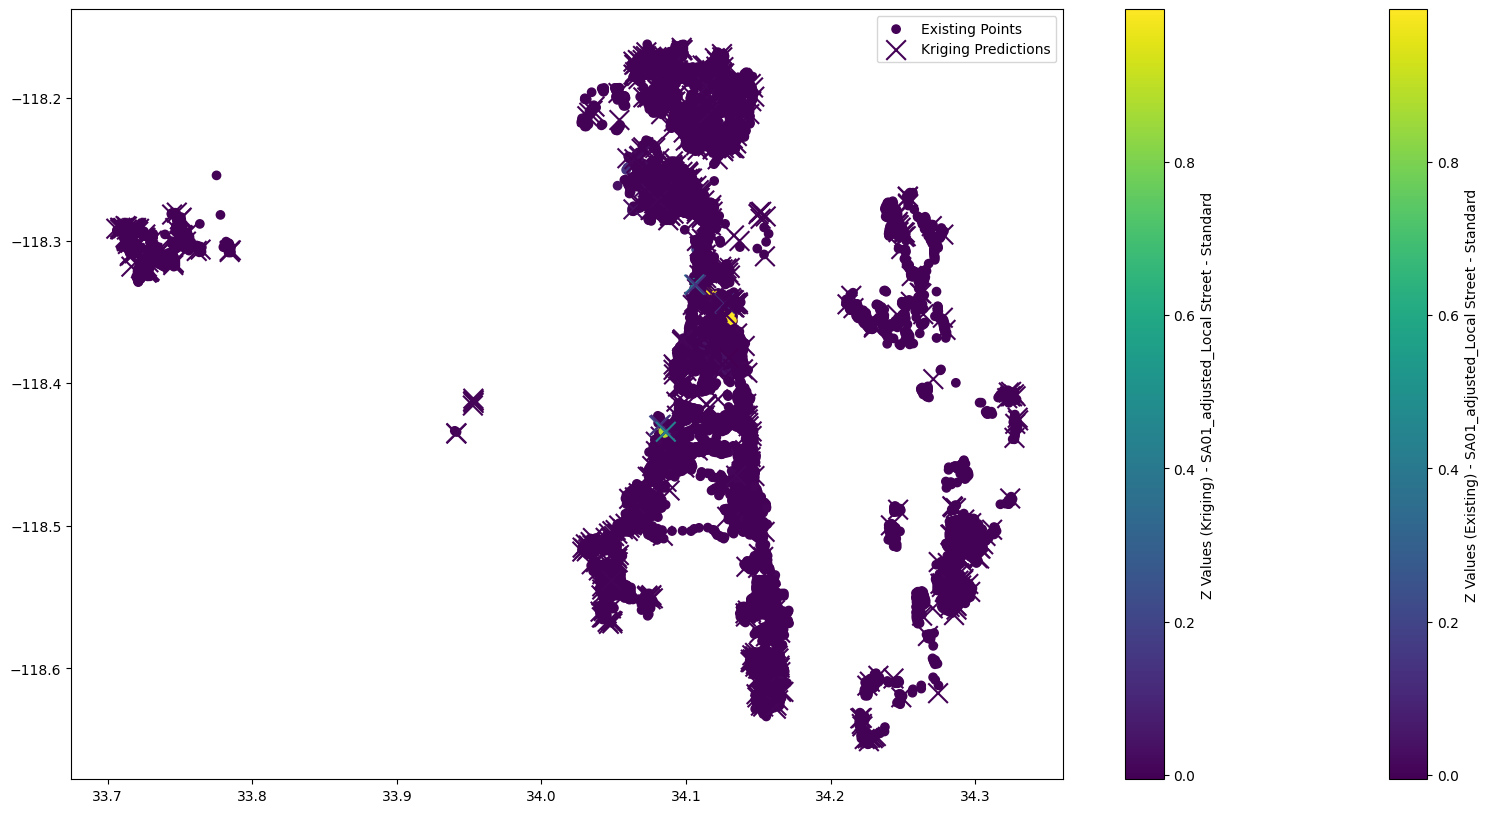

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


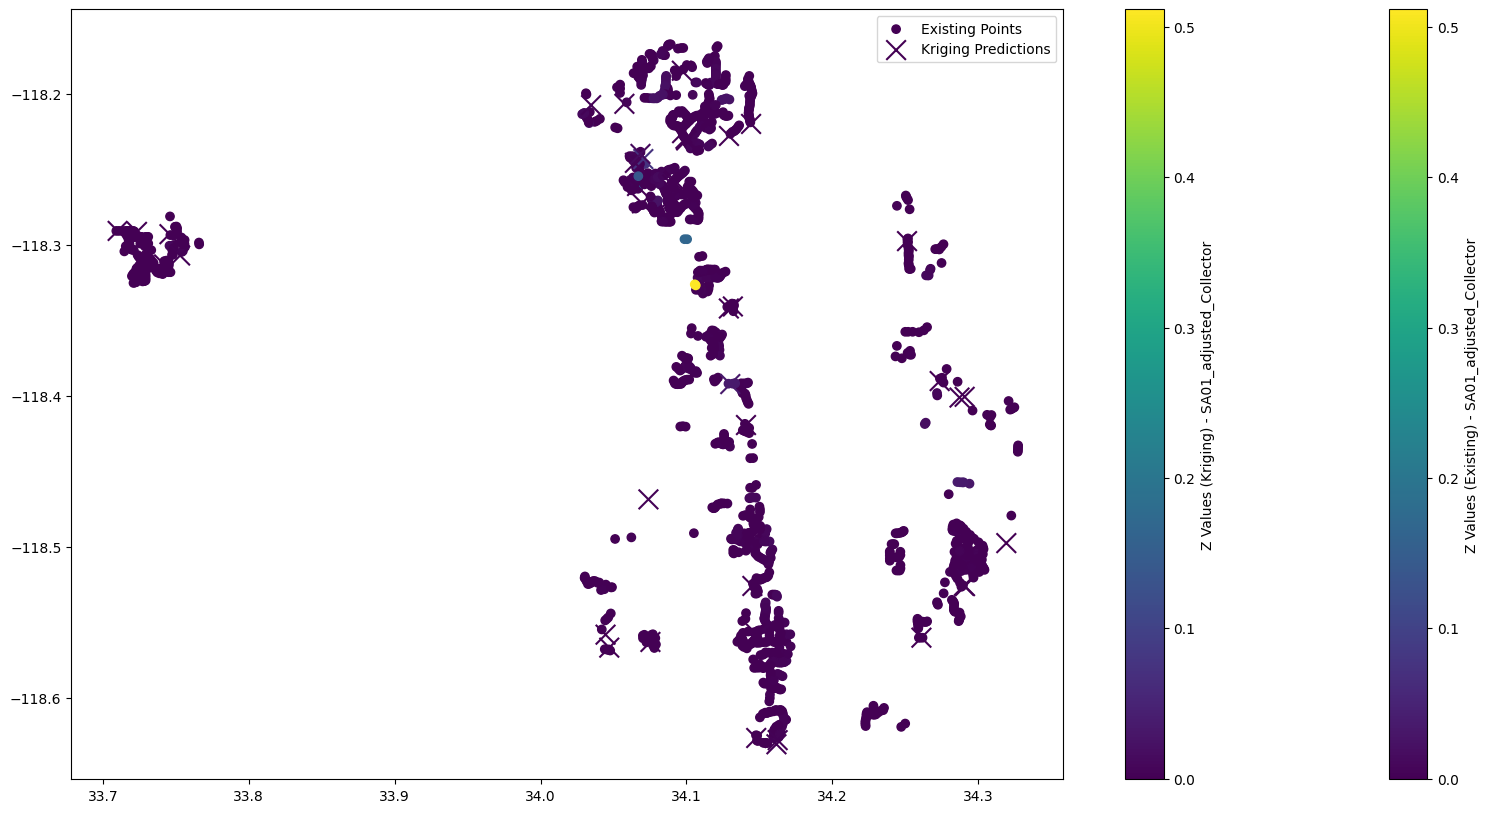

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


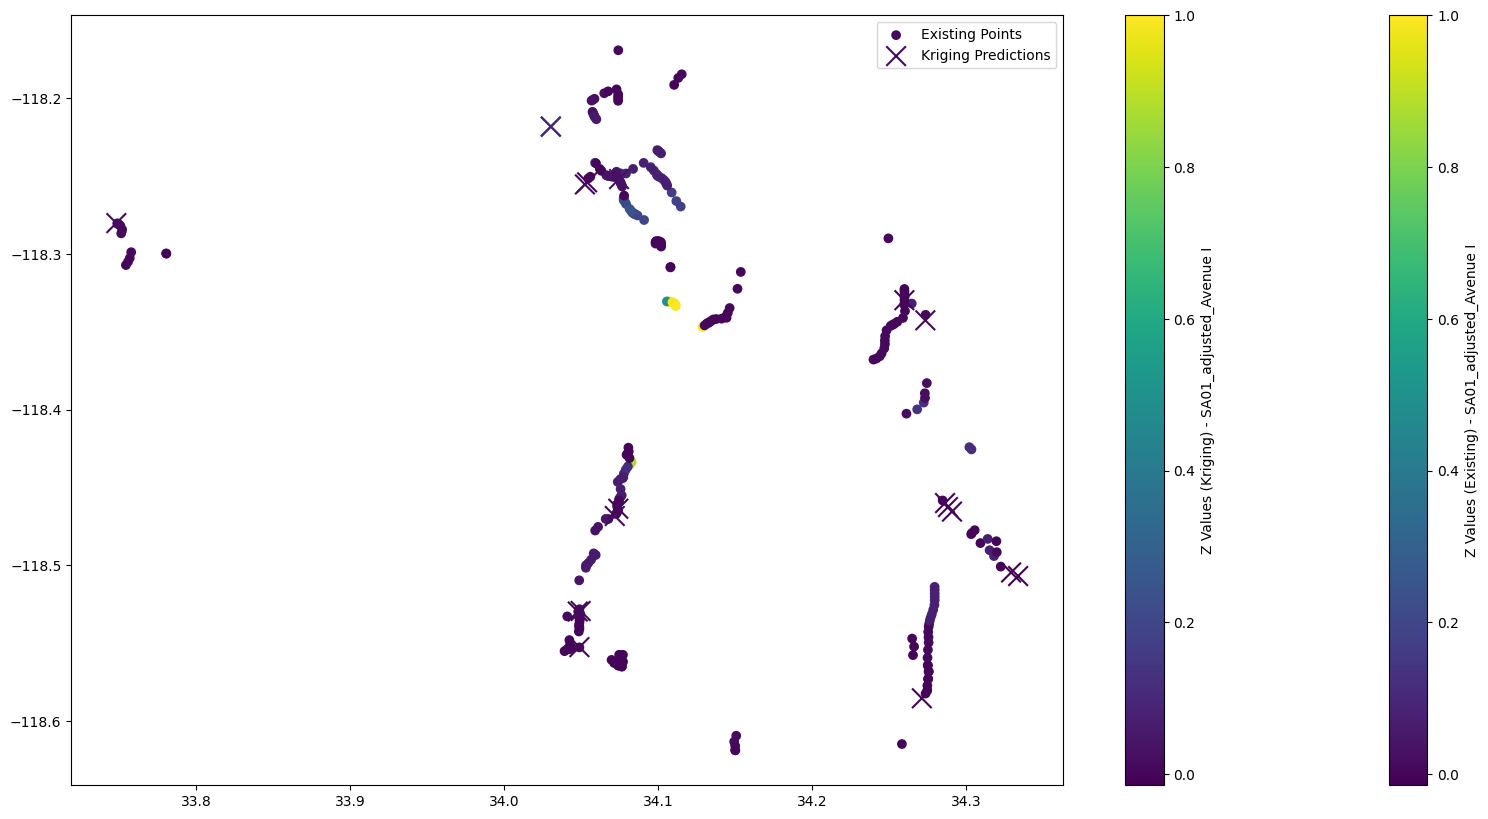

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


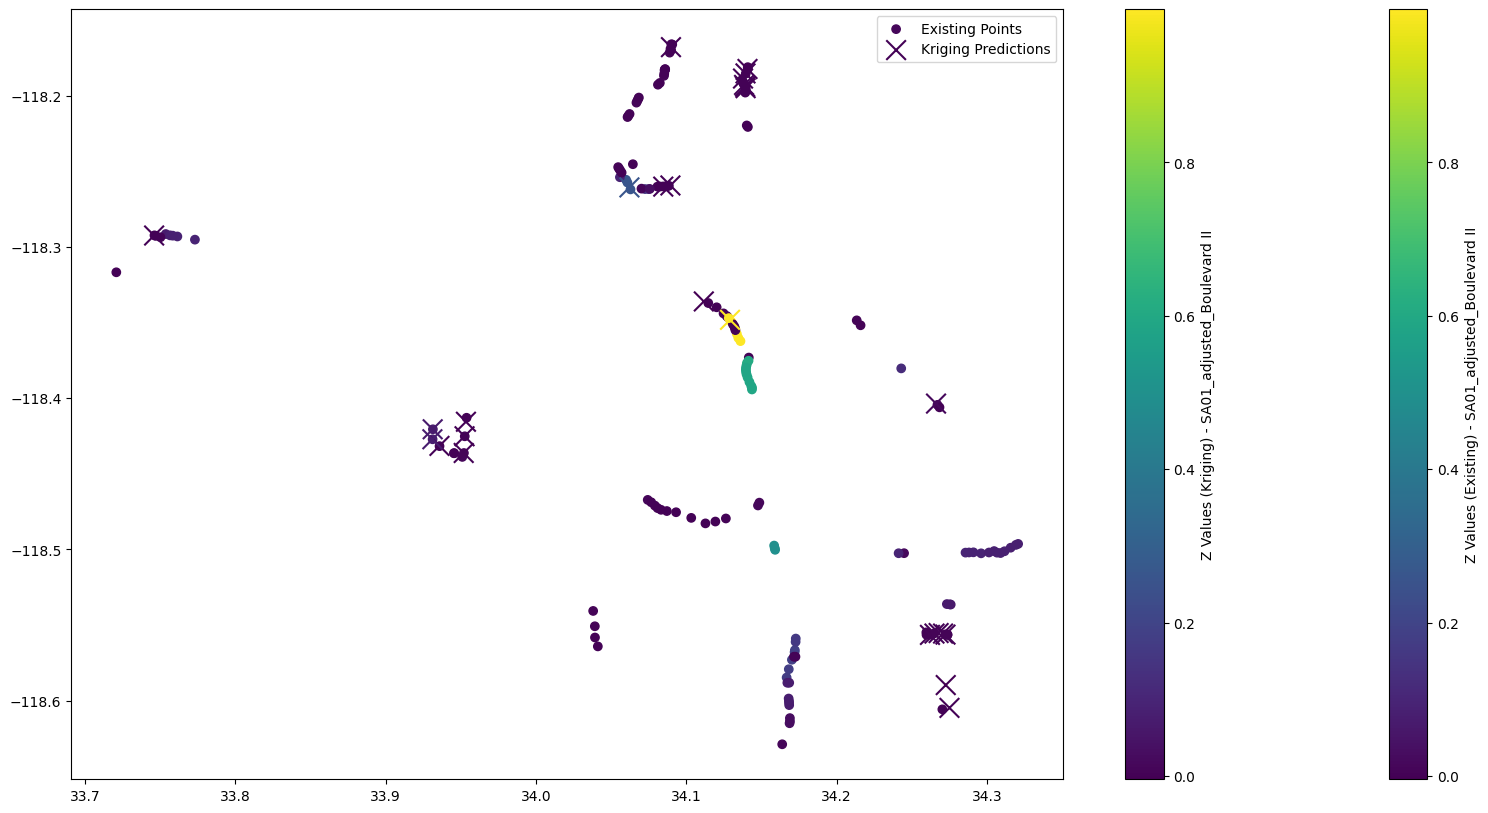

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


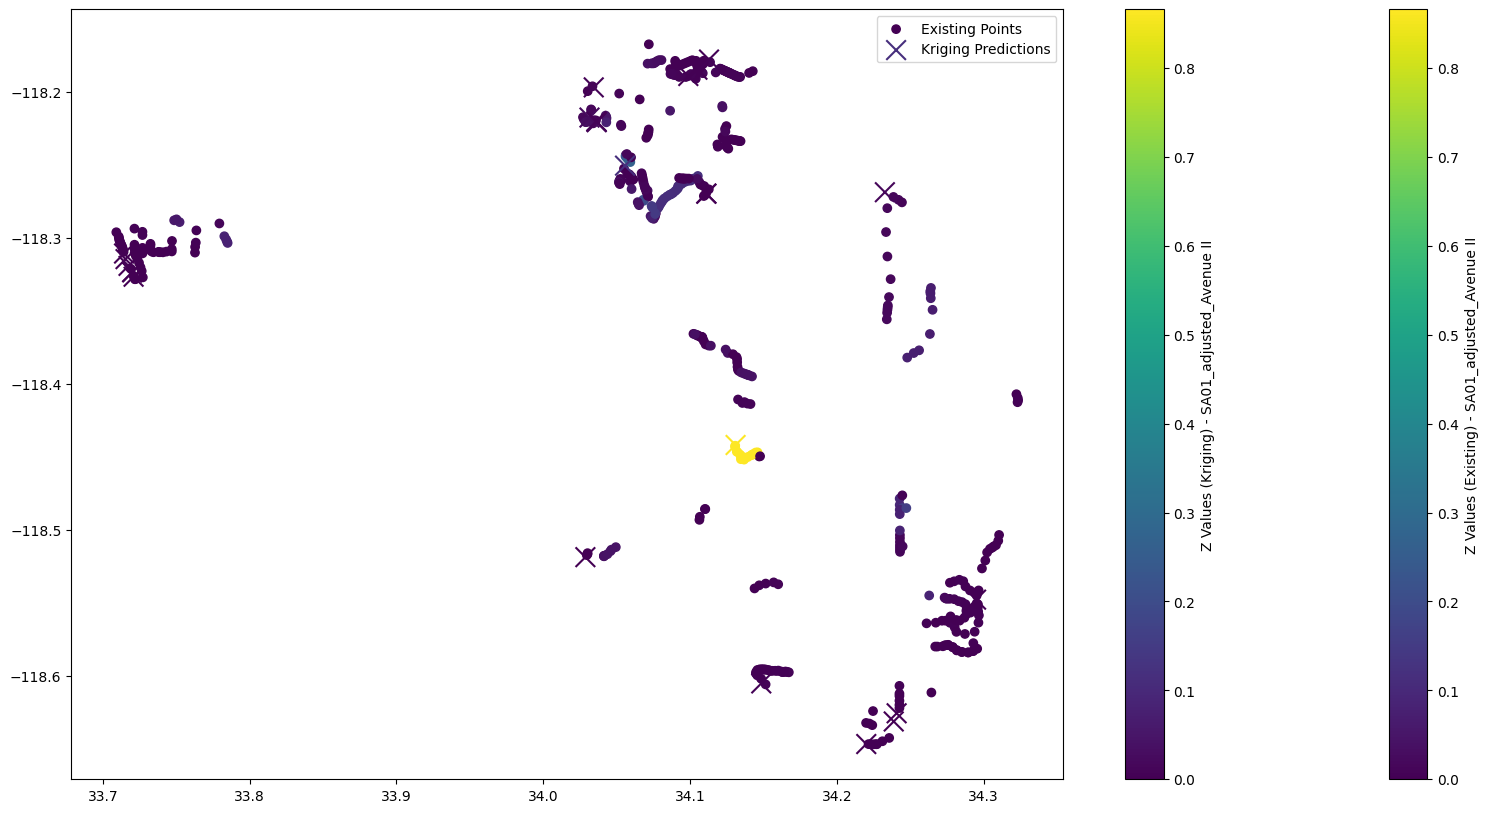

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


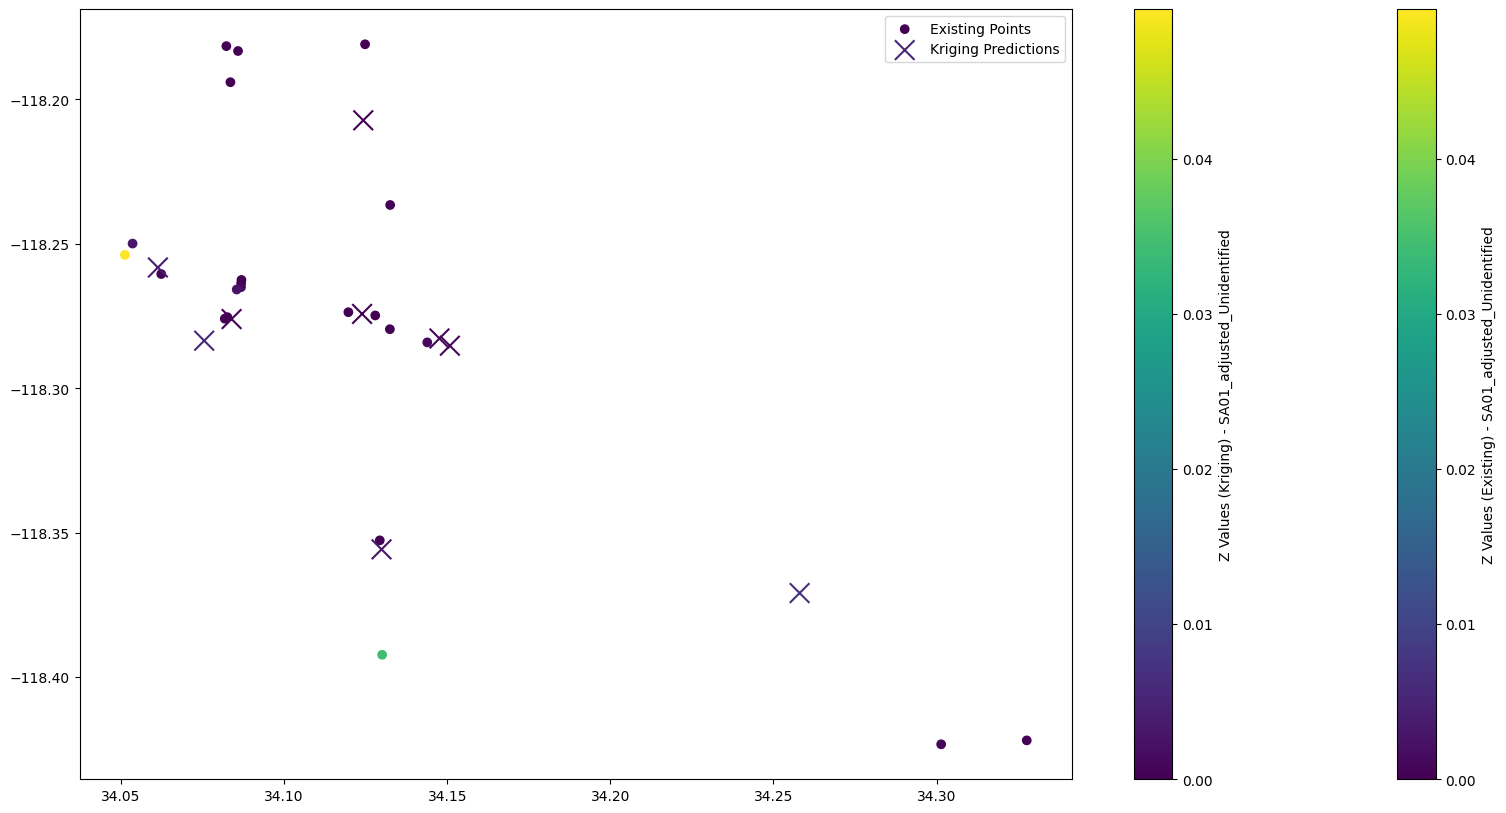

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


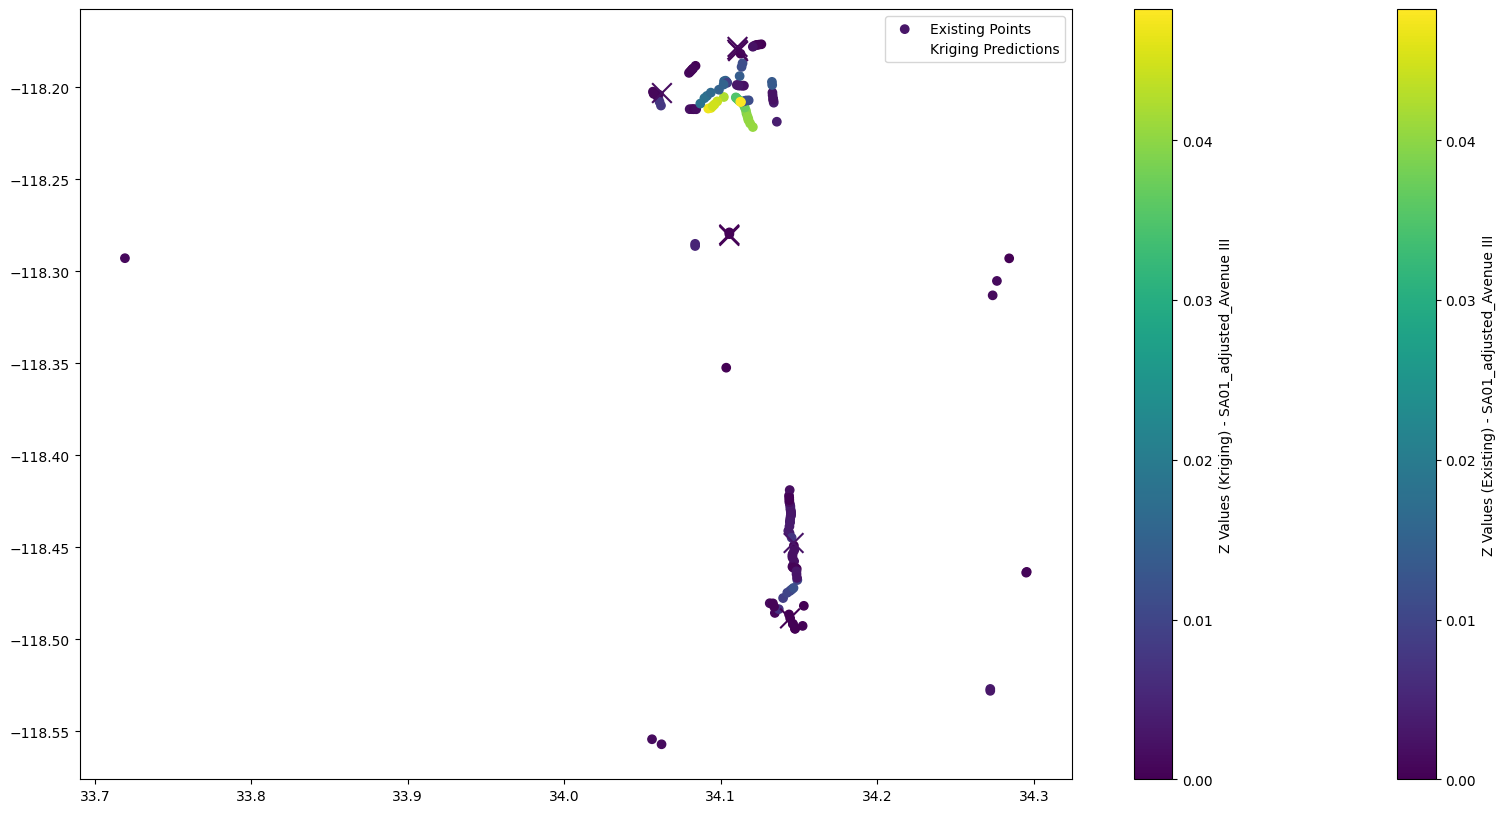

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


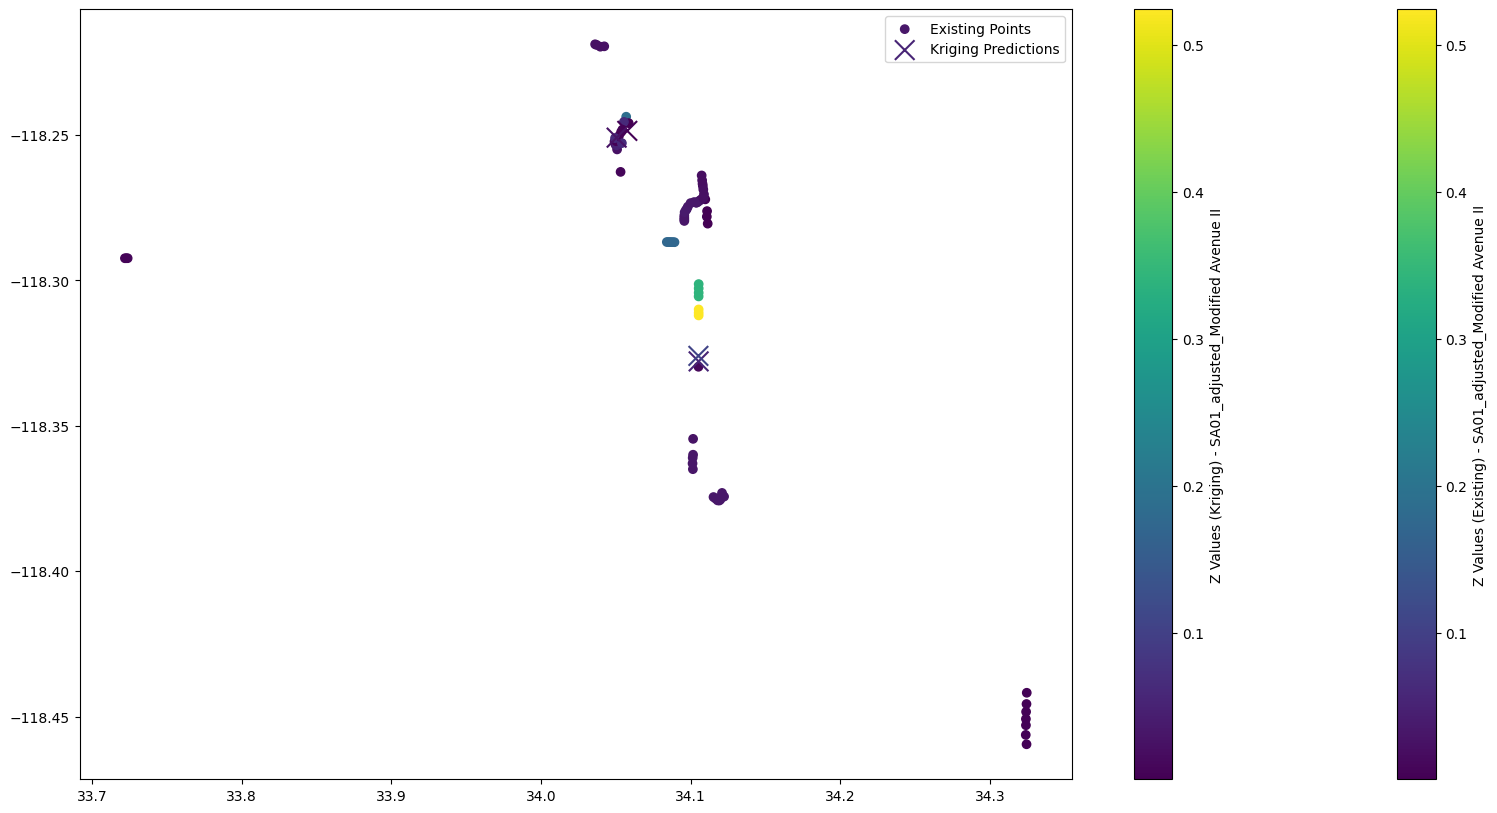

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


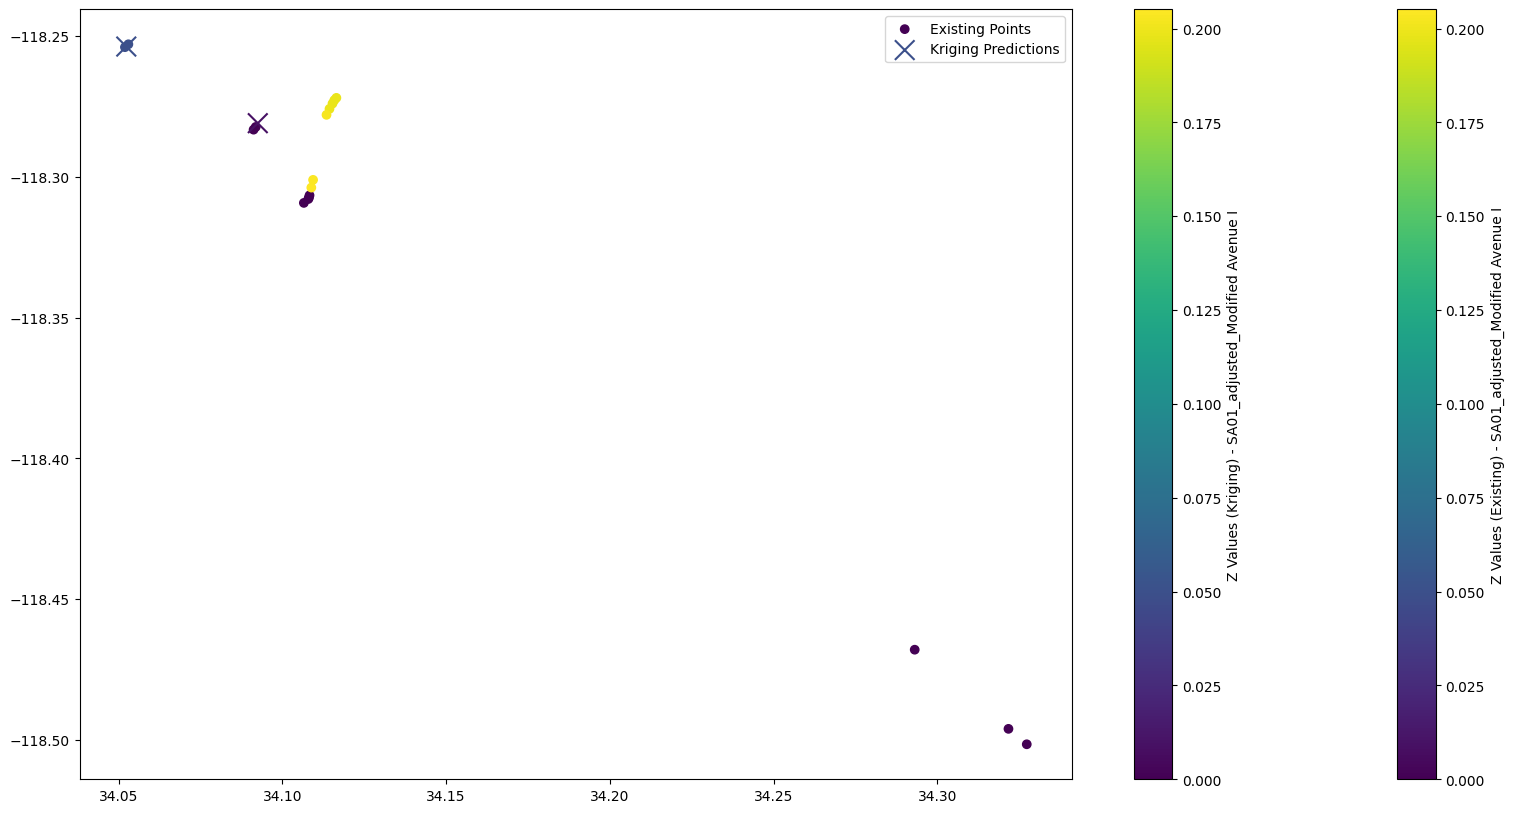

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


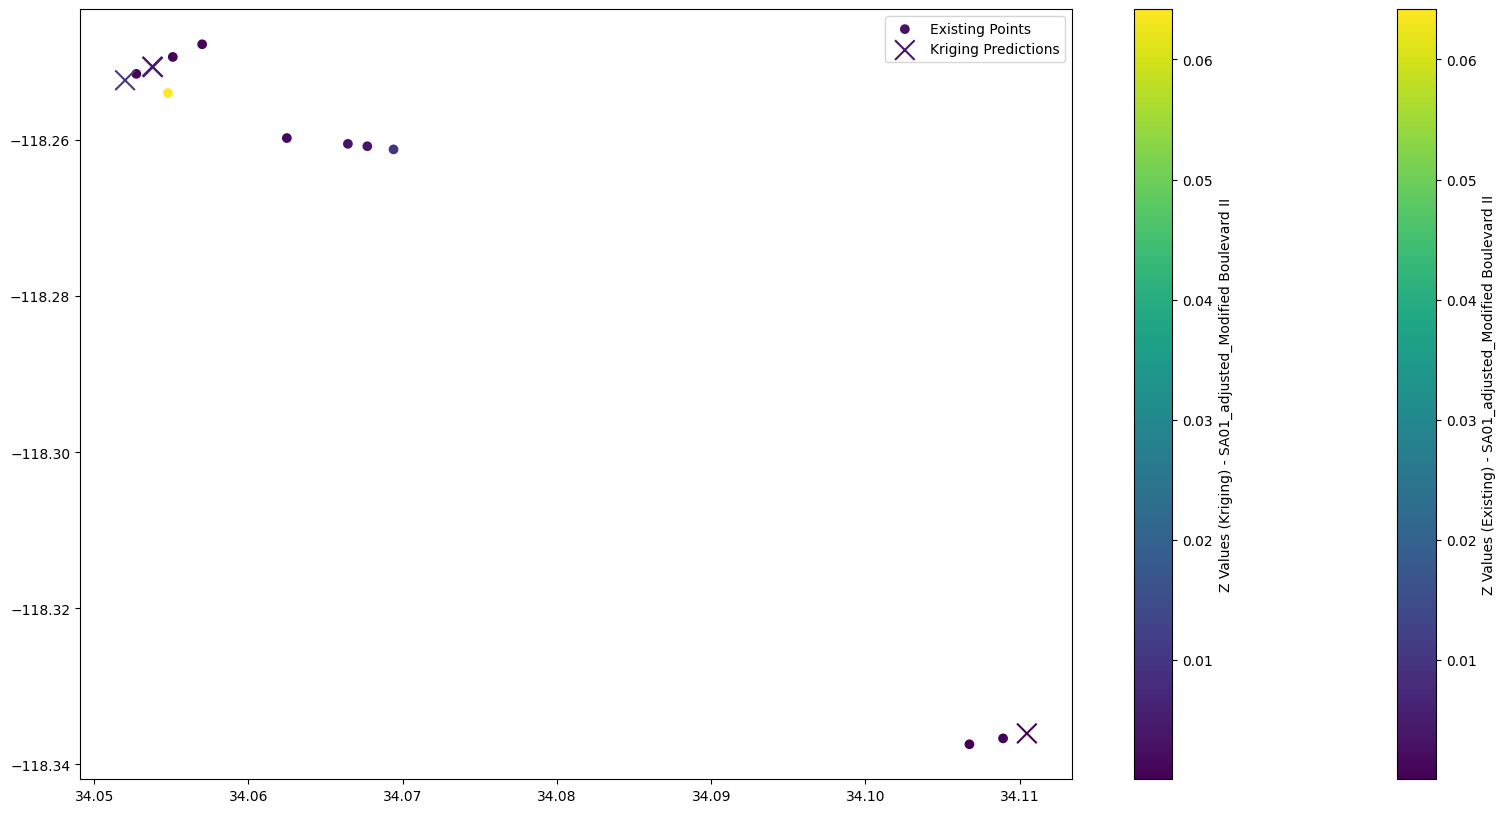

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  SA02_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


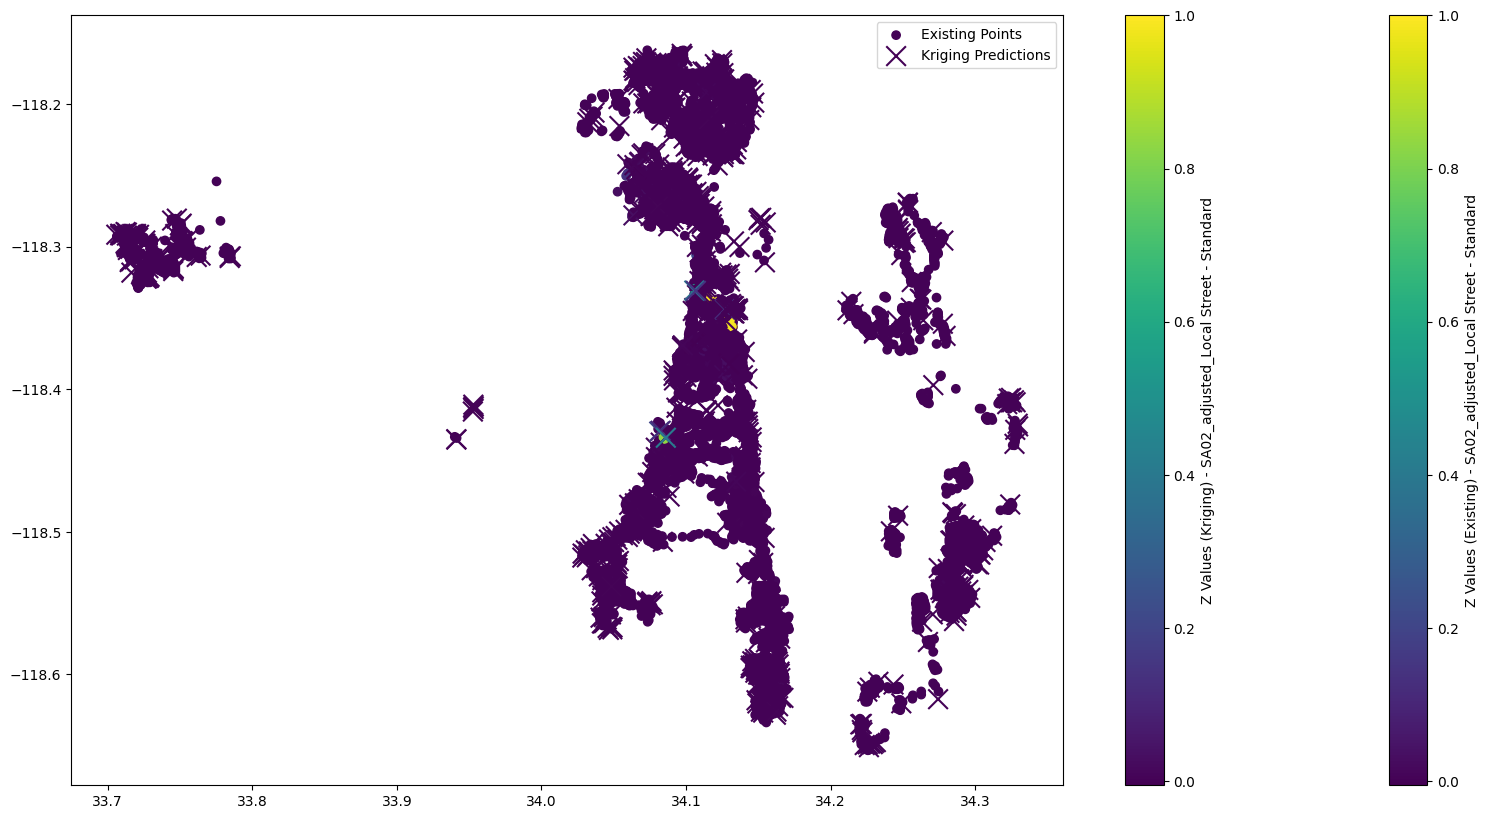

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


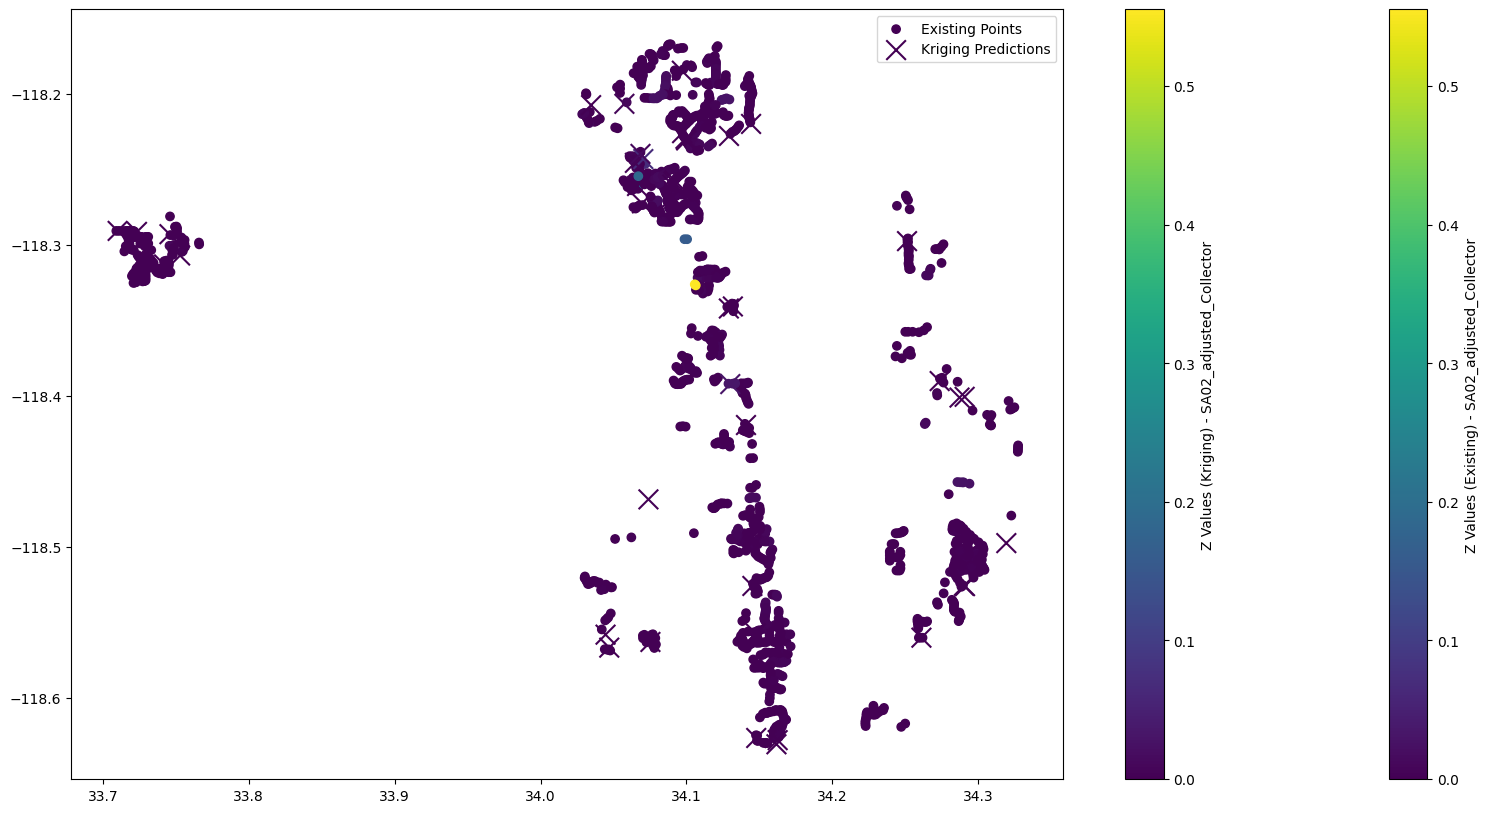

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


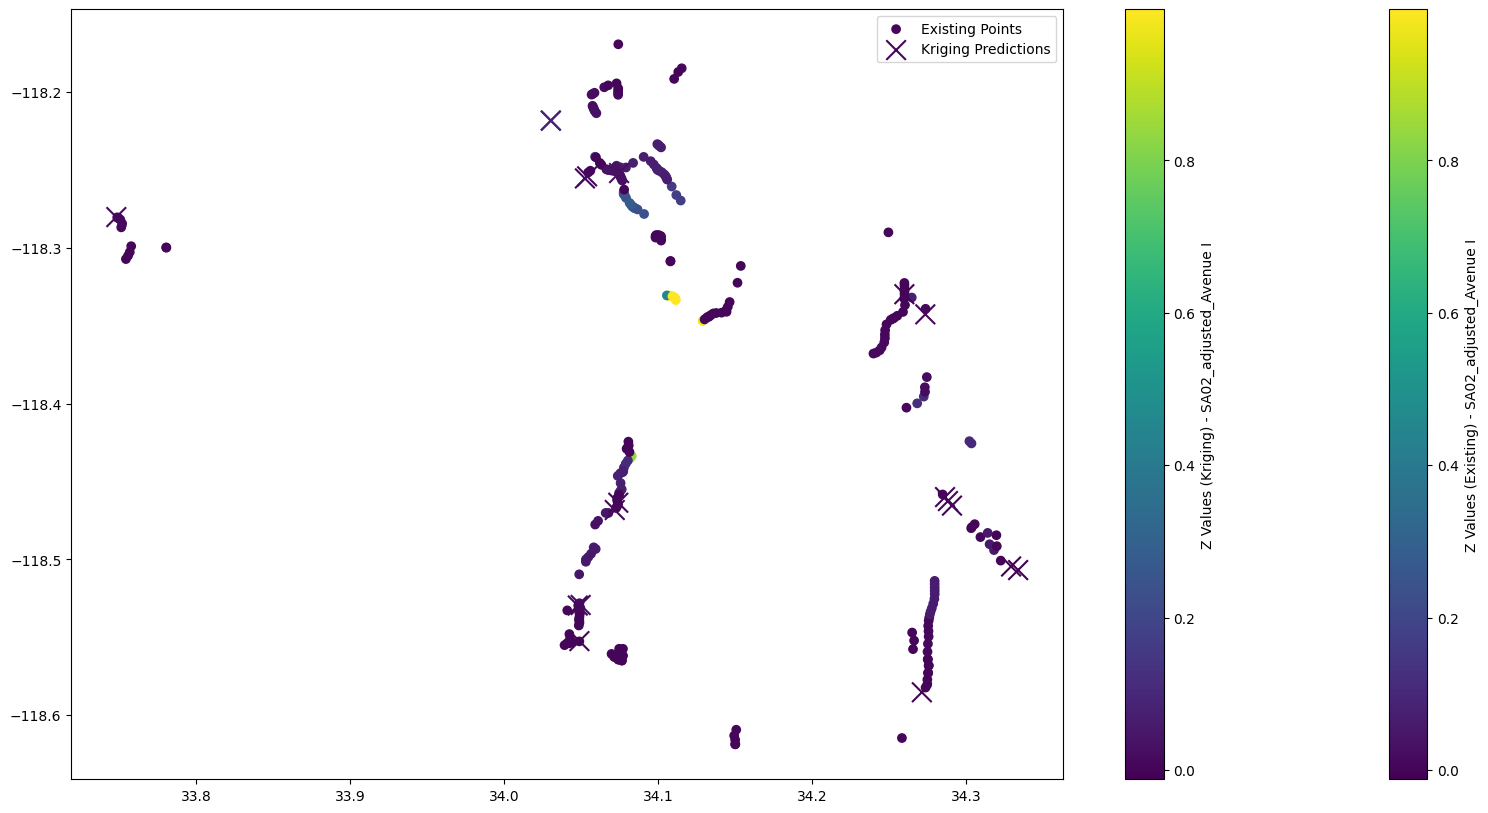

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


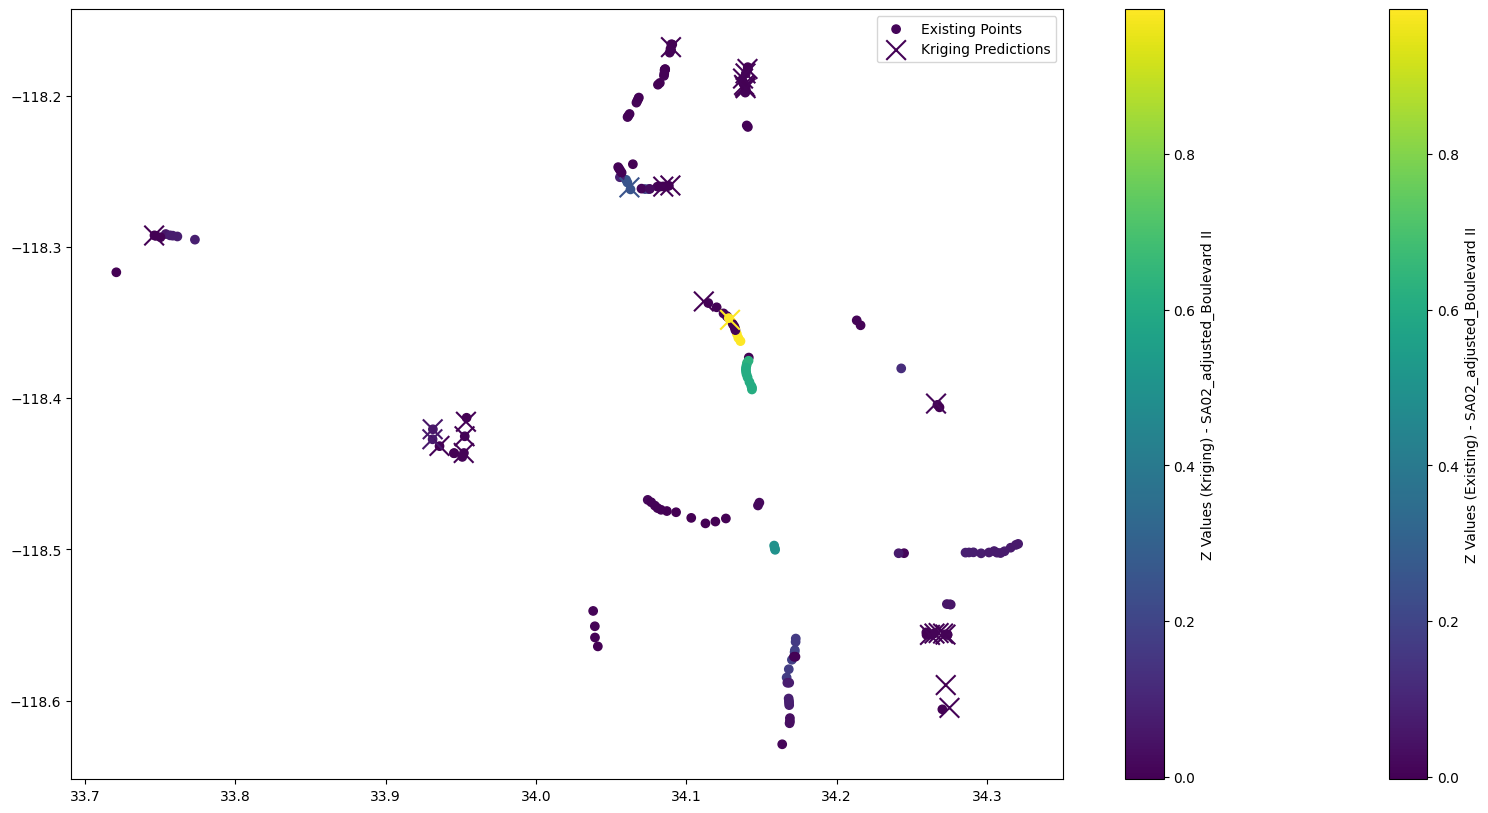

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


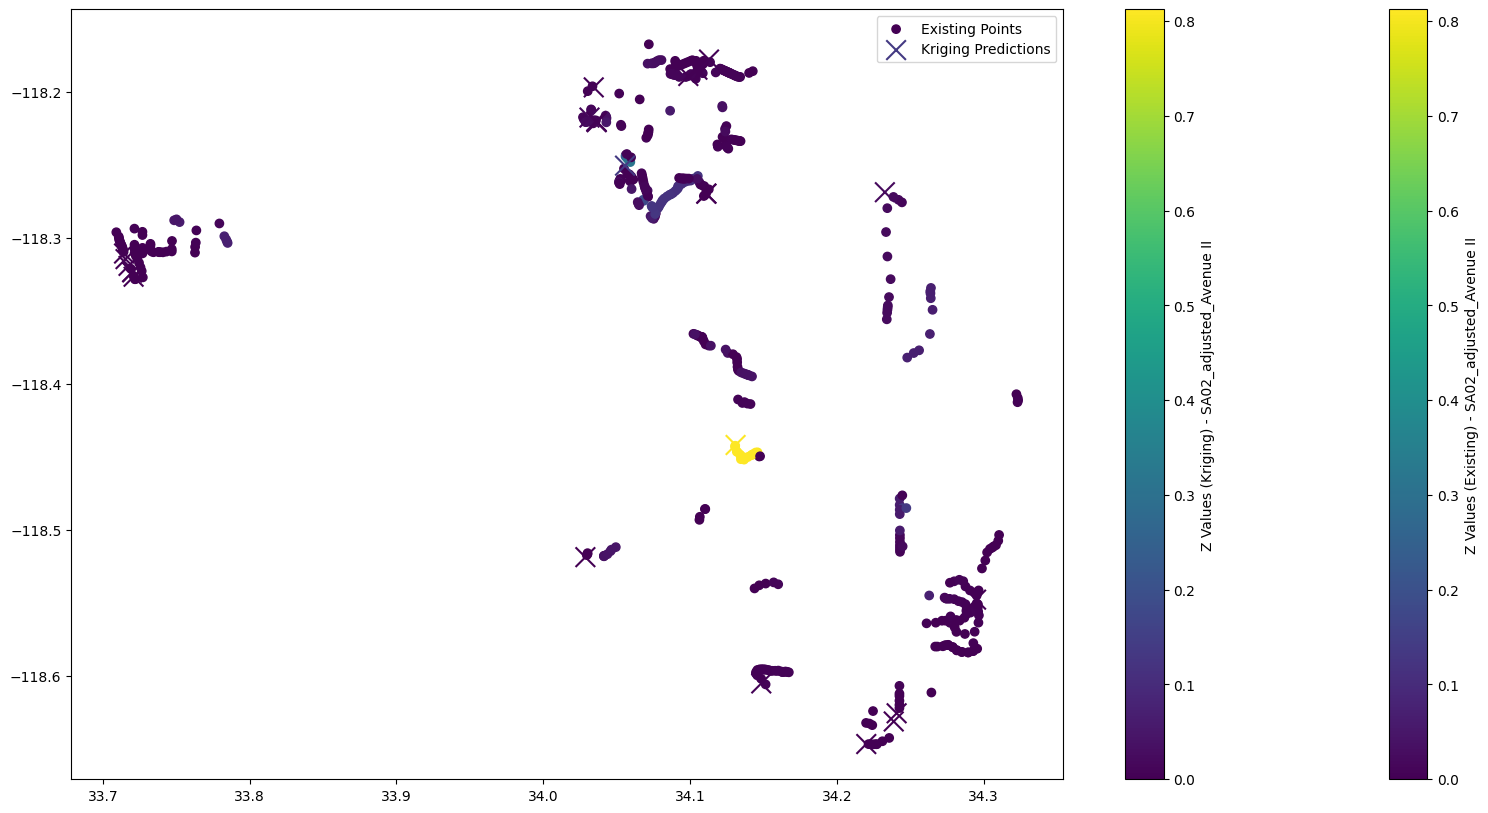

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


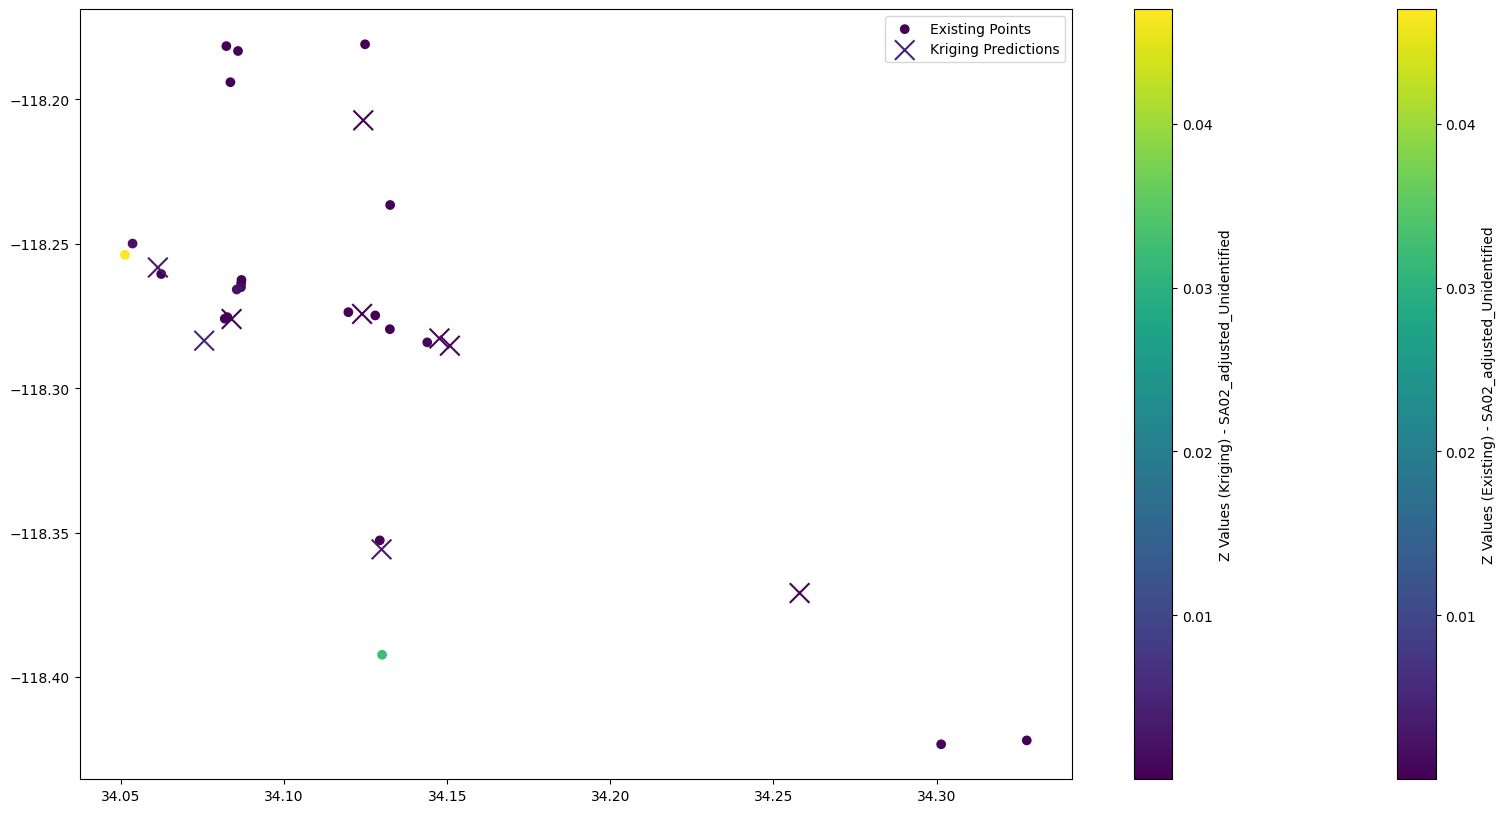

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


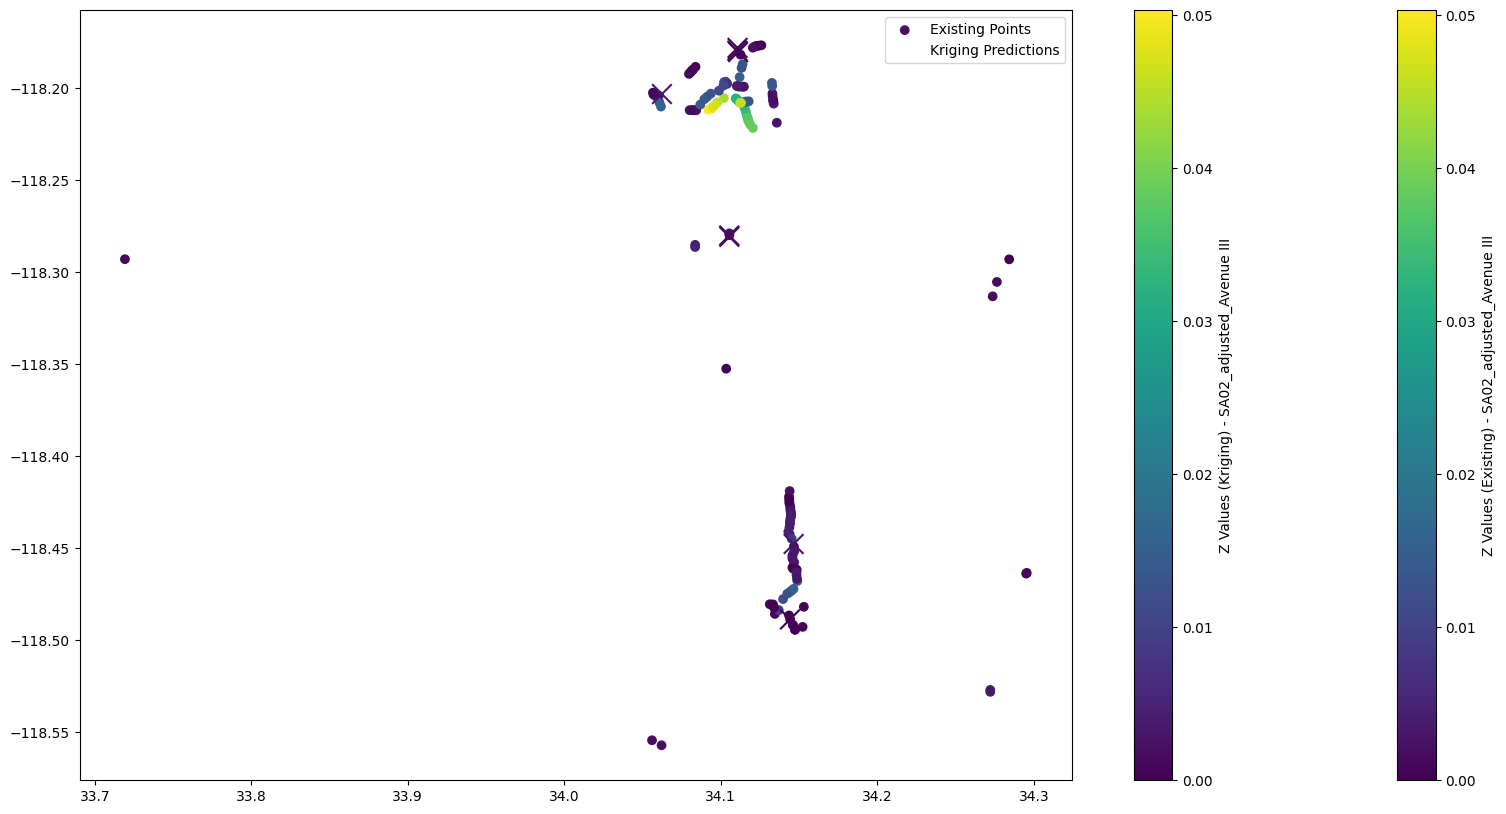

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


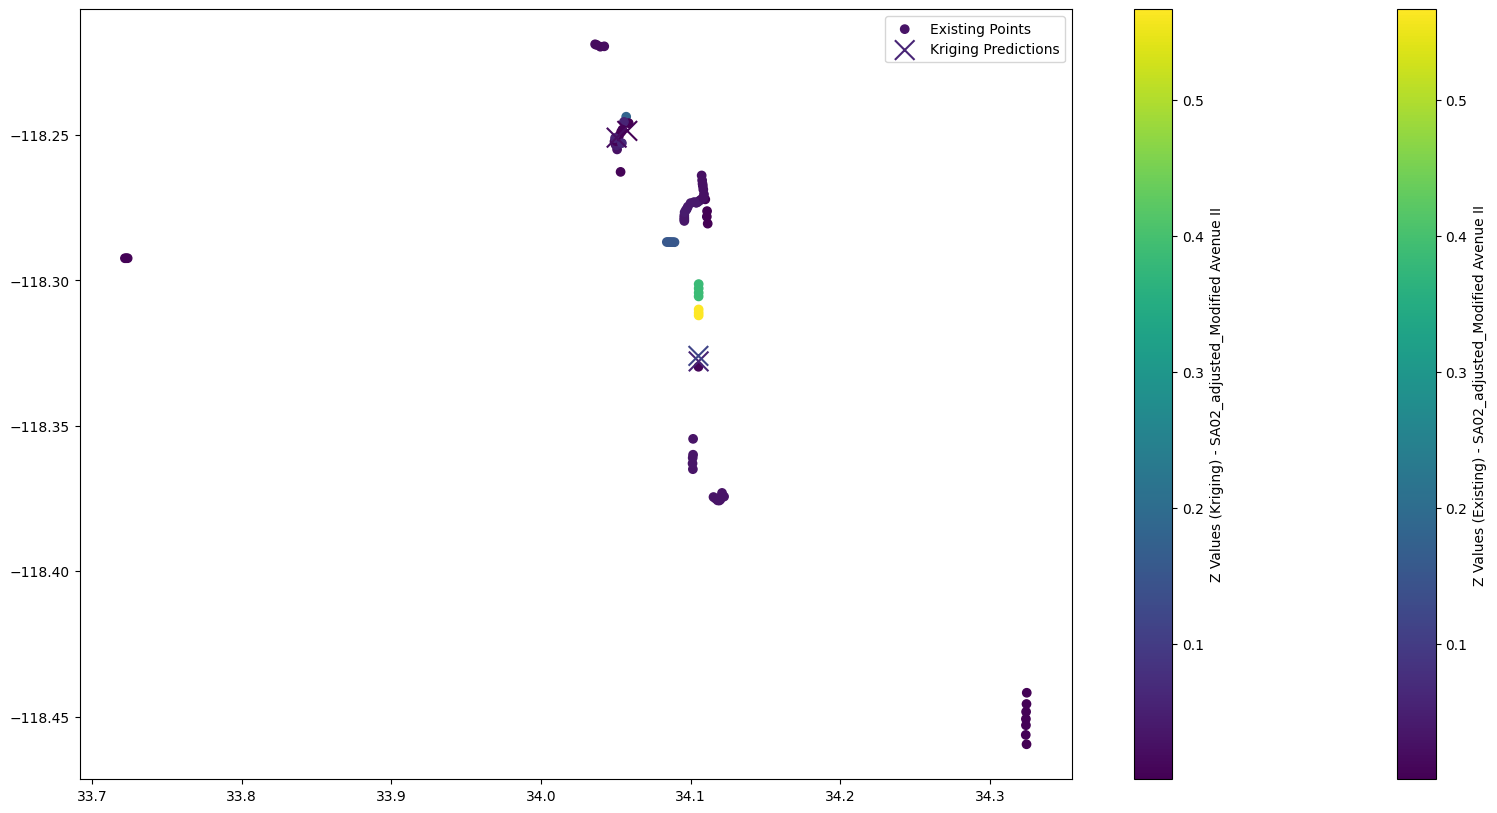

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


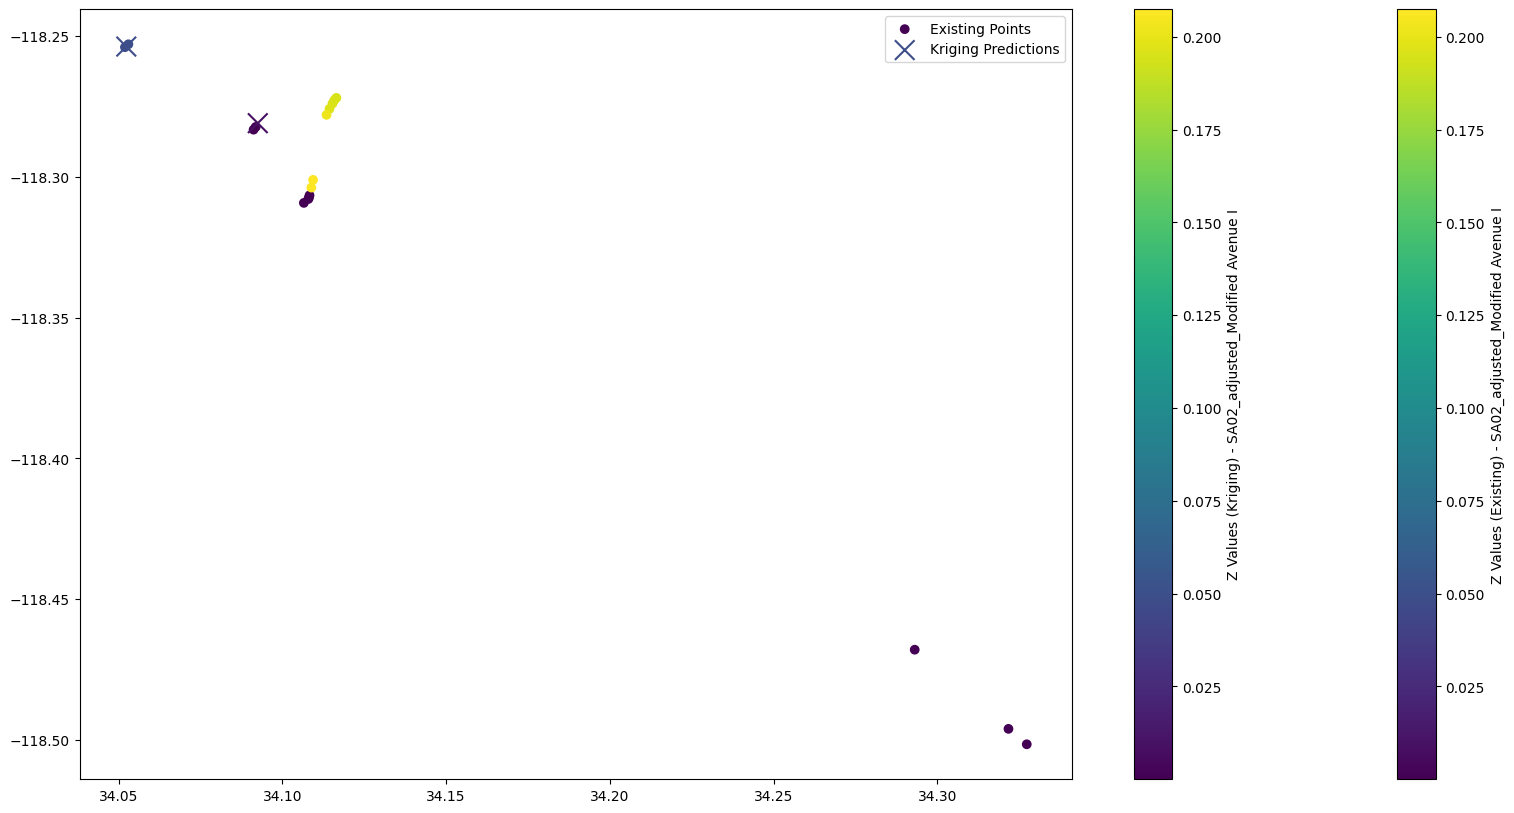

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


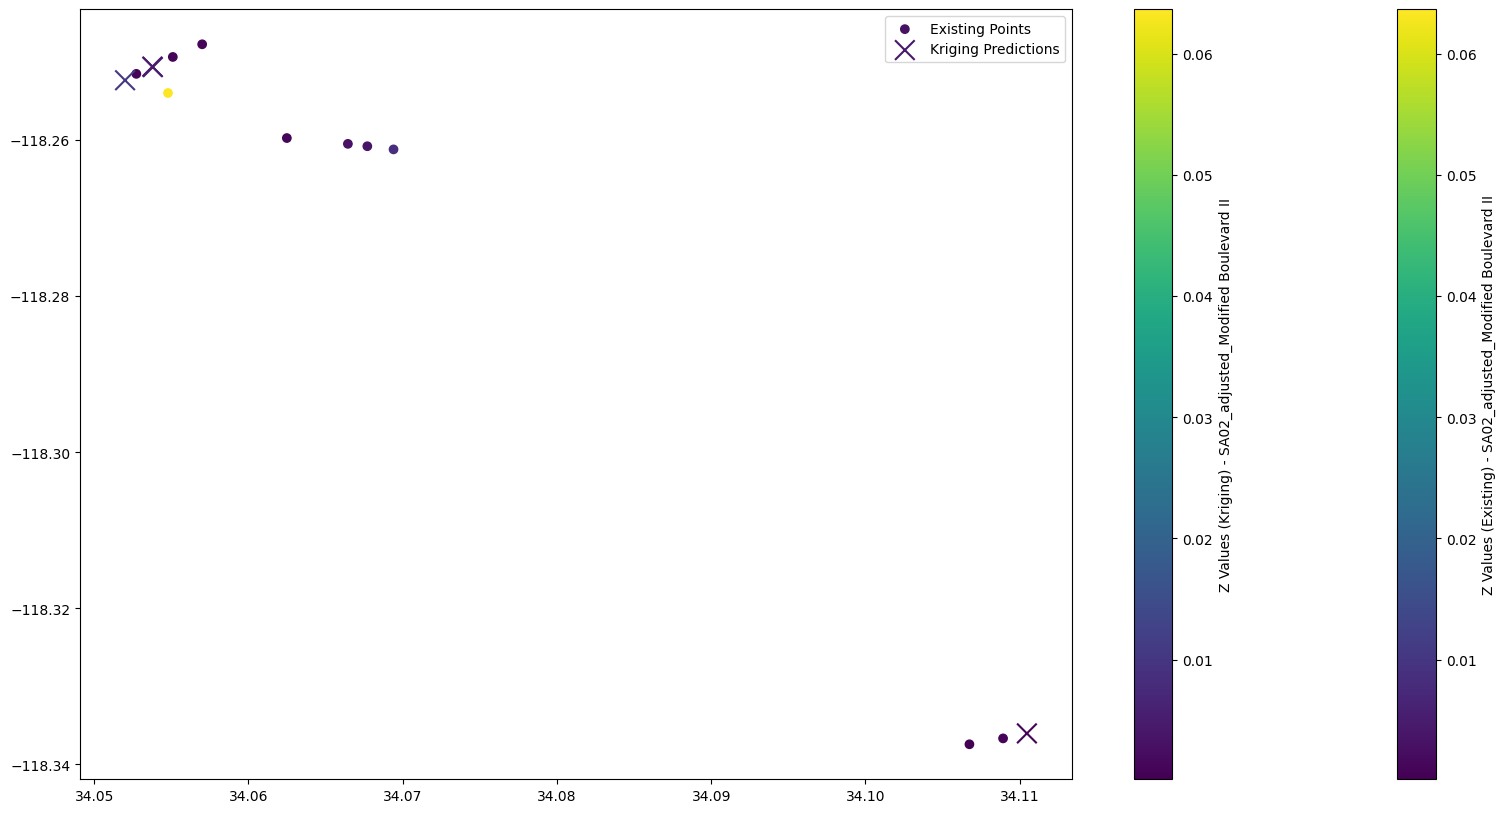

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  SA03_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


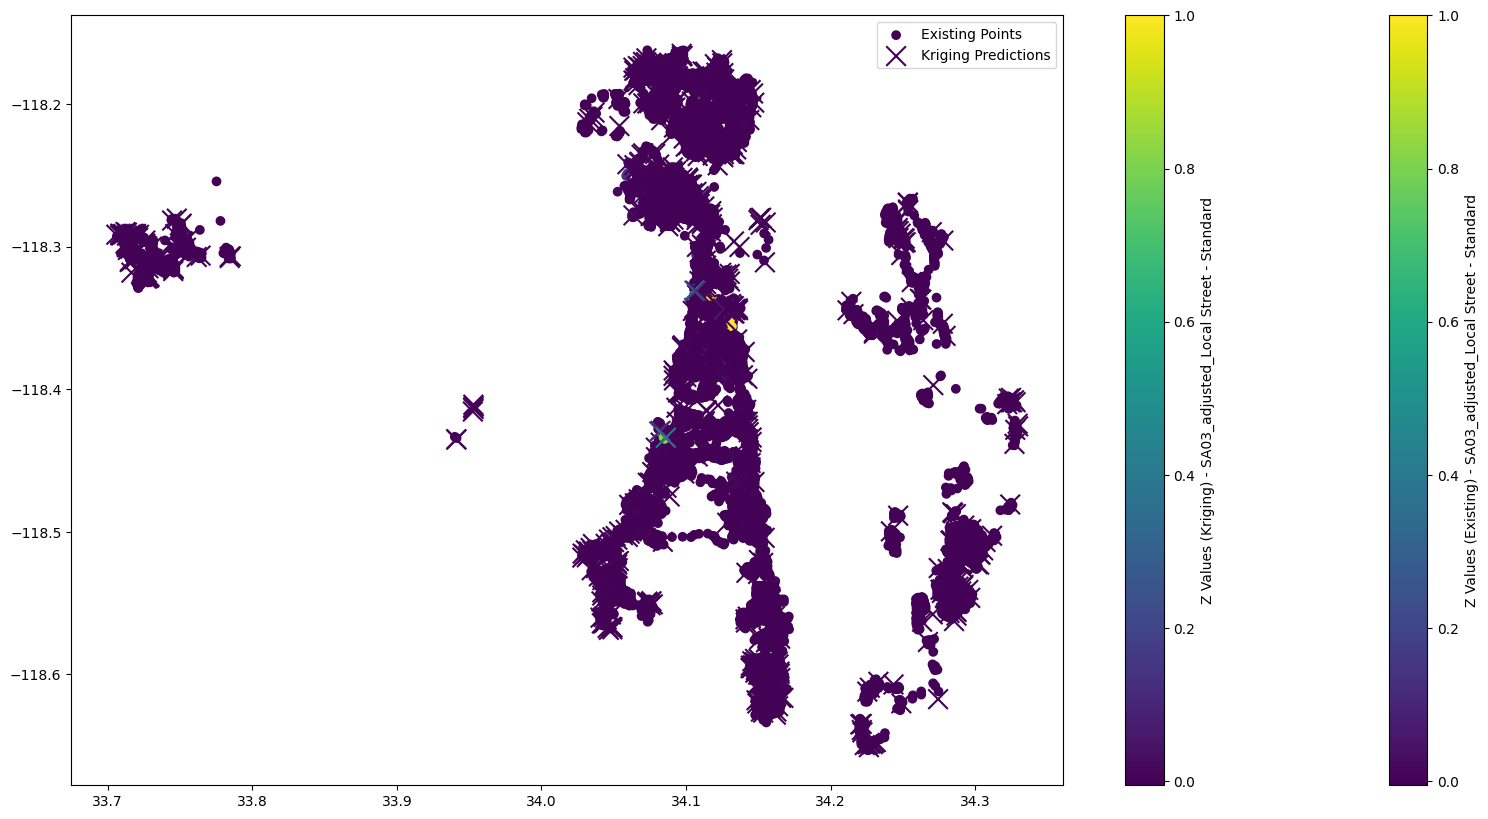

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


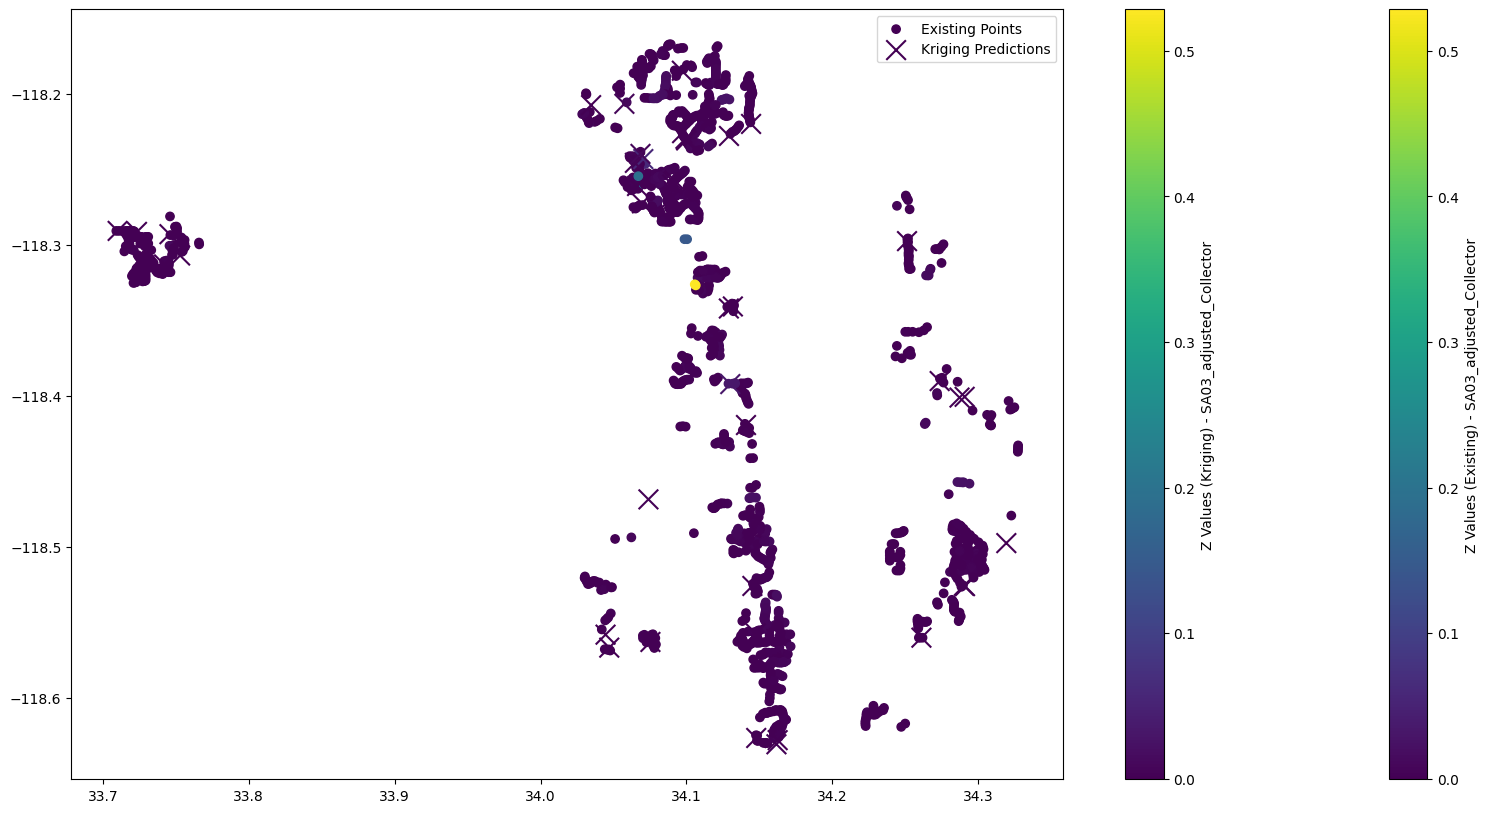

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


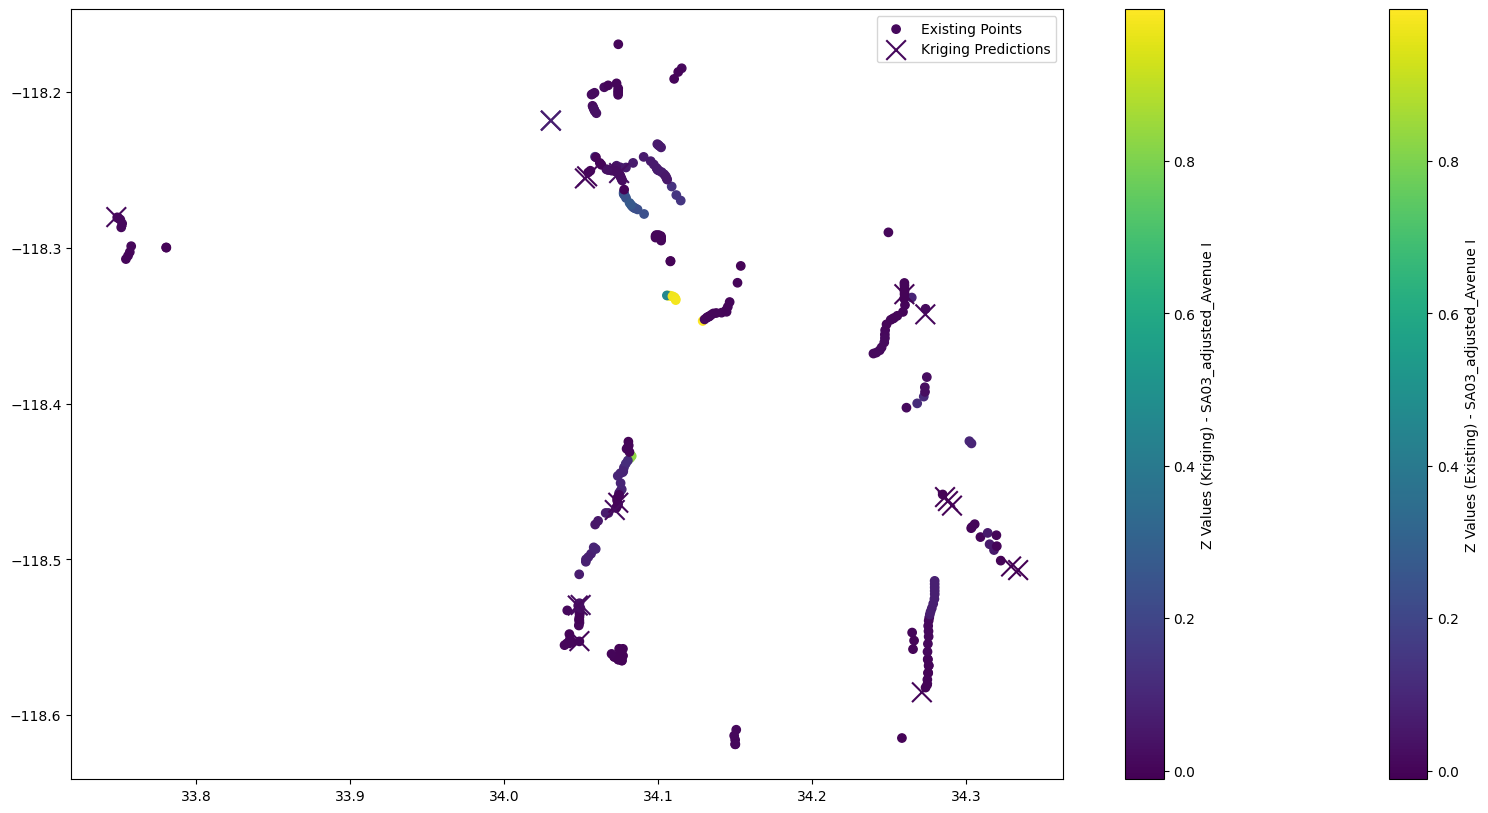

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


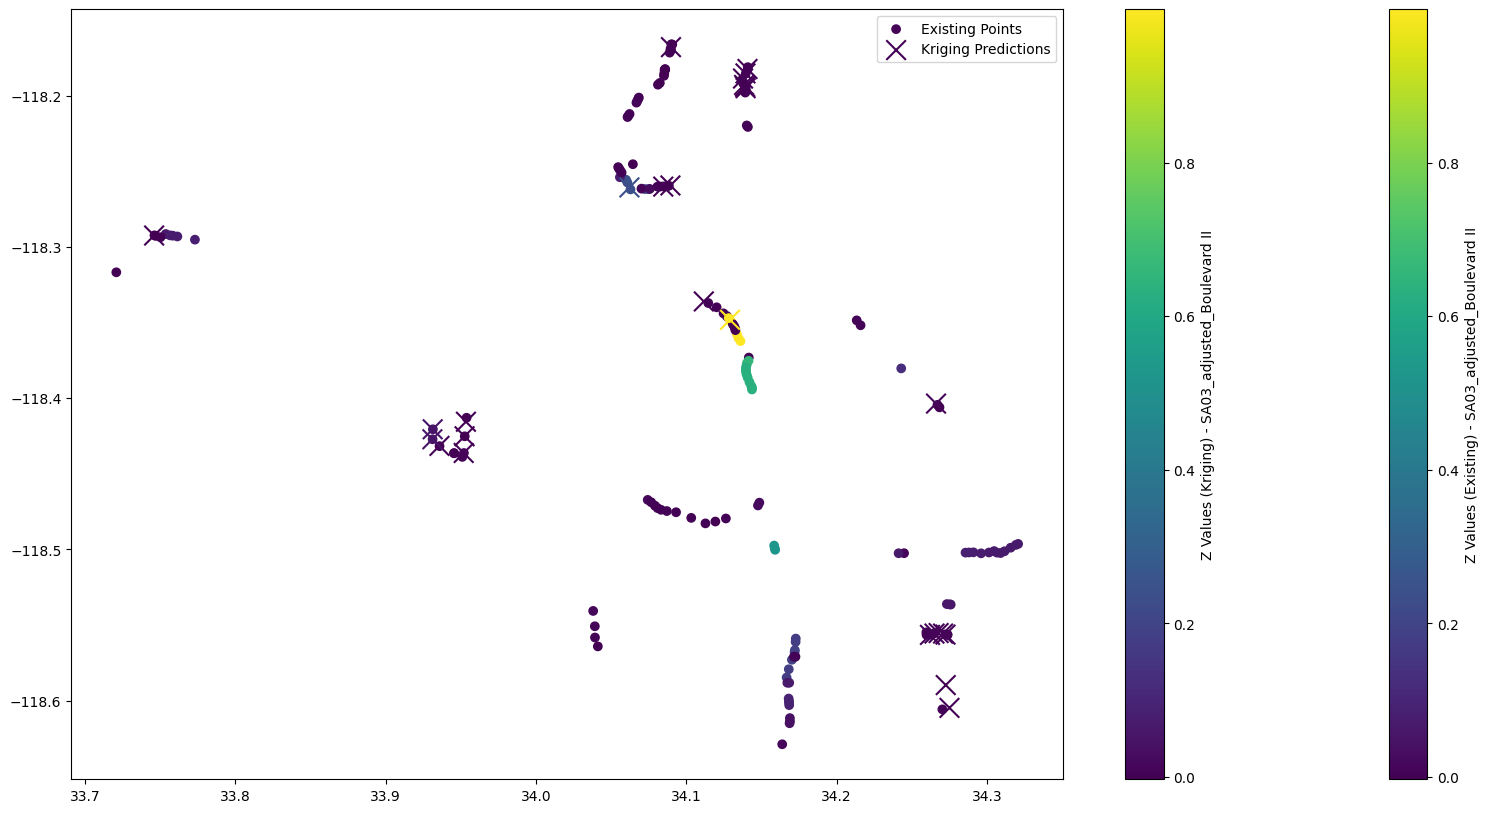

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


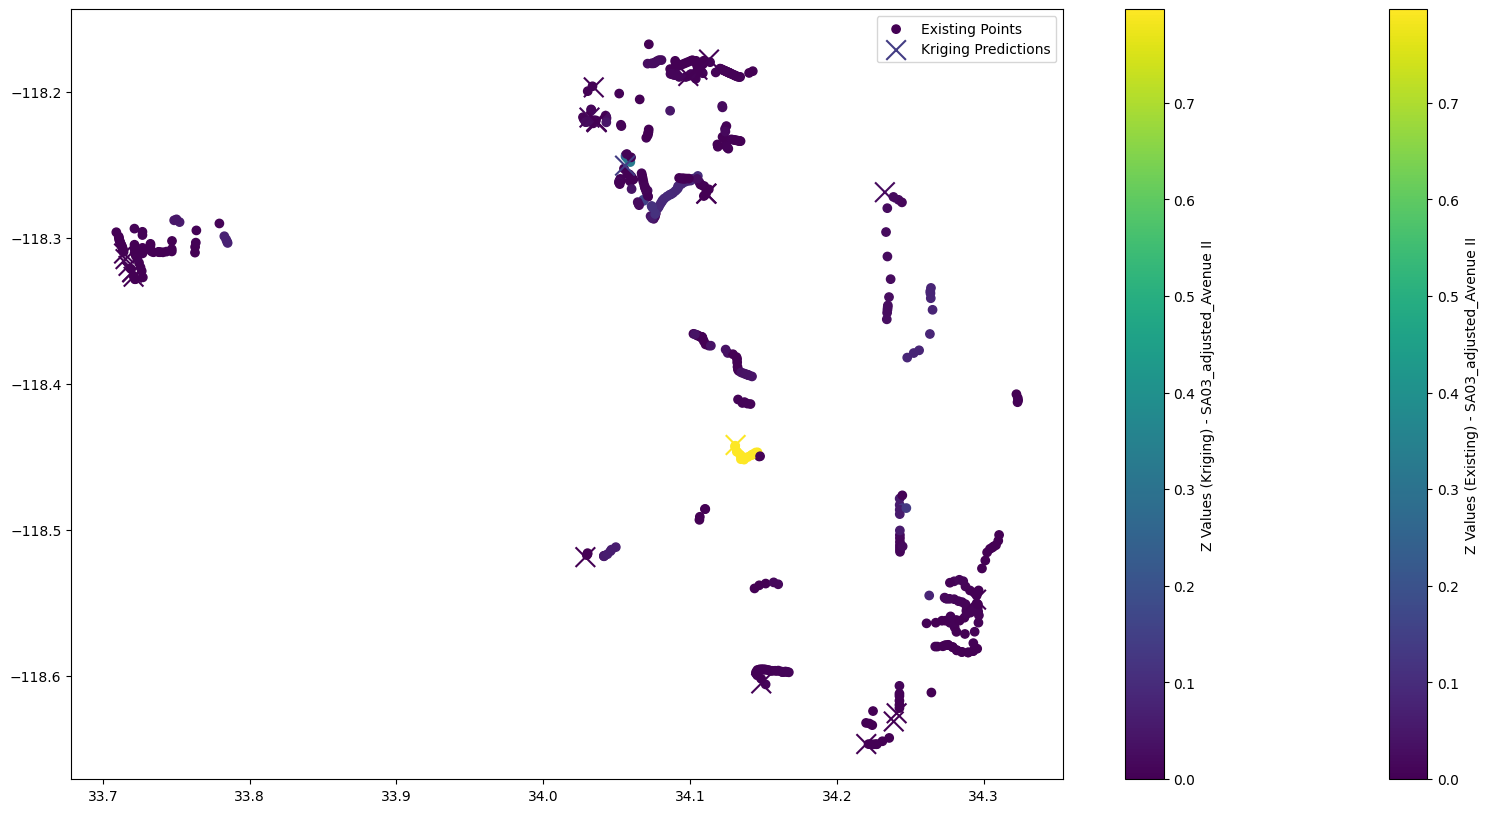

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


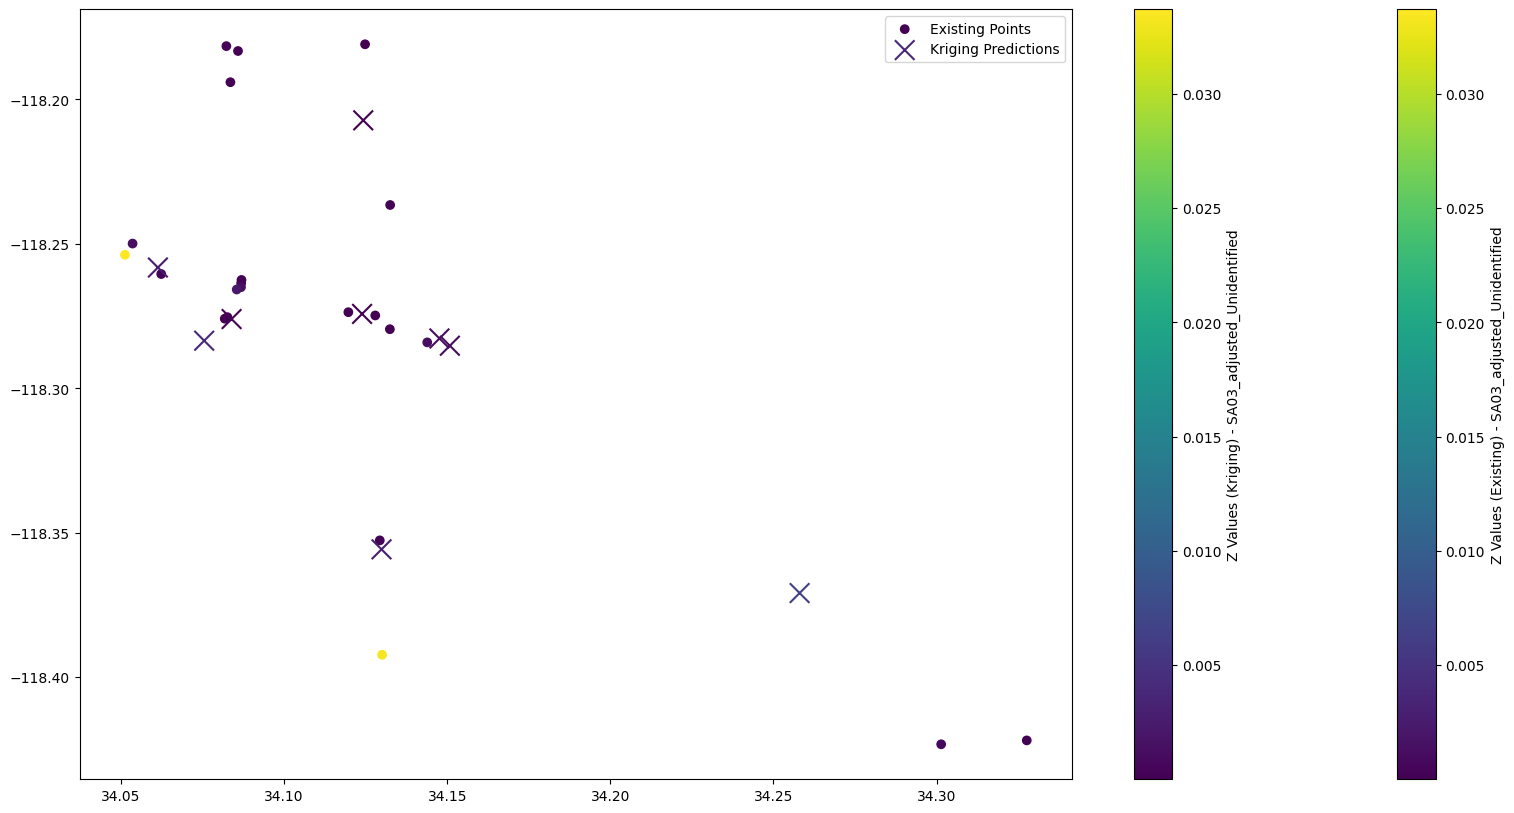

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


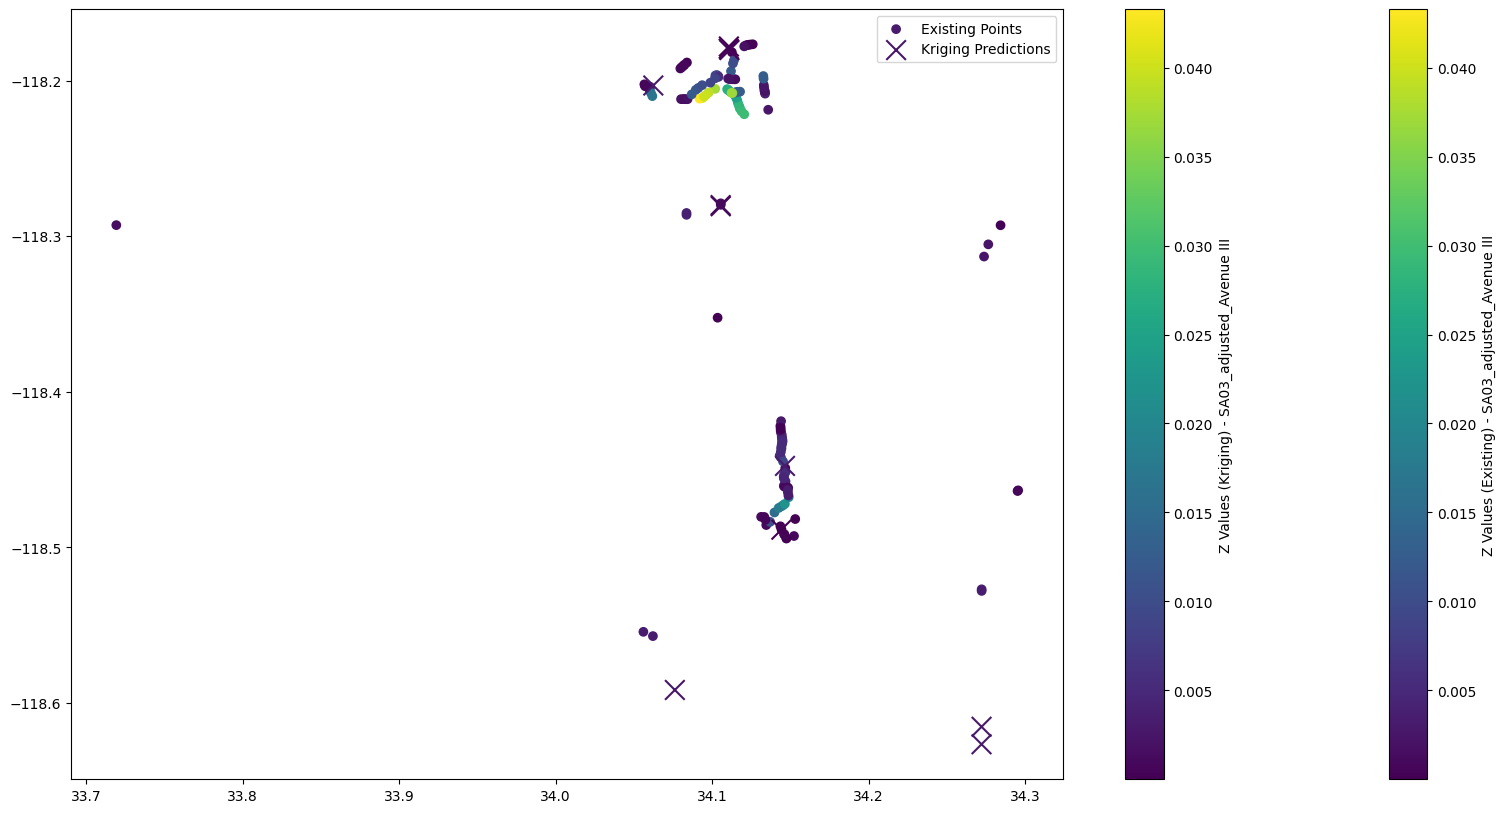

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


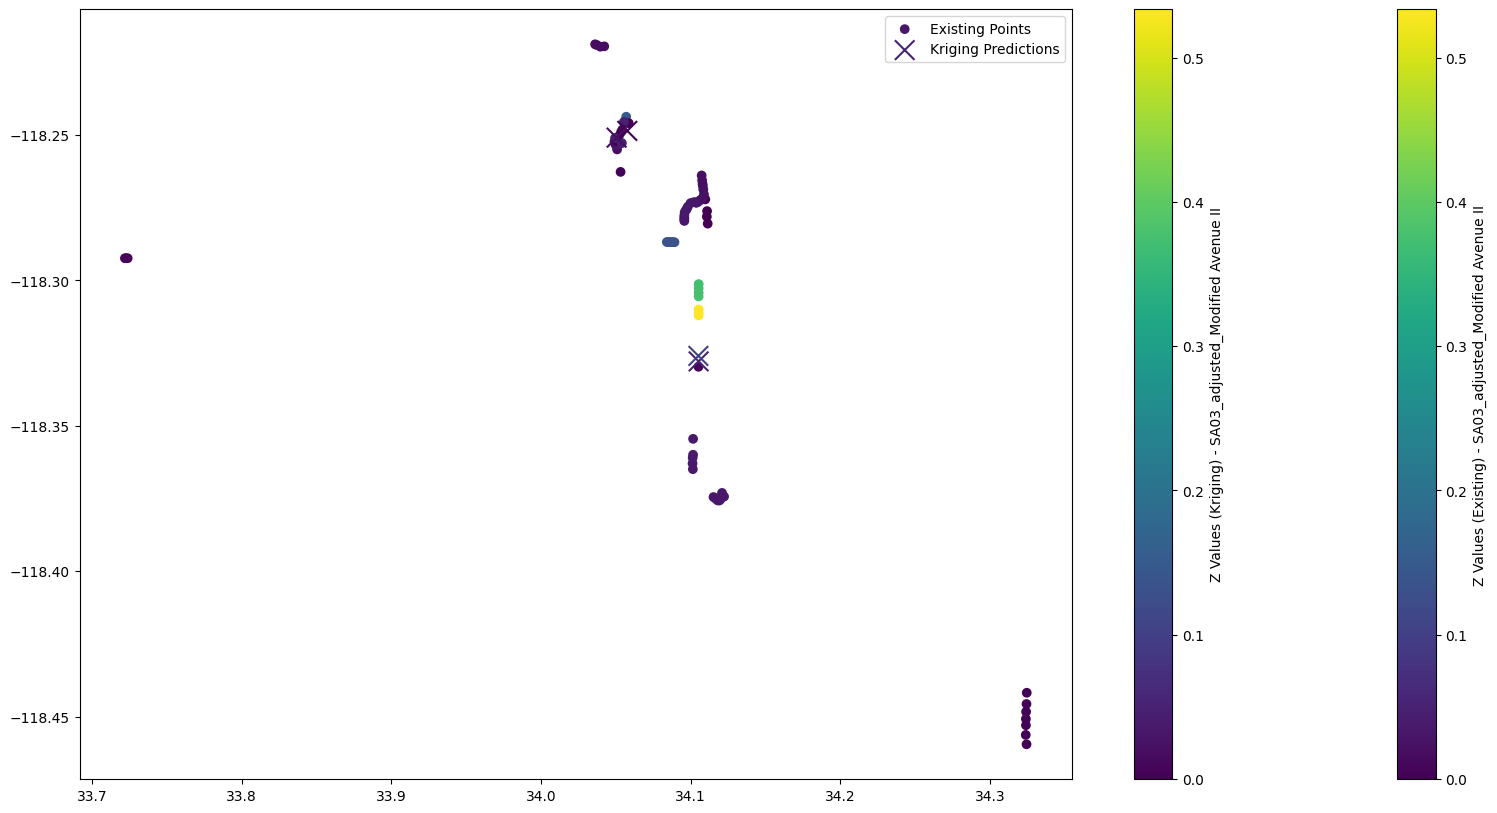

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


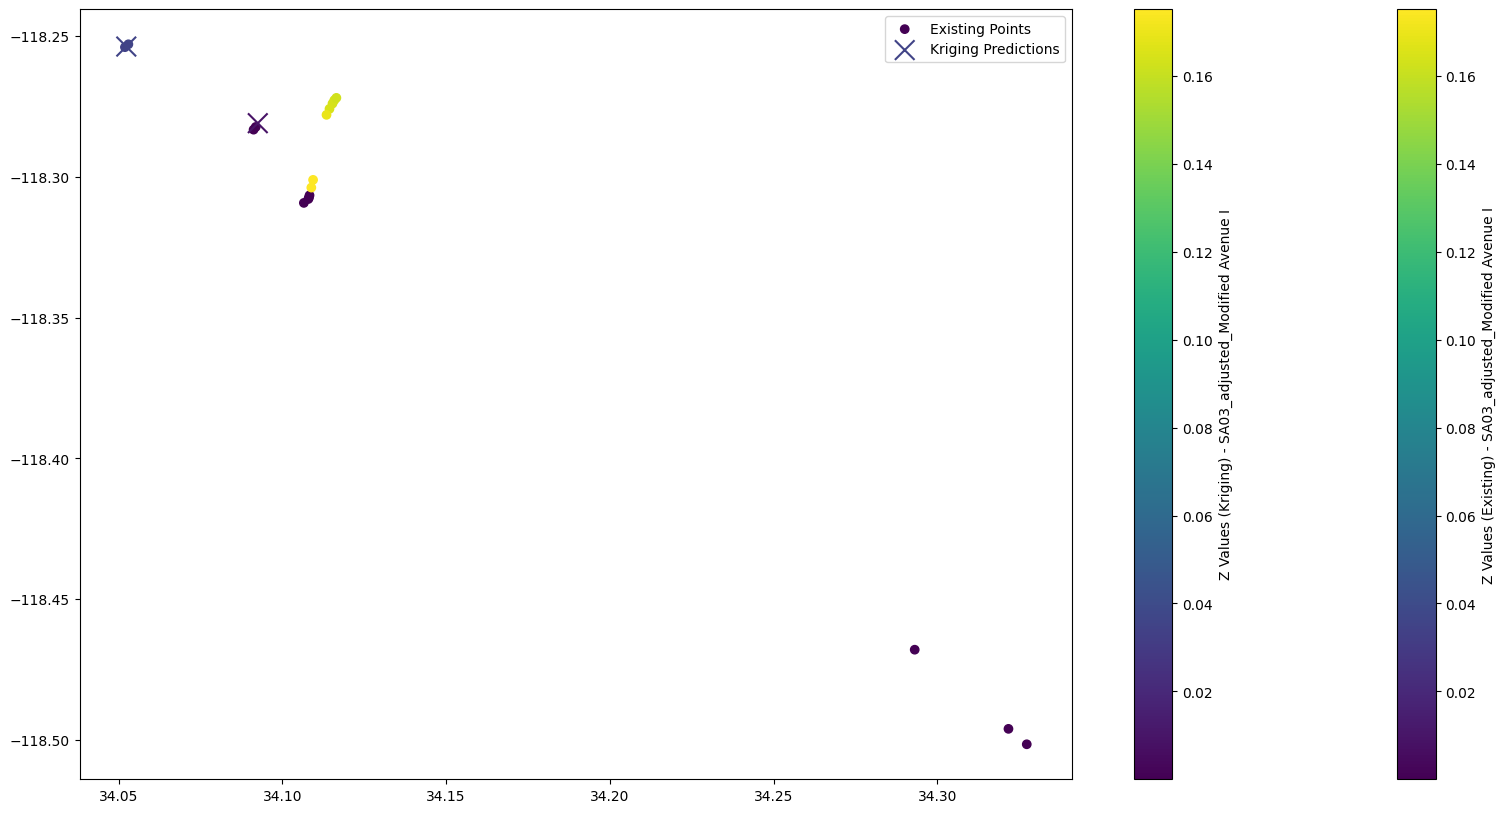

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


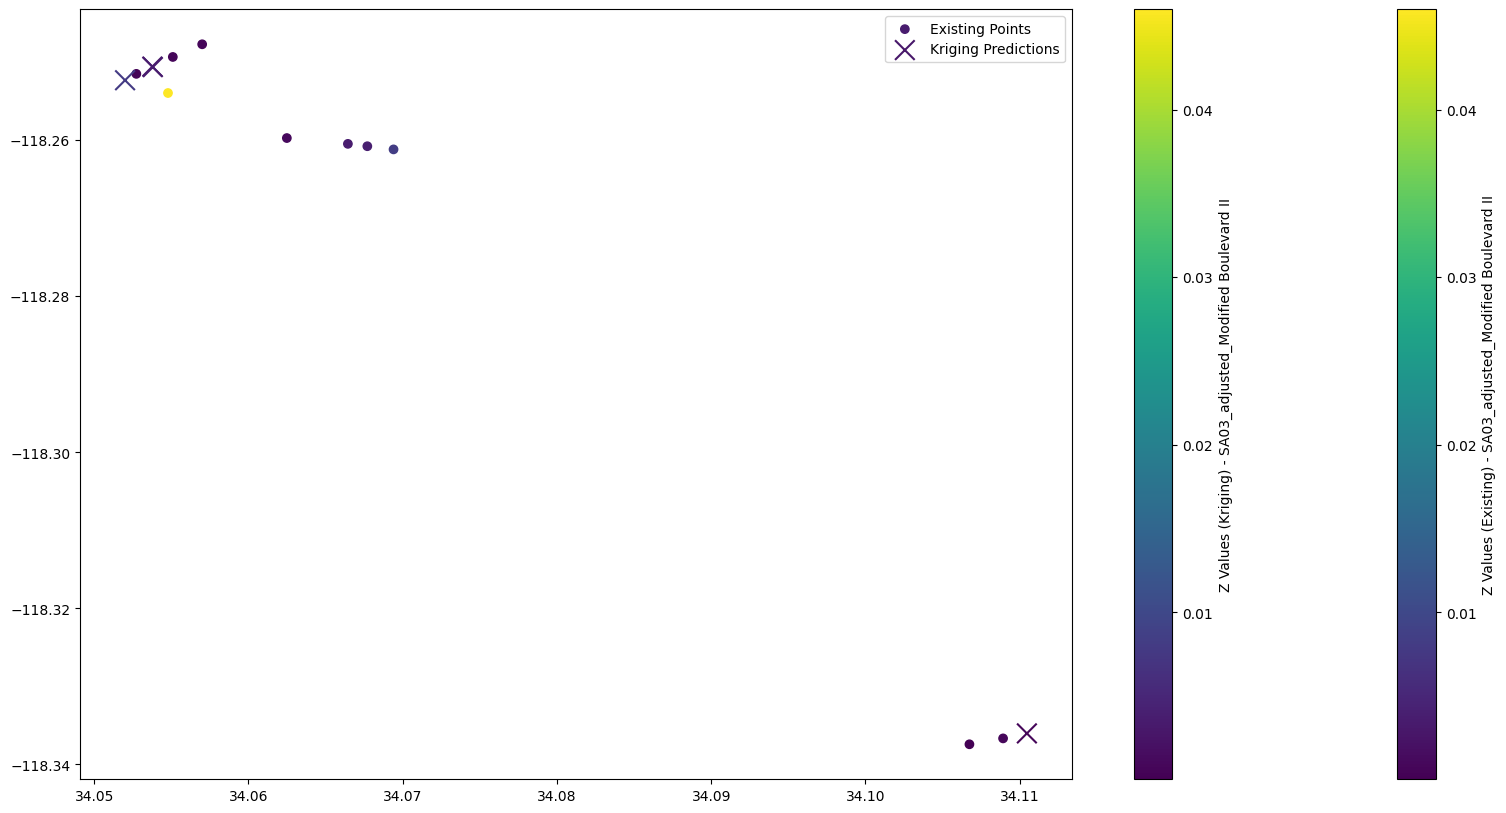

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  SE01_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


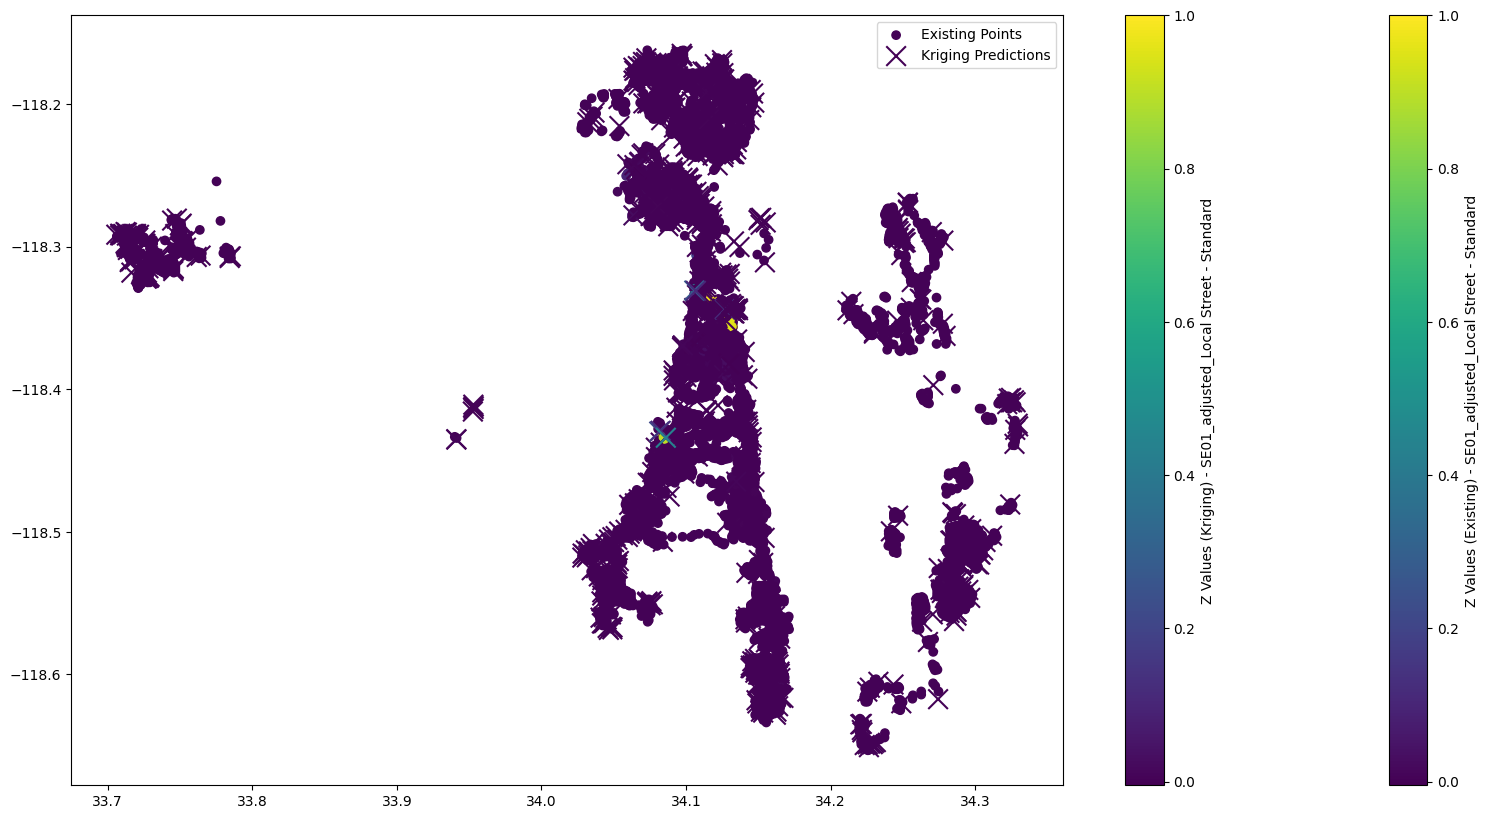

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


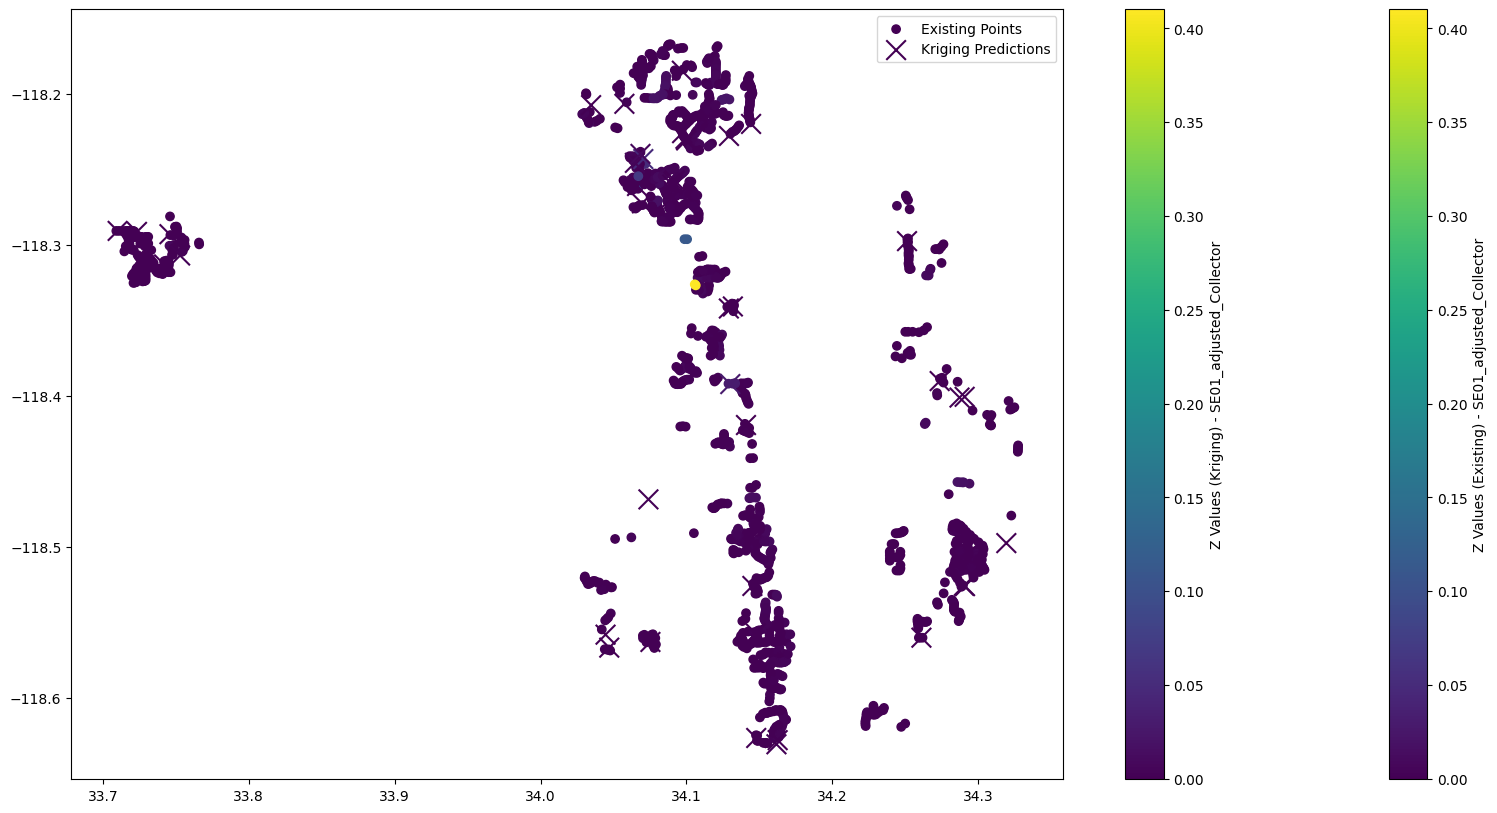

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


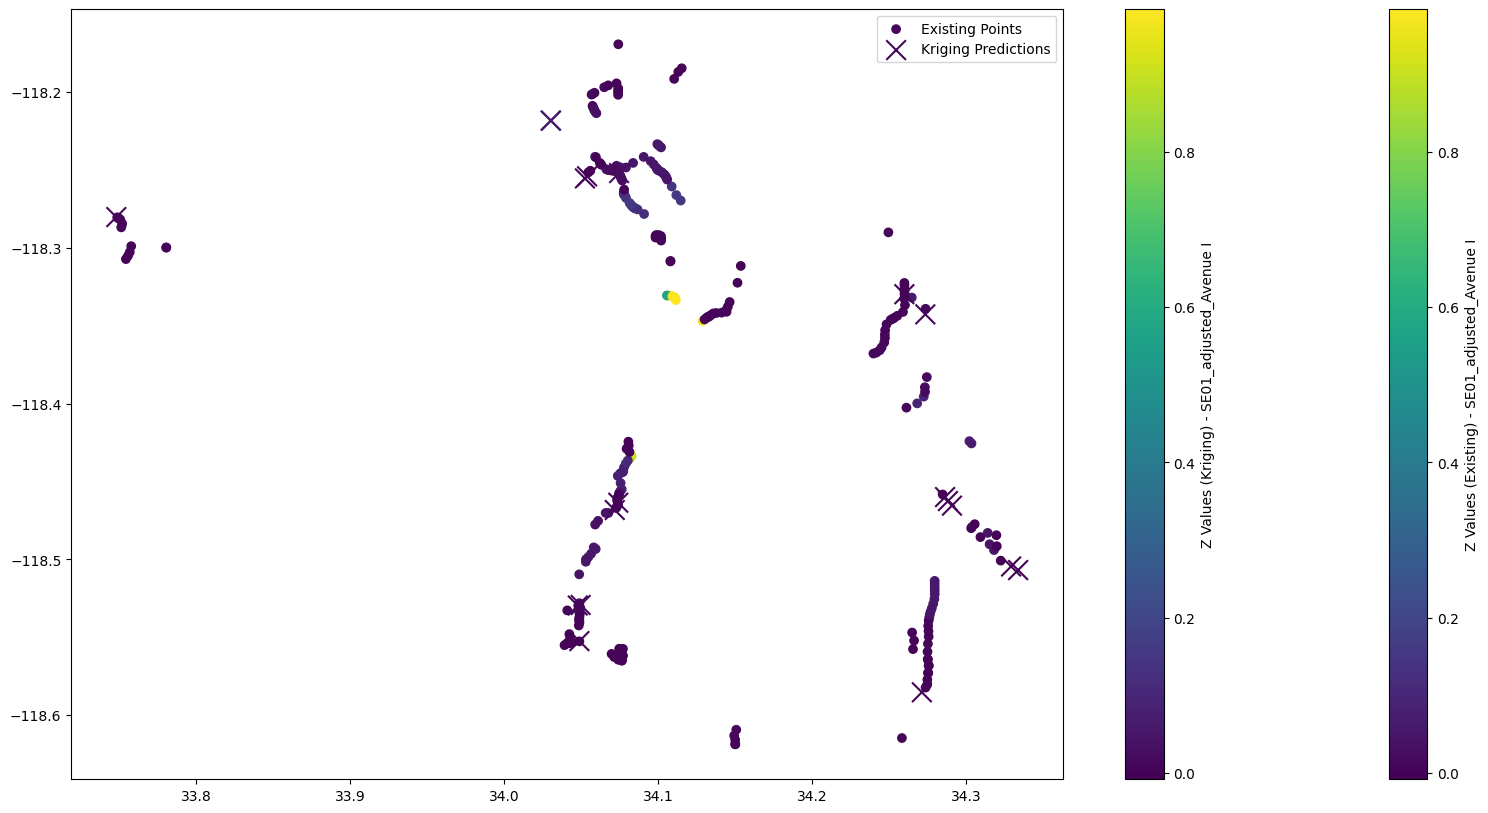

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


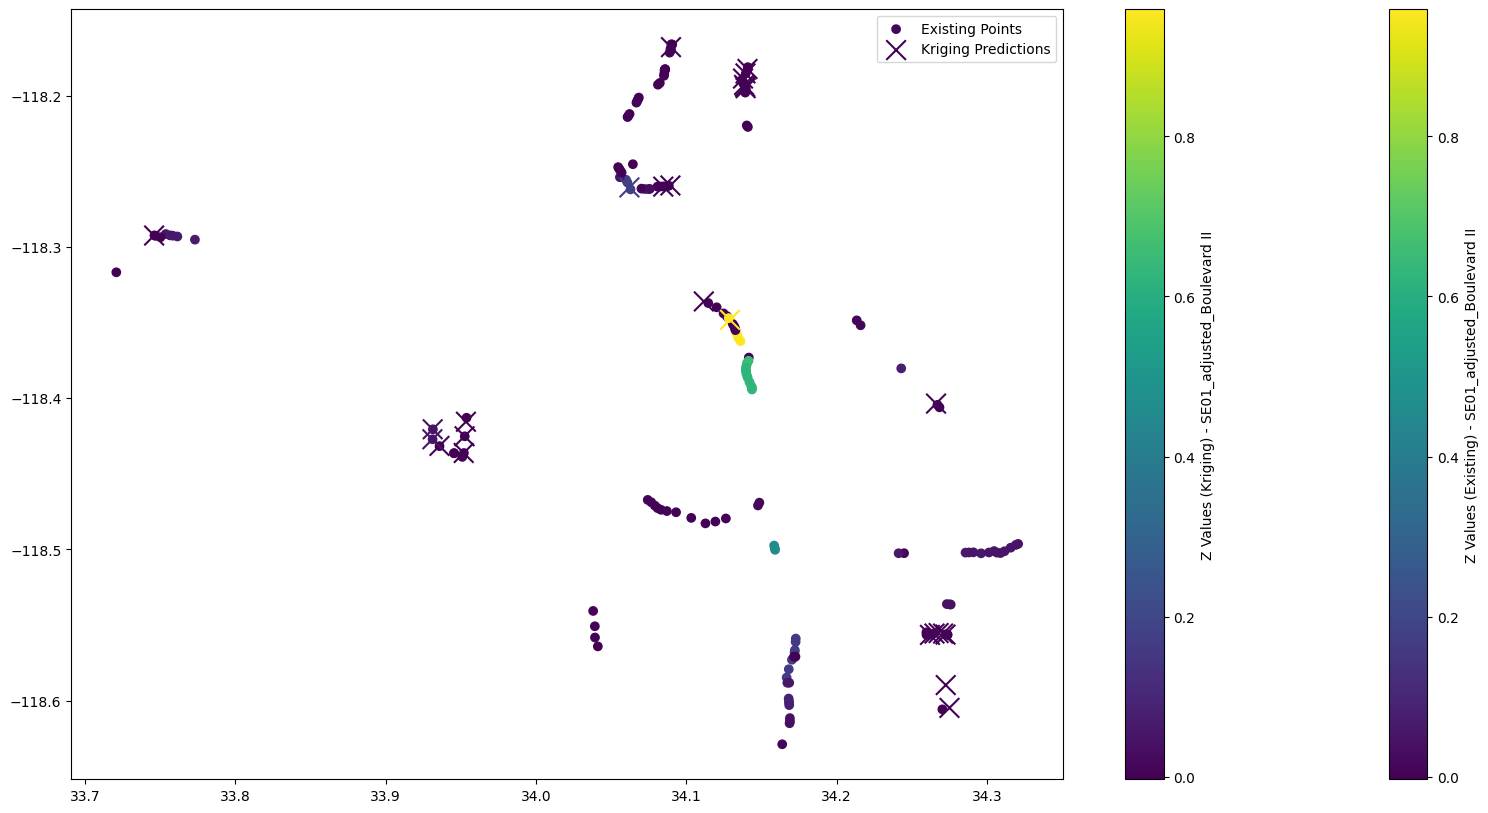

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


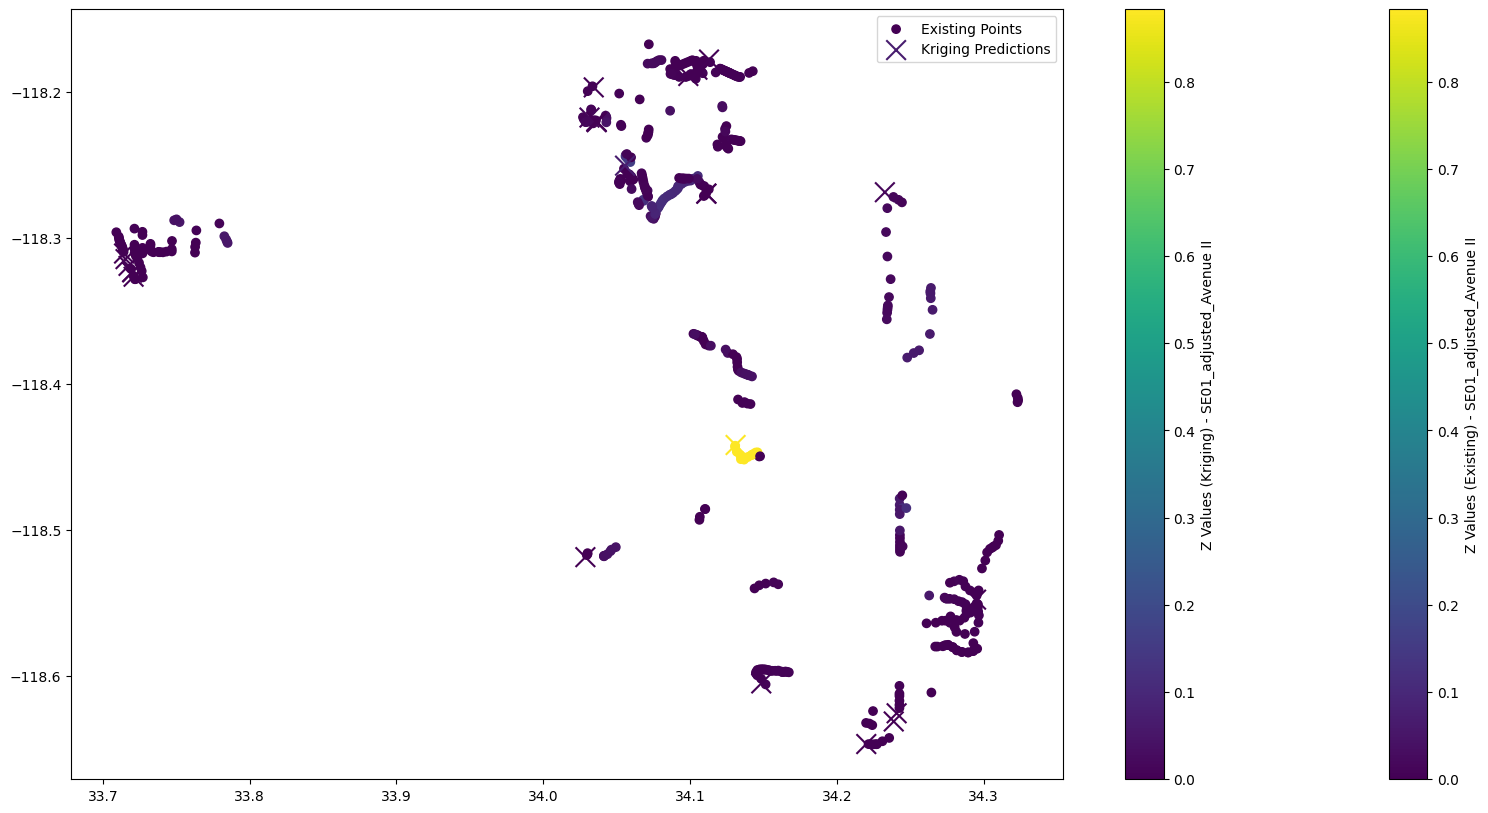

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


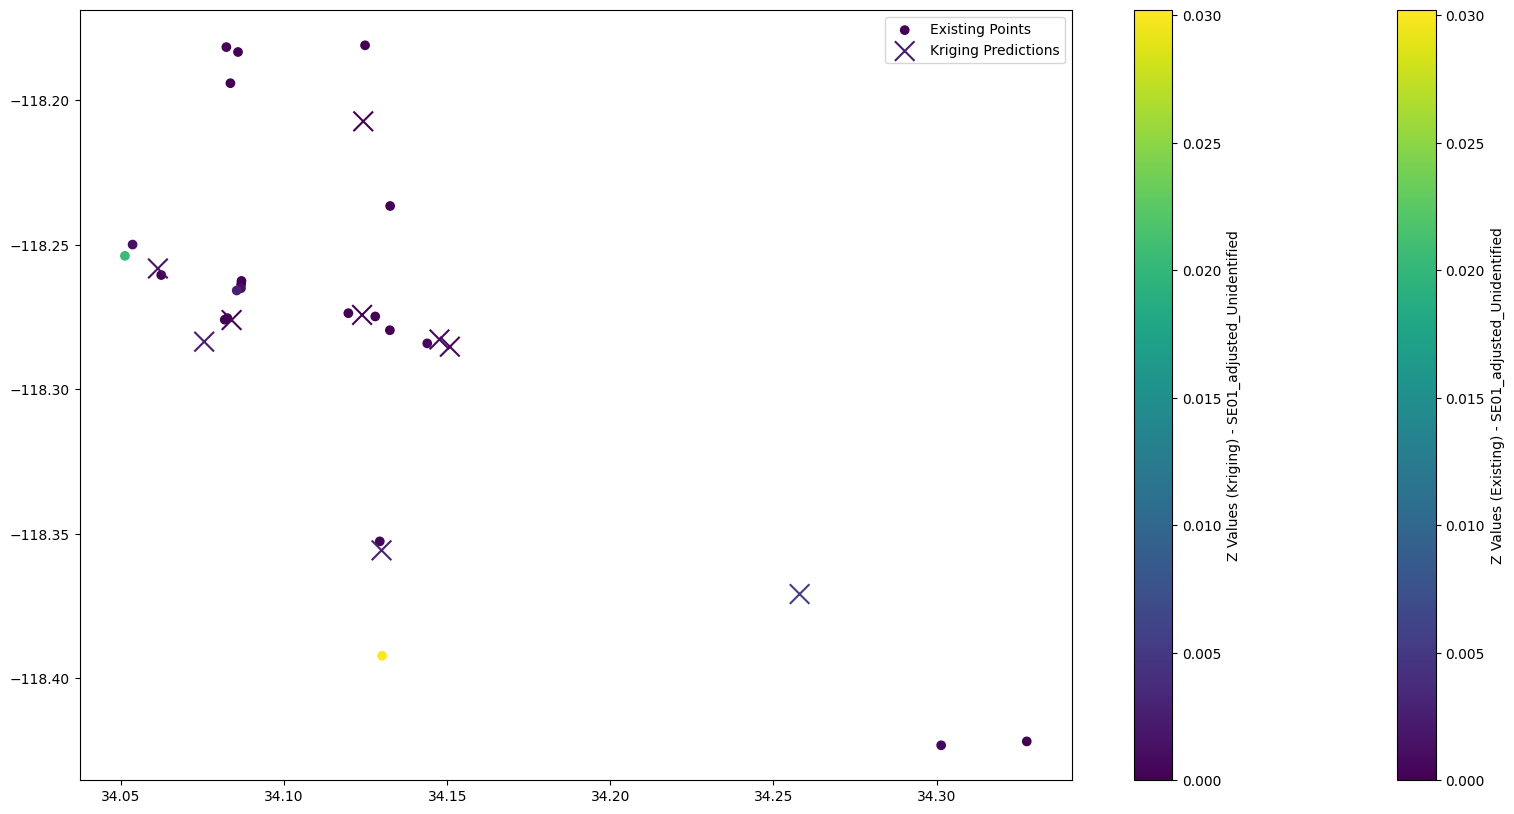

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


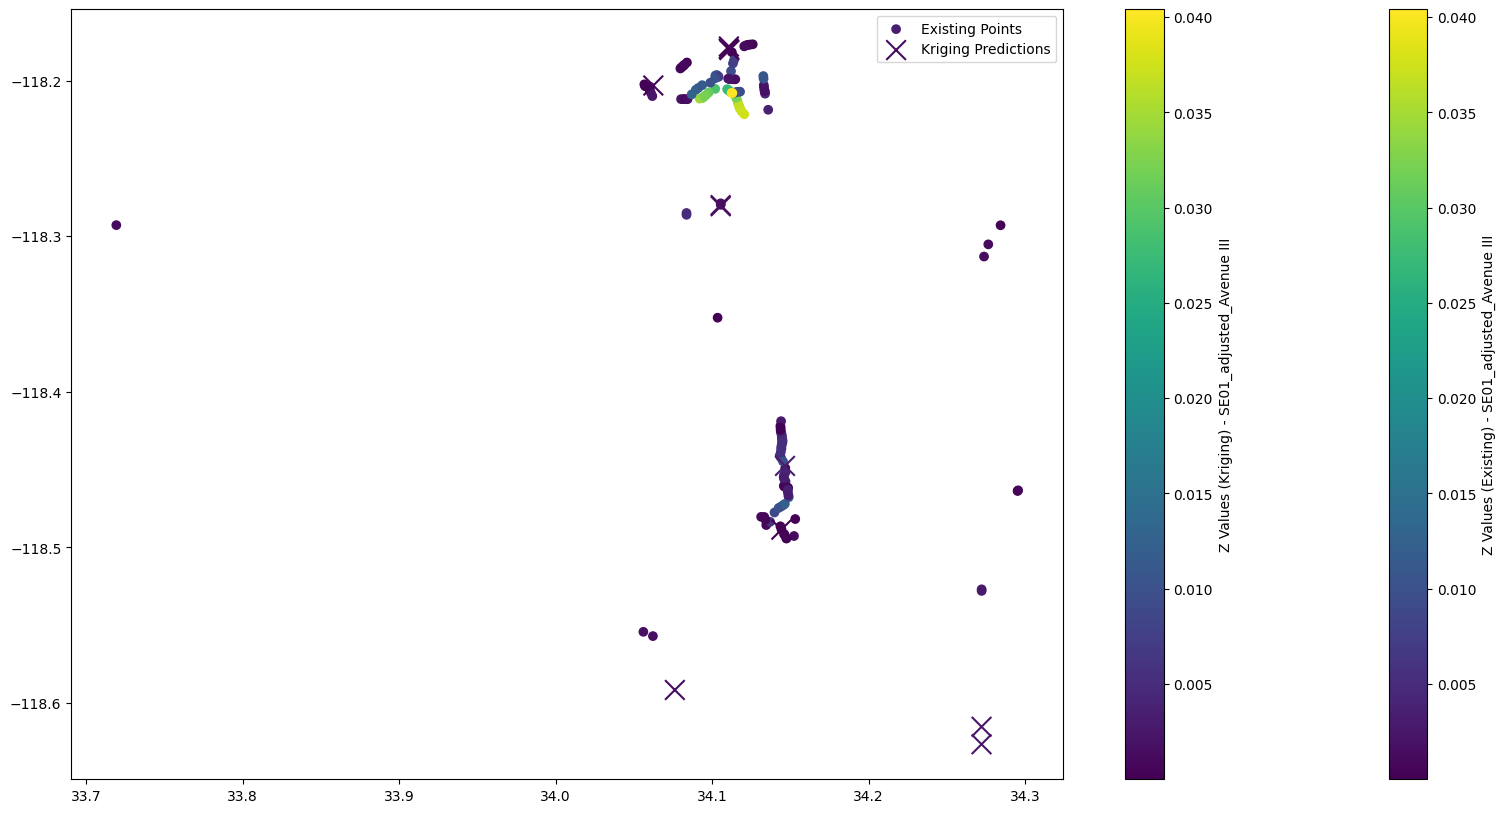

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


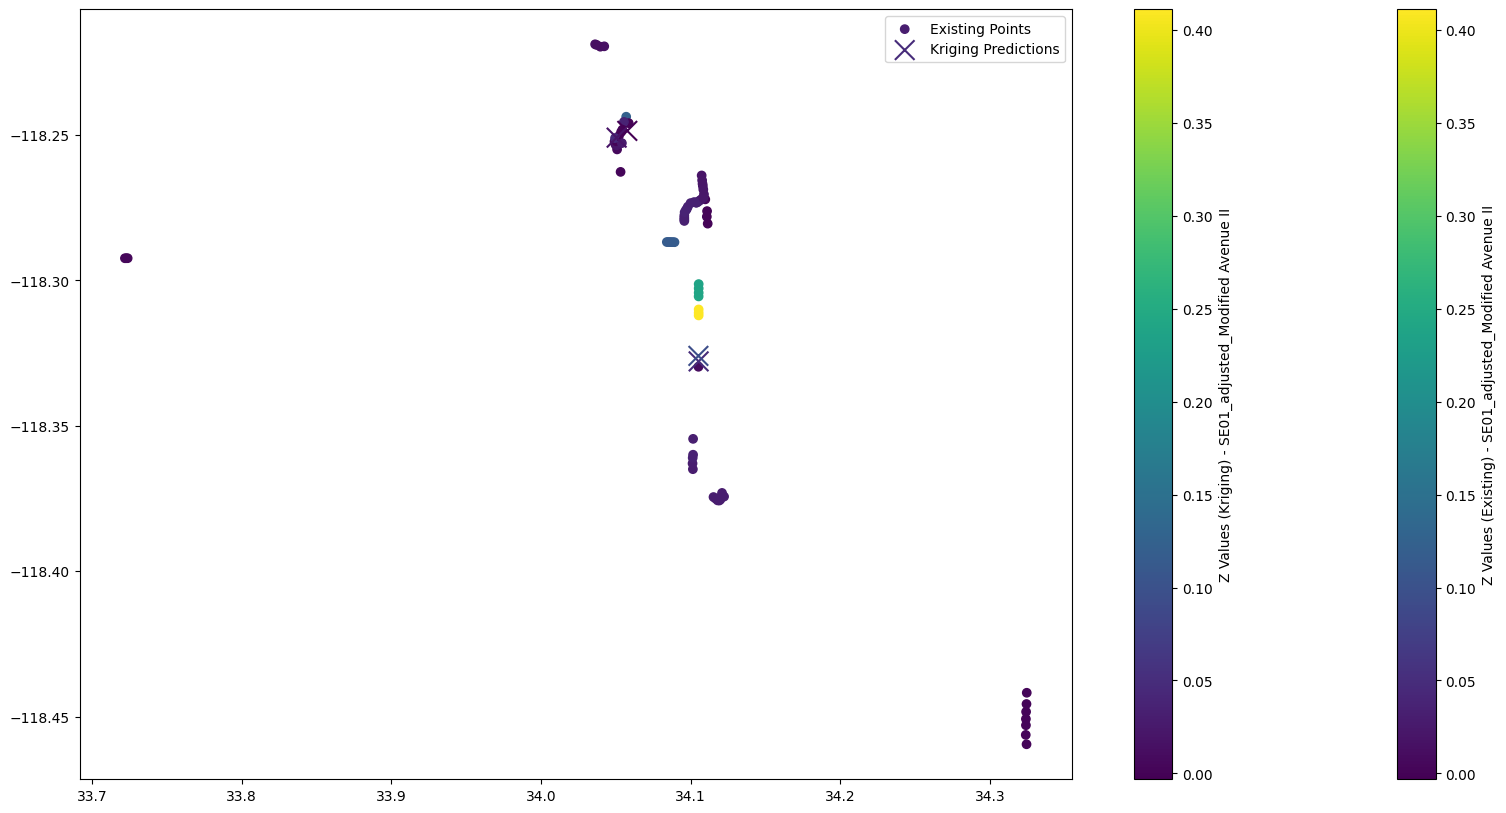

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


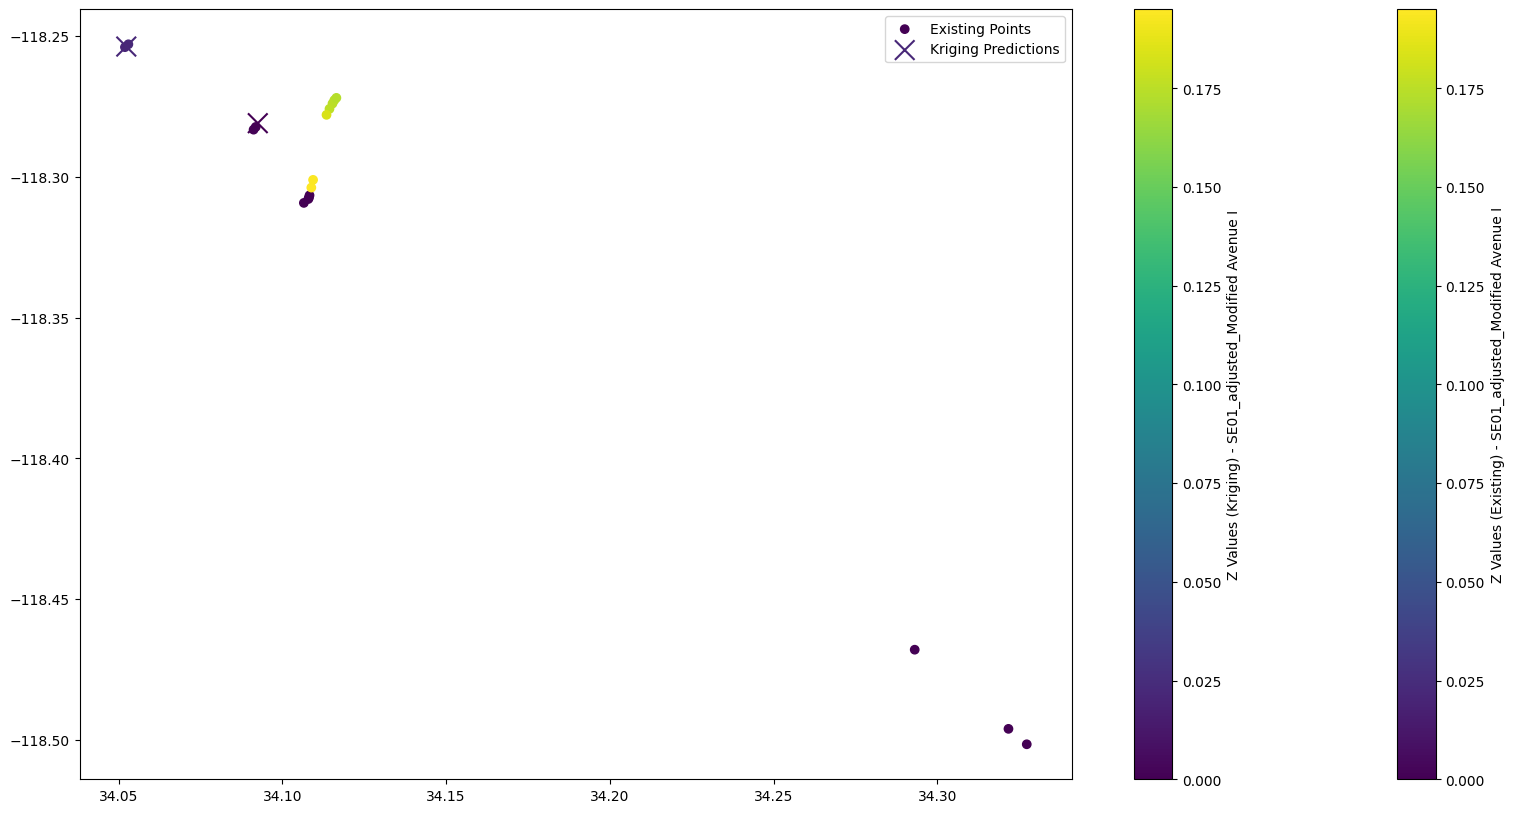

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


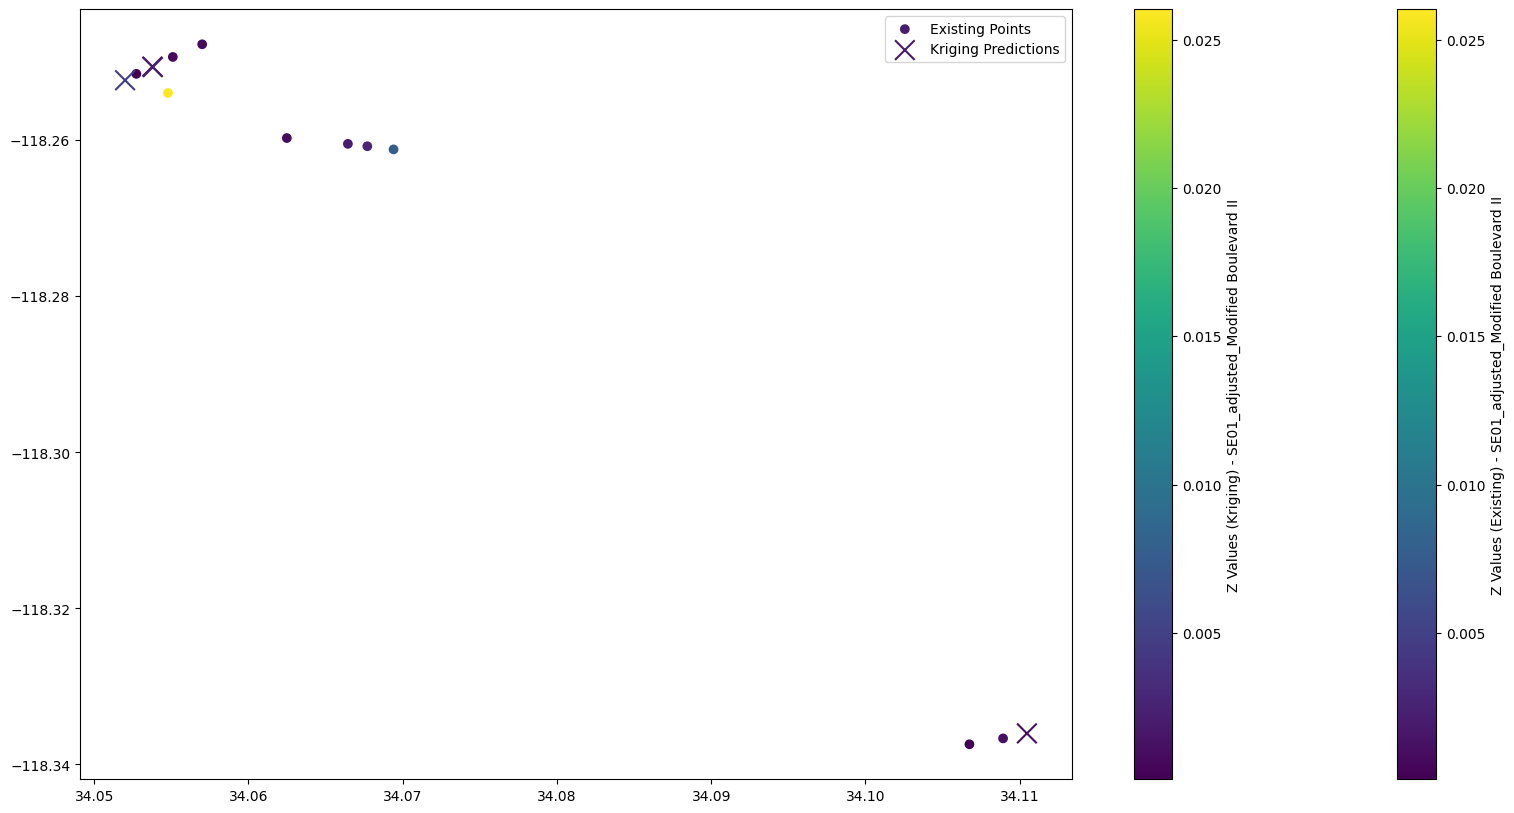

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  SE02_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


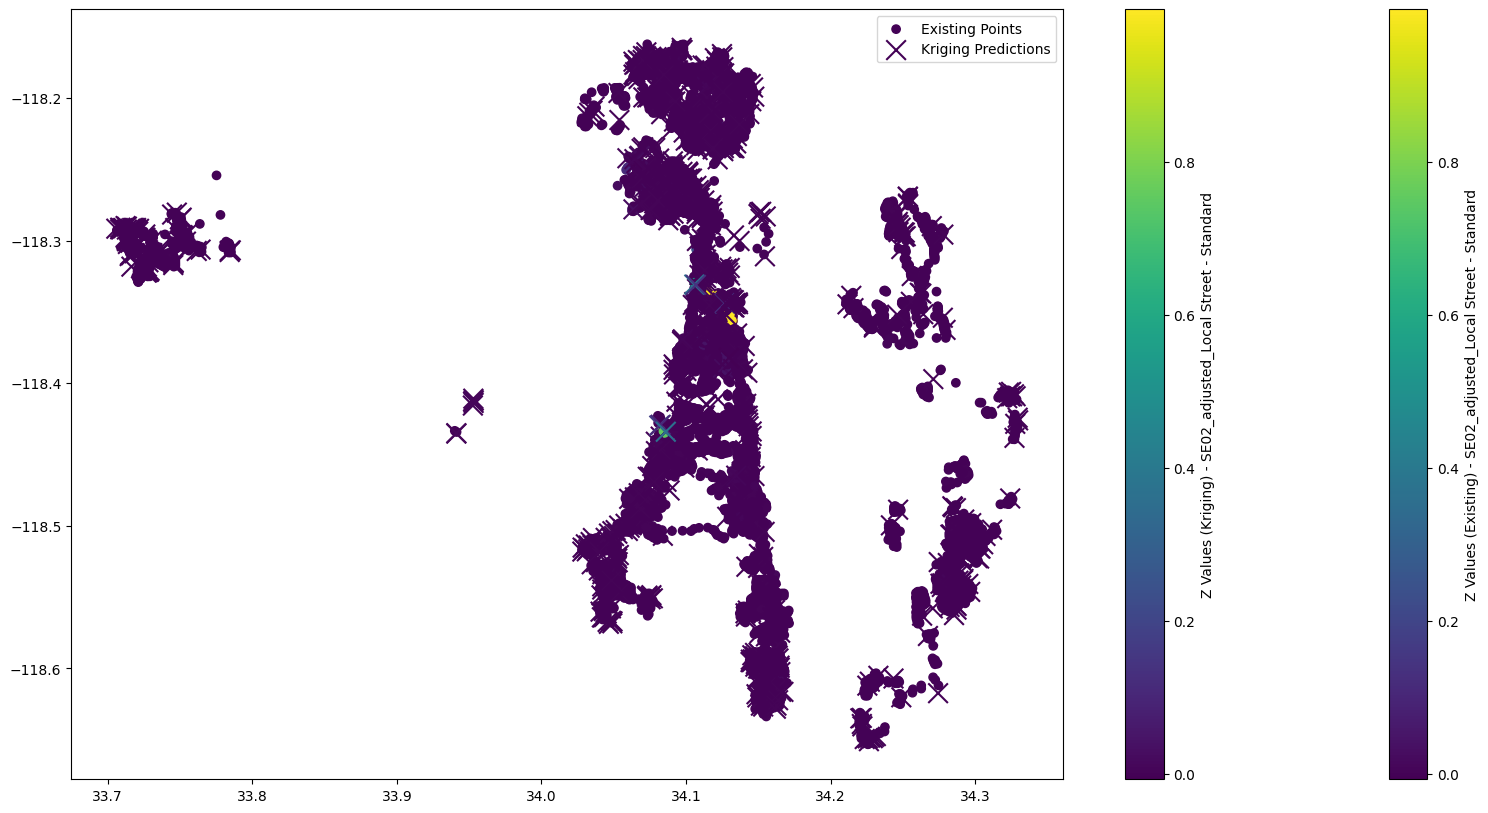

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


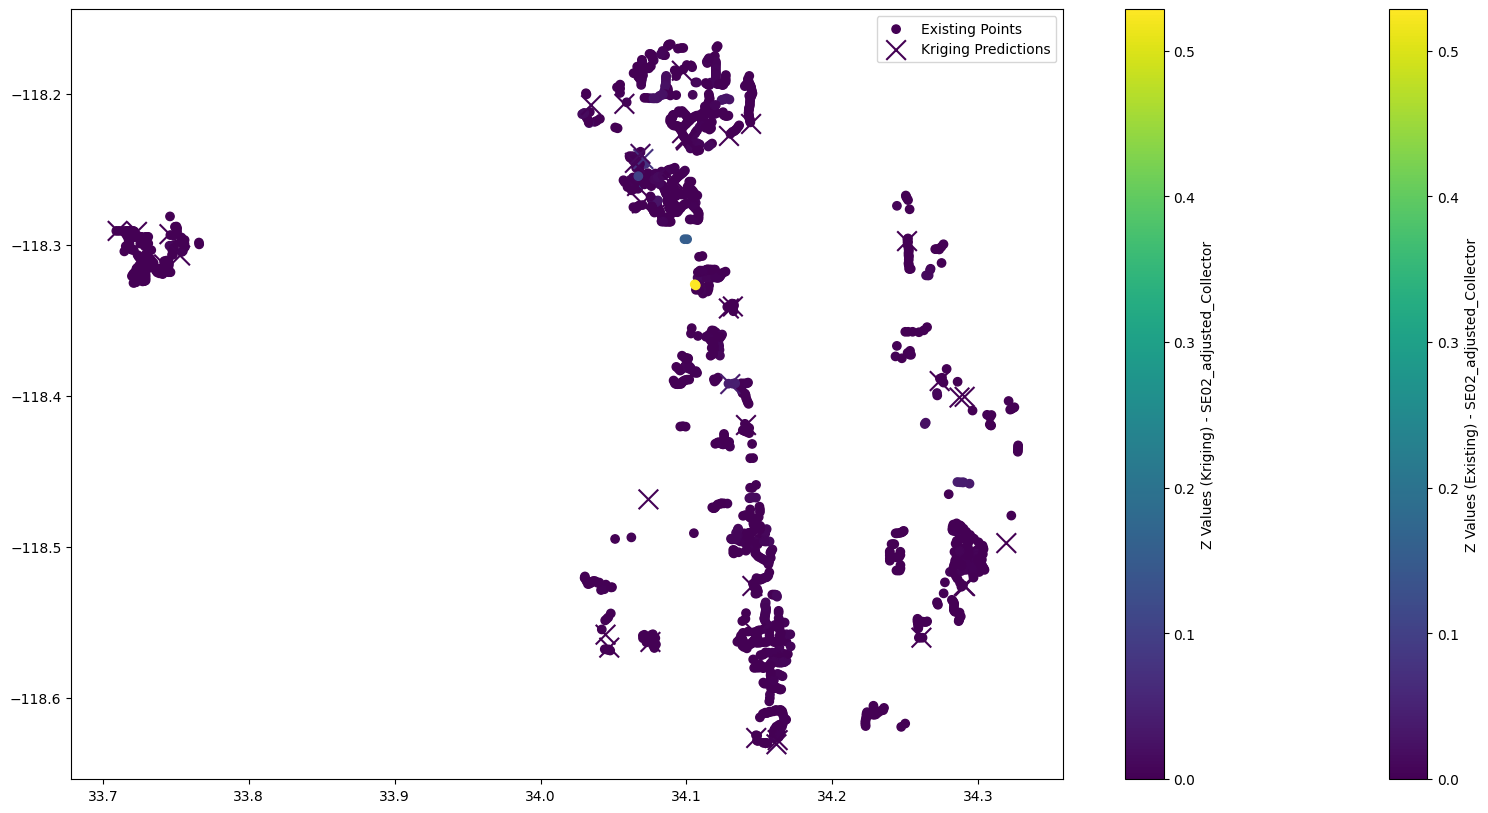

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


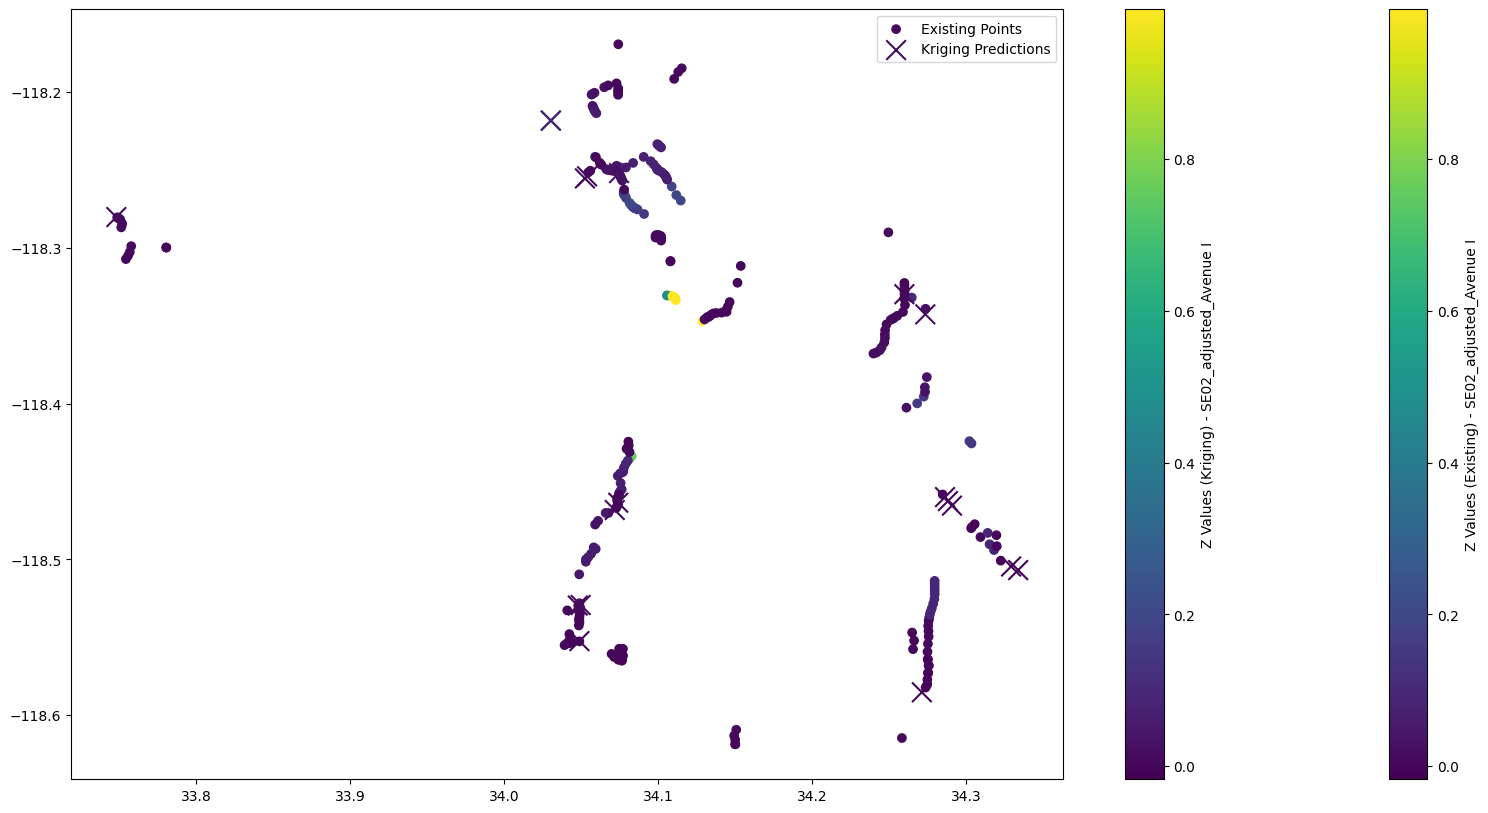

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


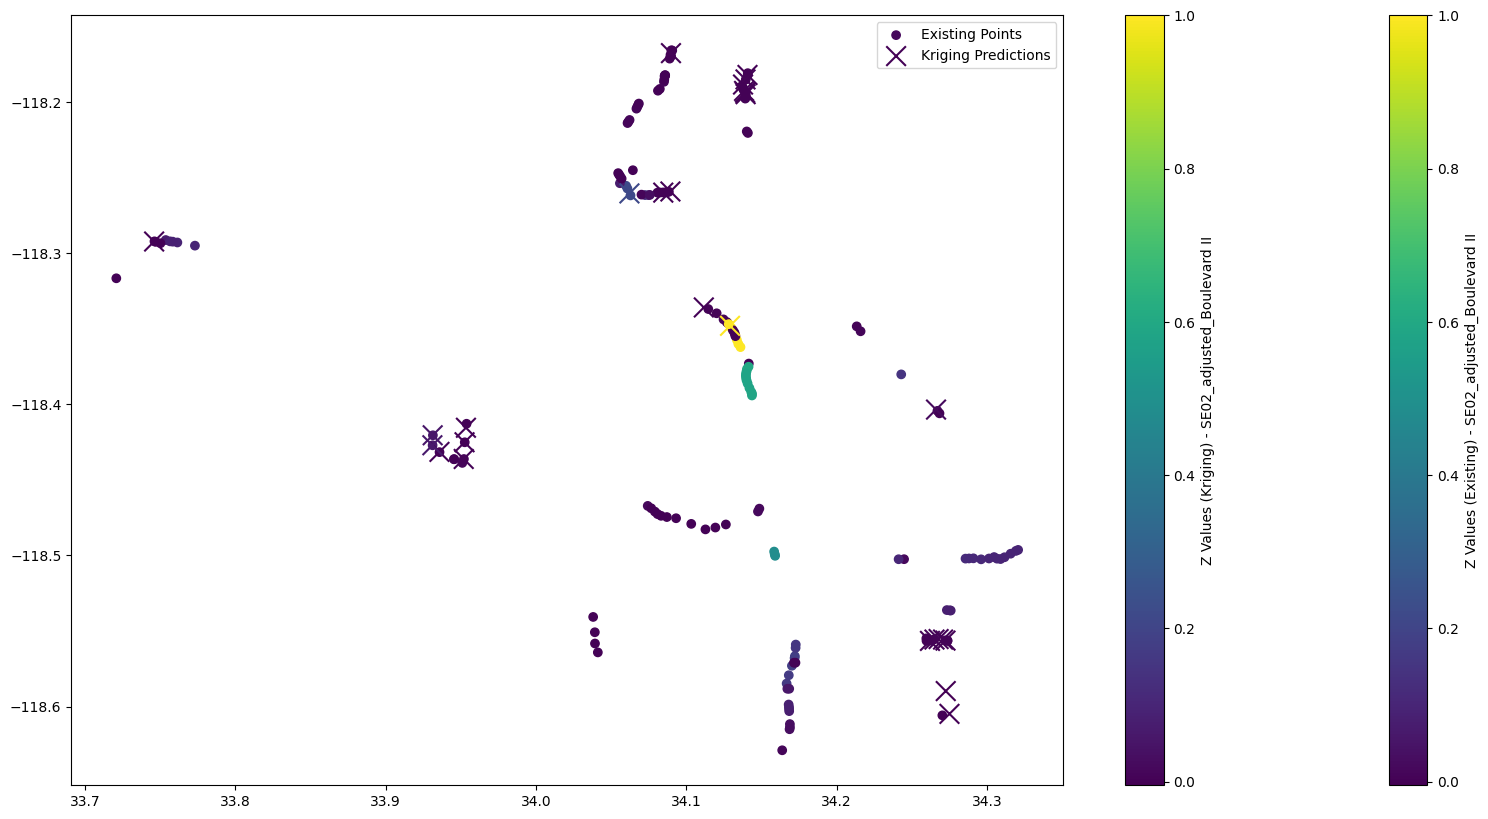

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


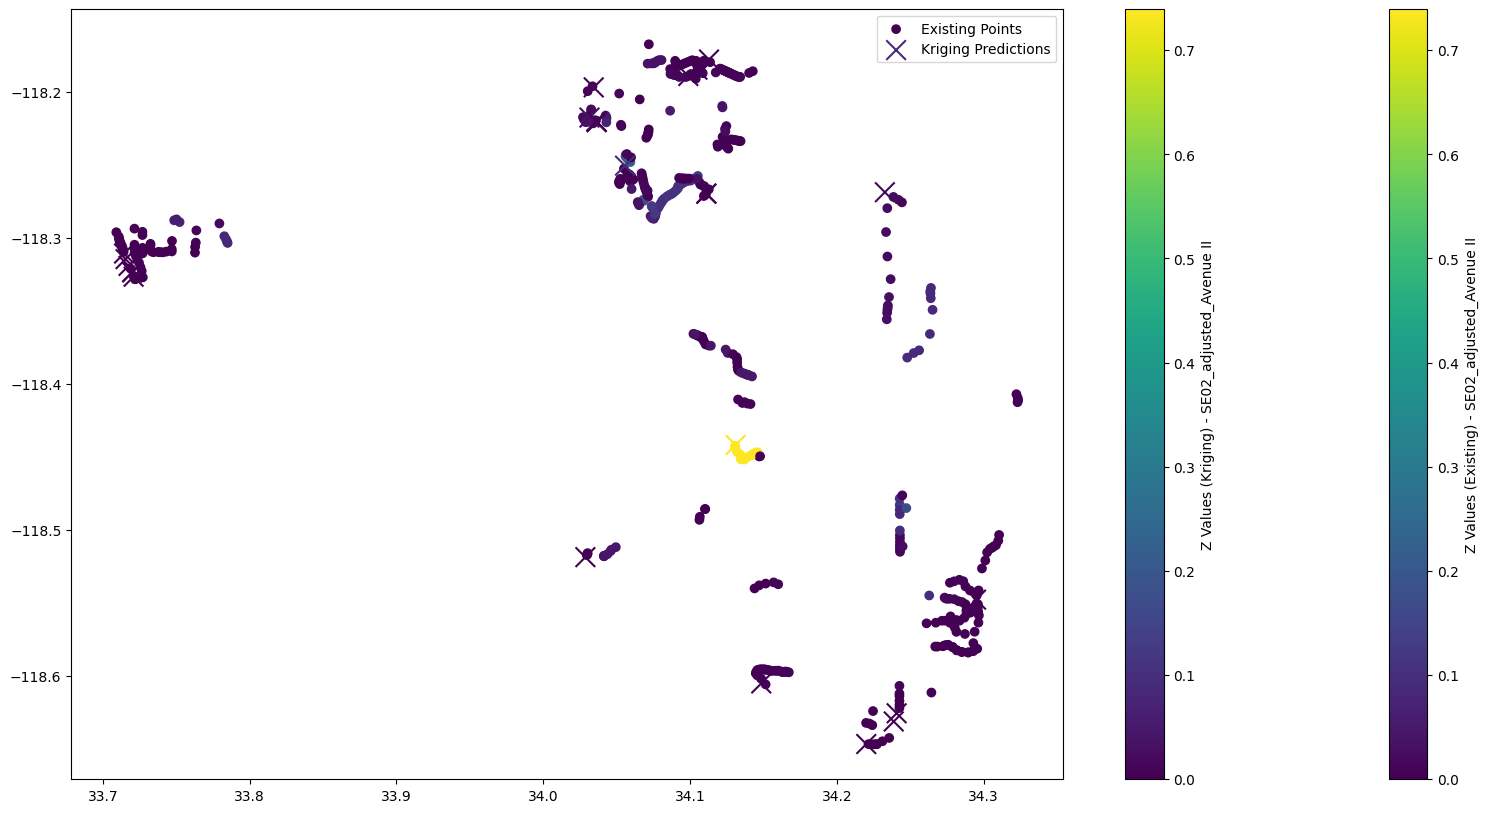

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


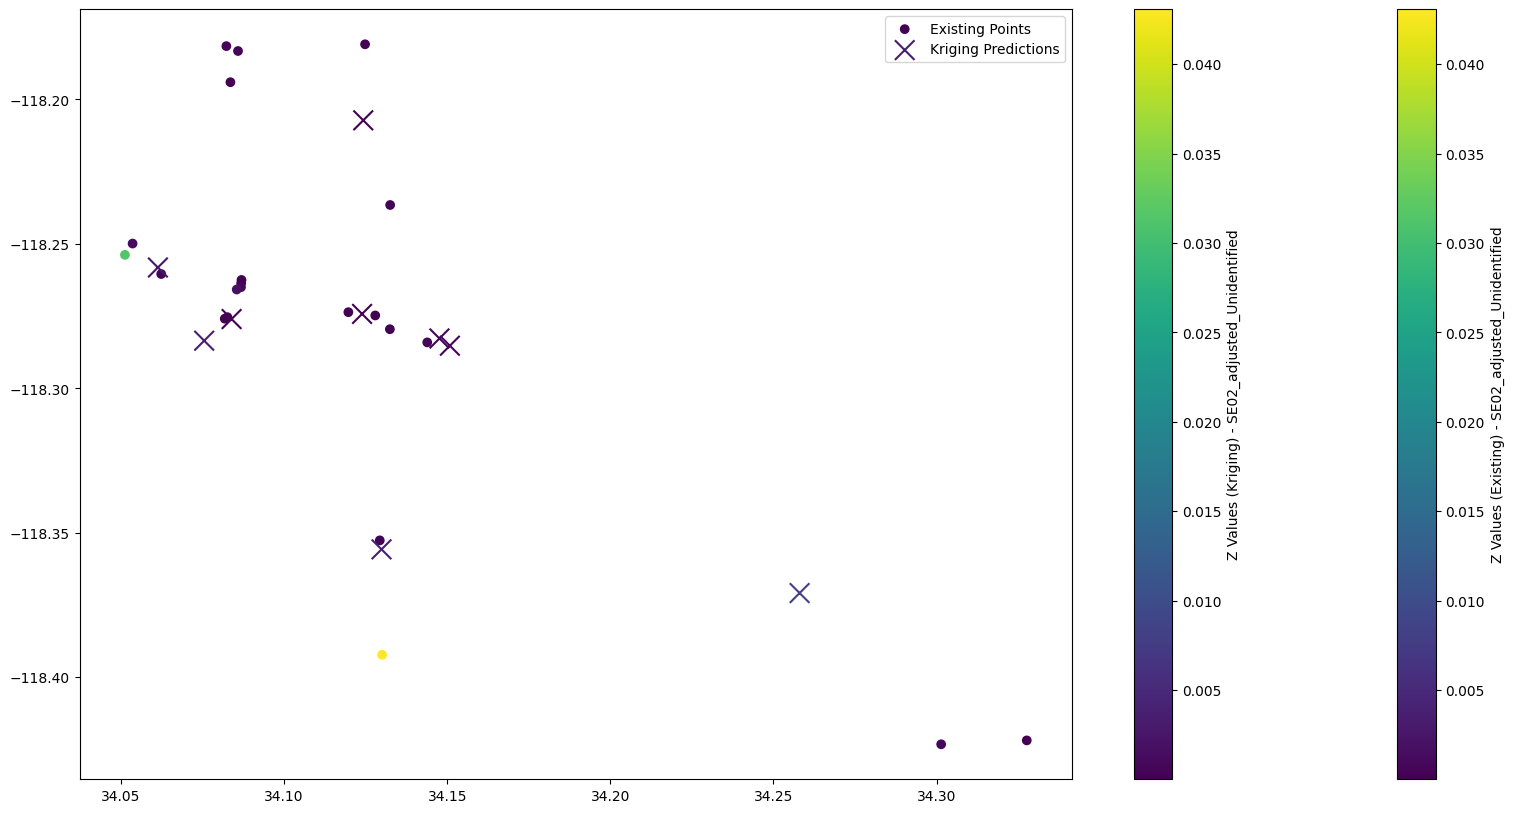

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


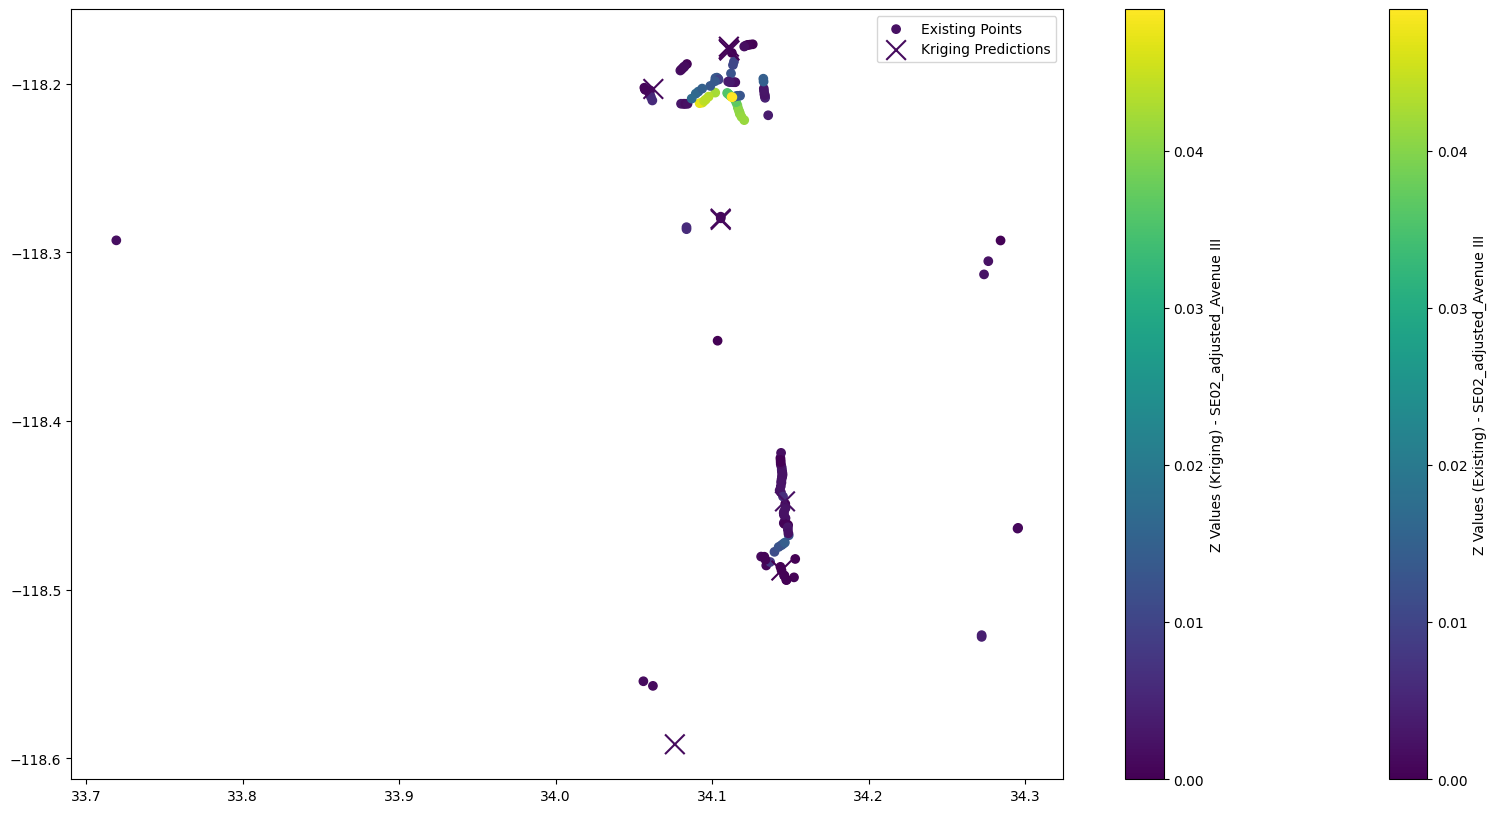

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


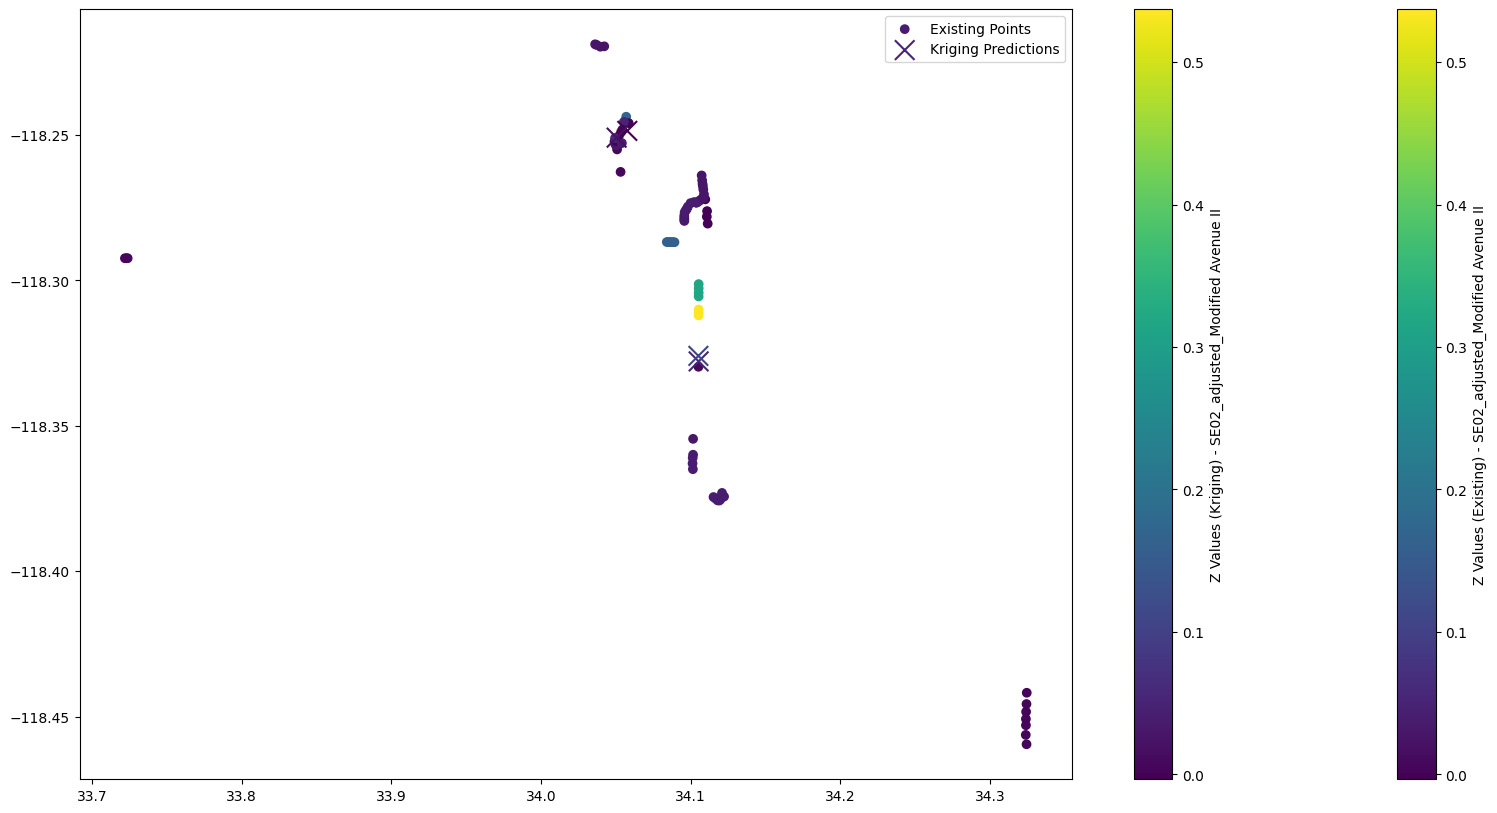

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


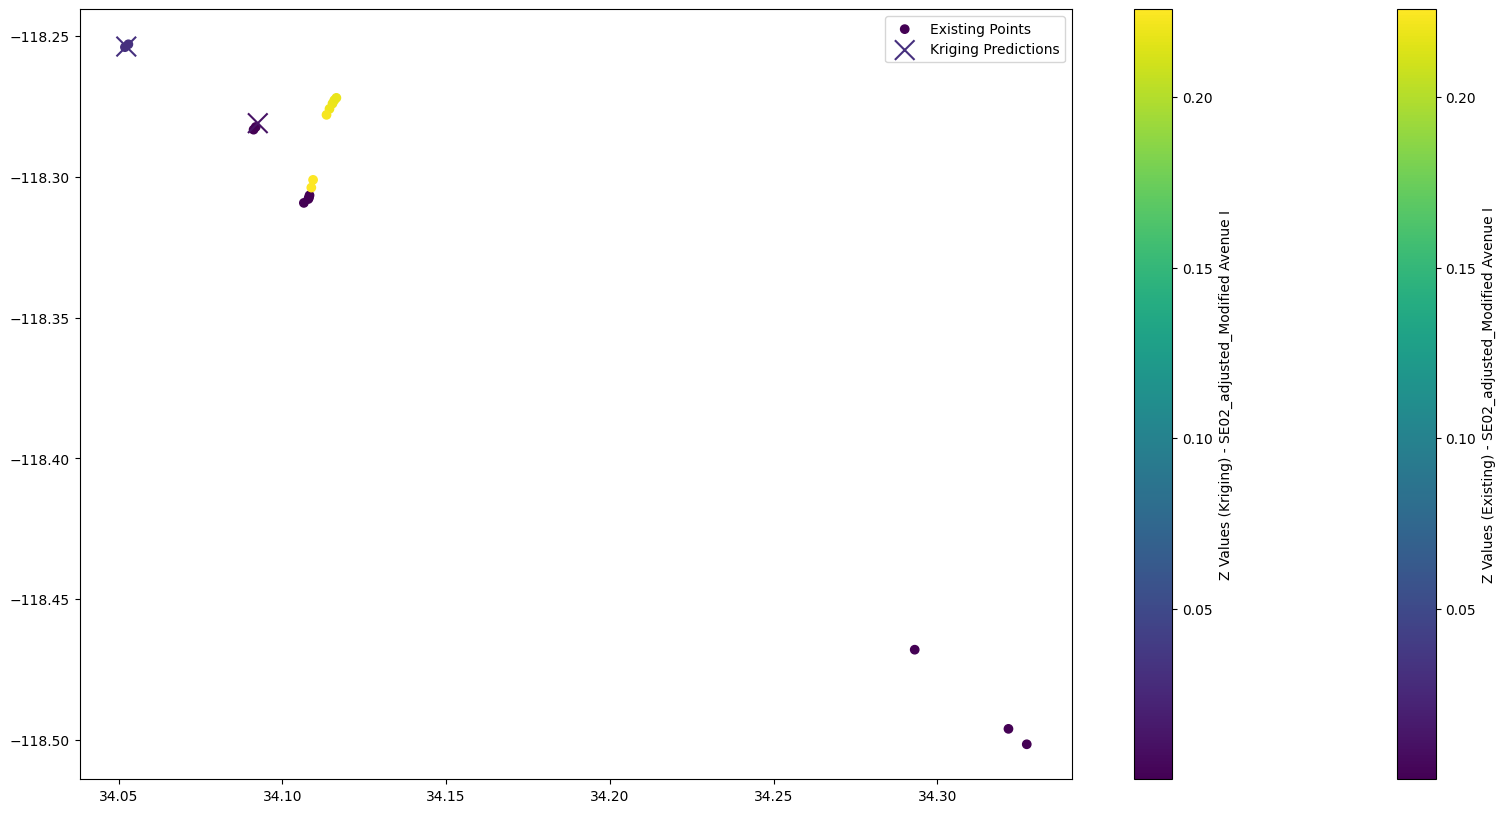

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


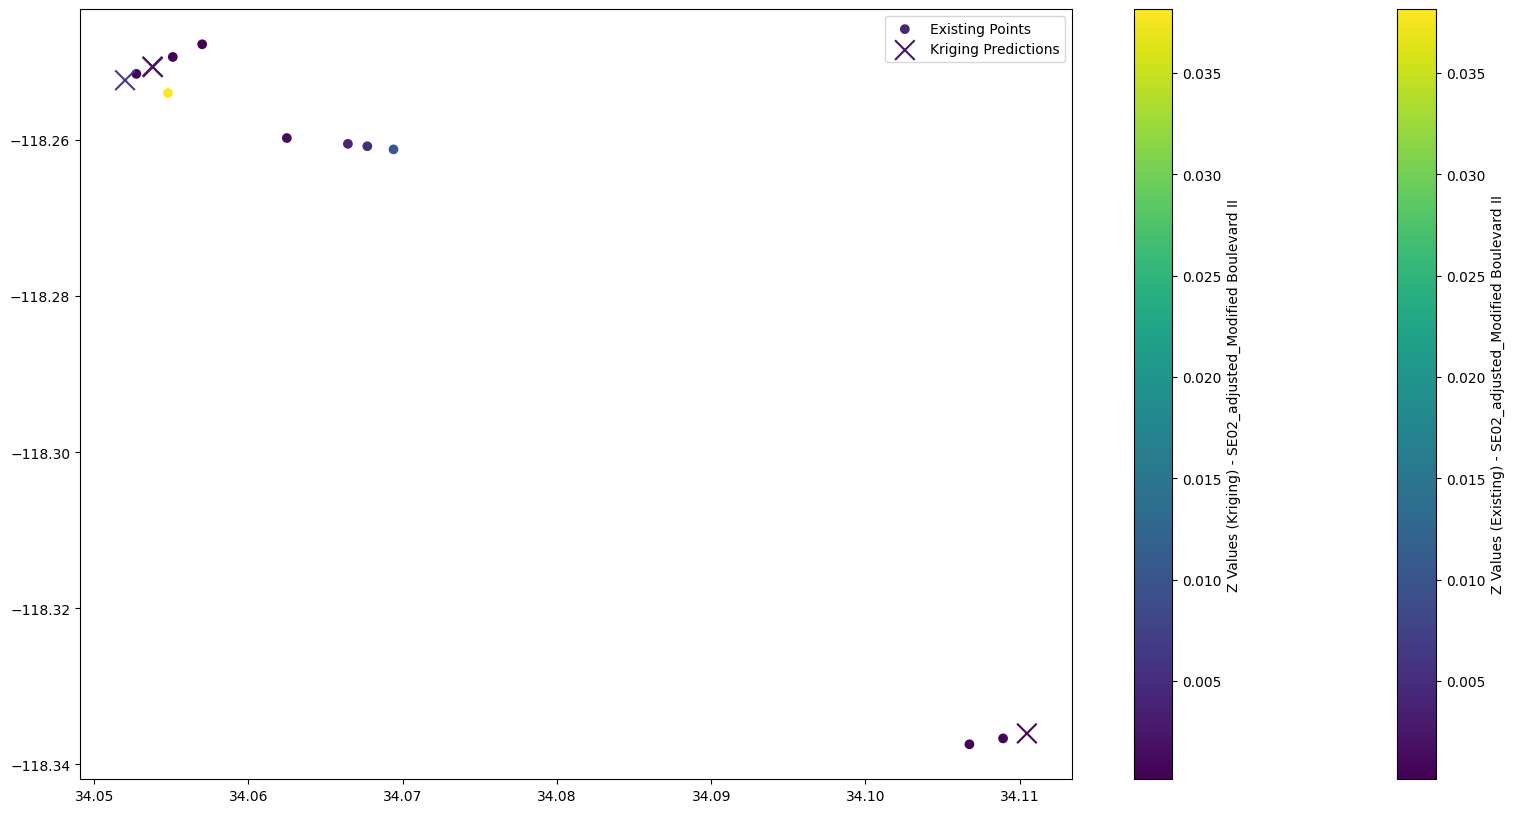

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  SE03_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


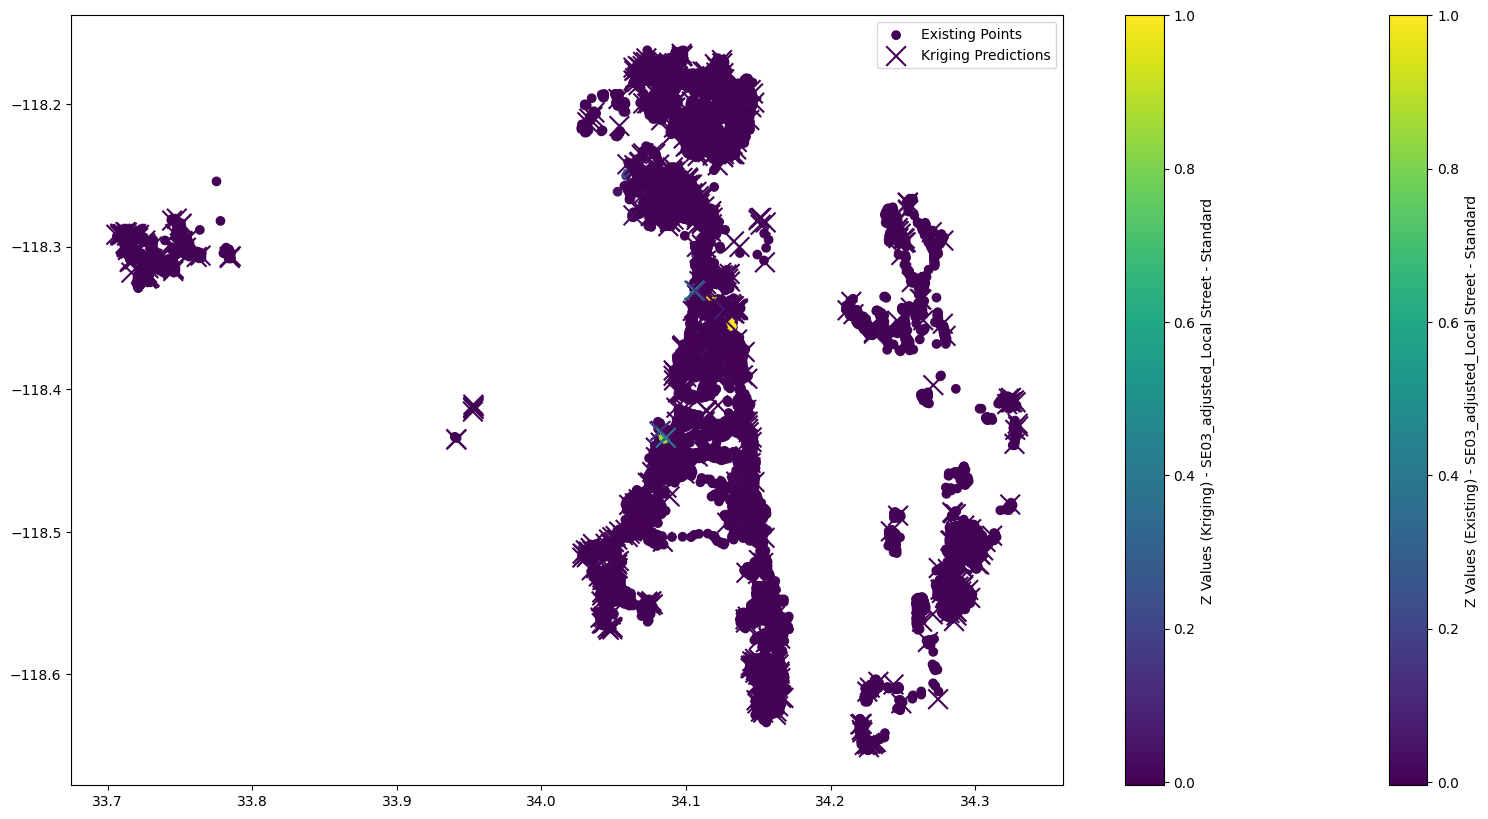

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


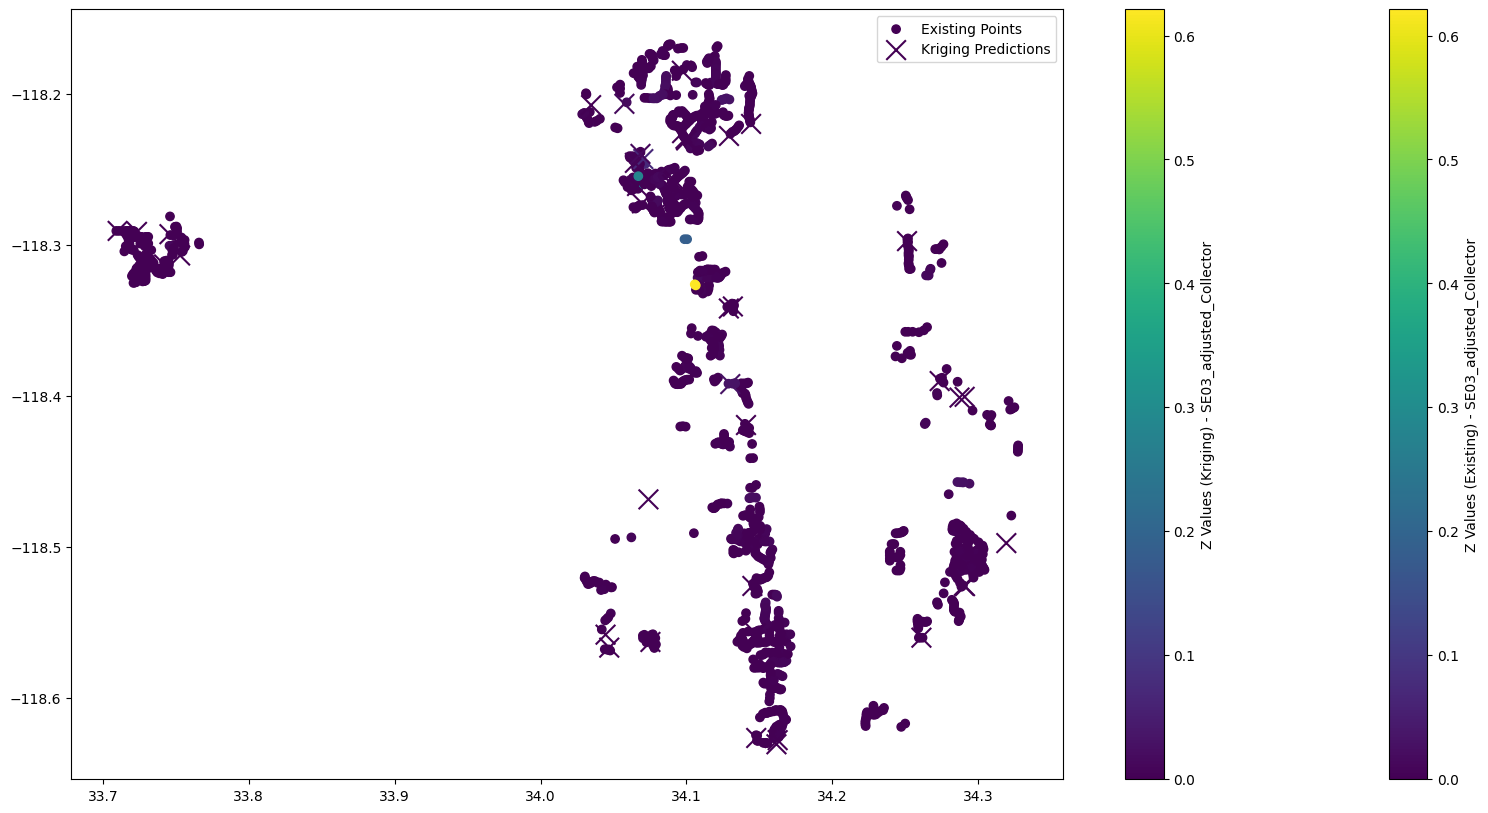

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


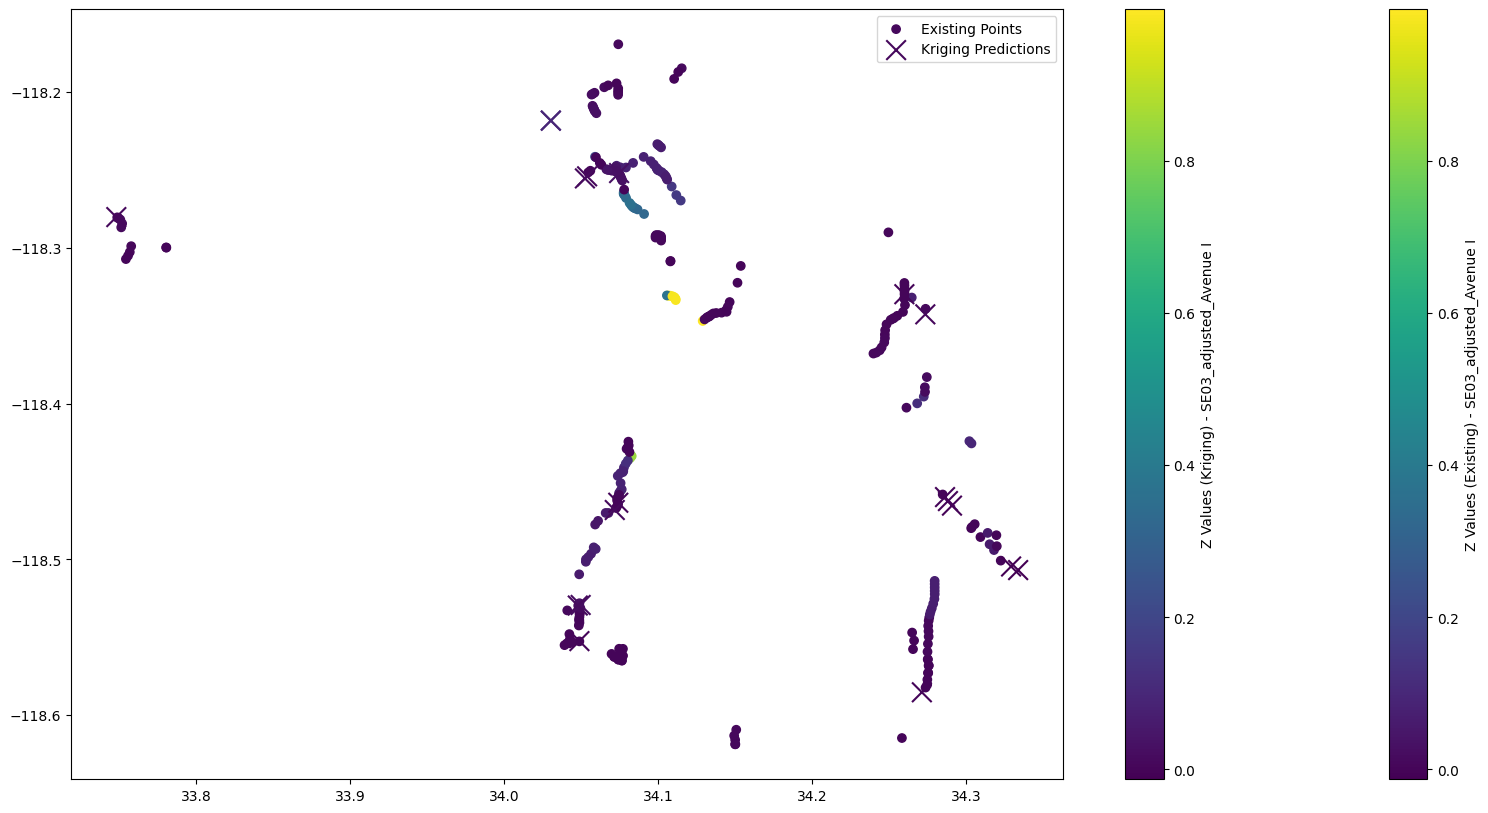

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


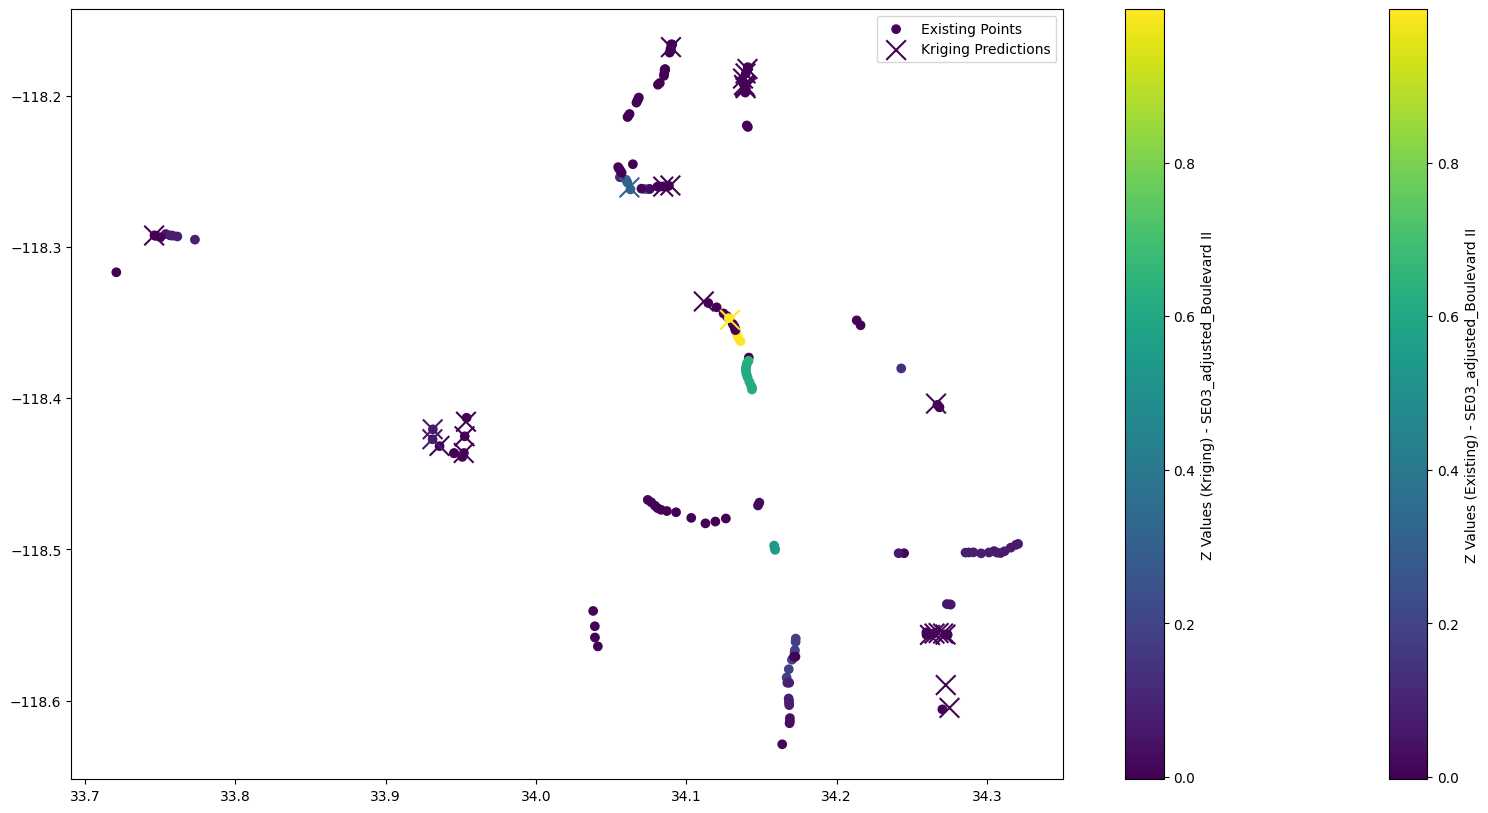

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


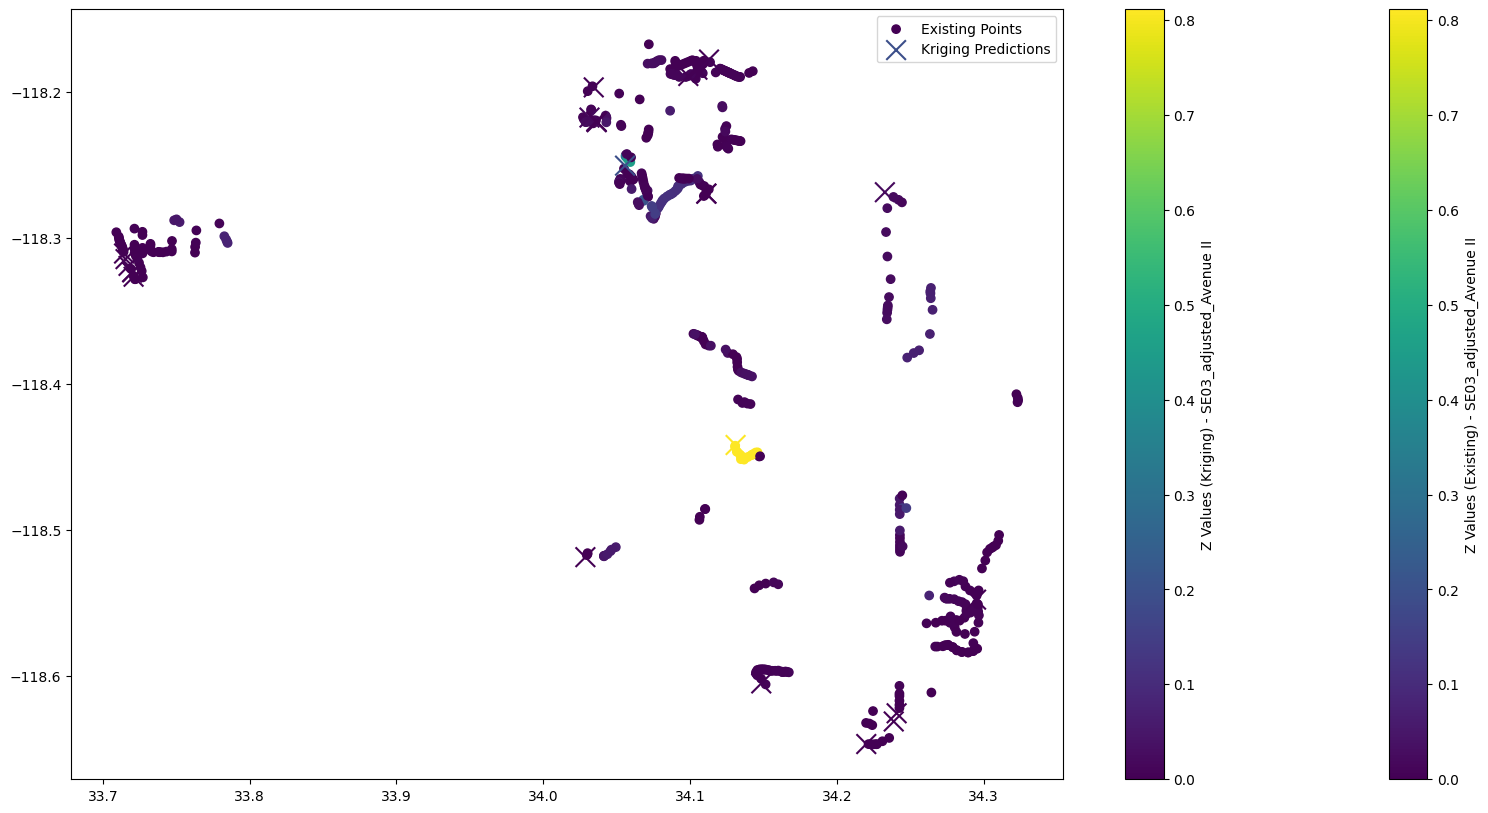

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


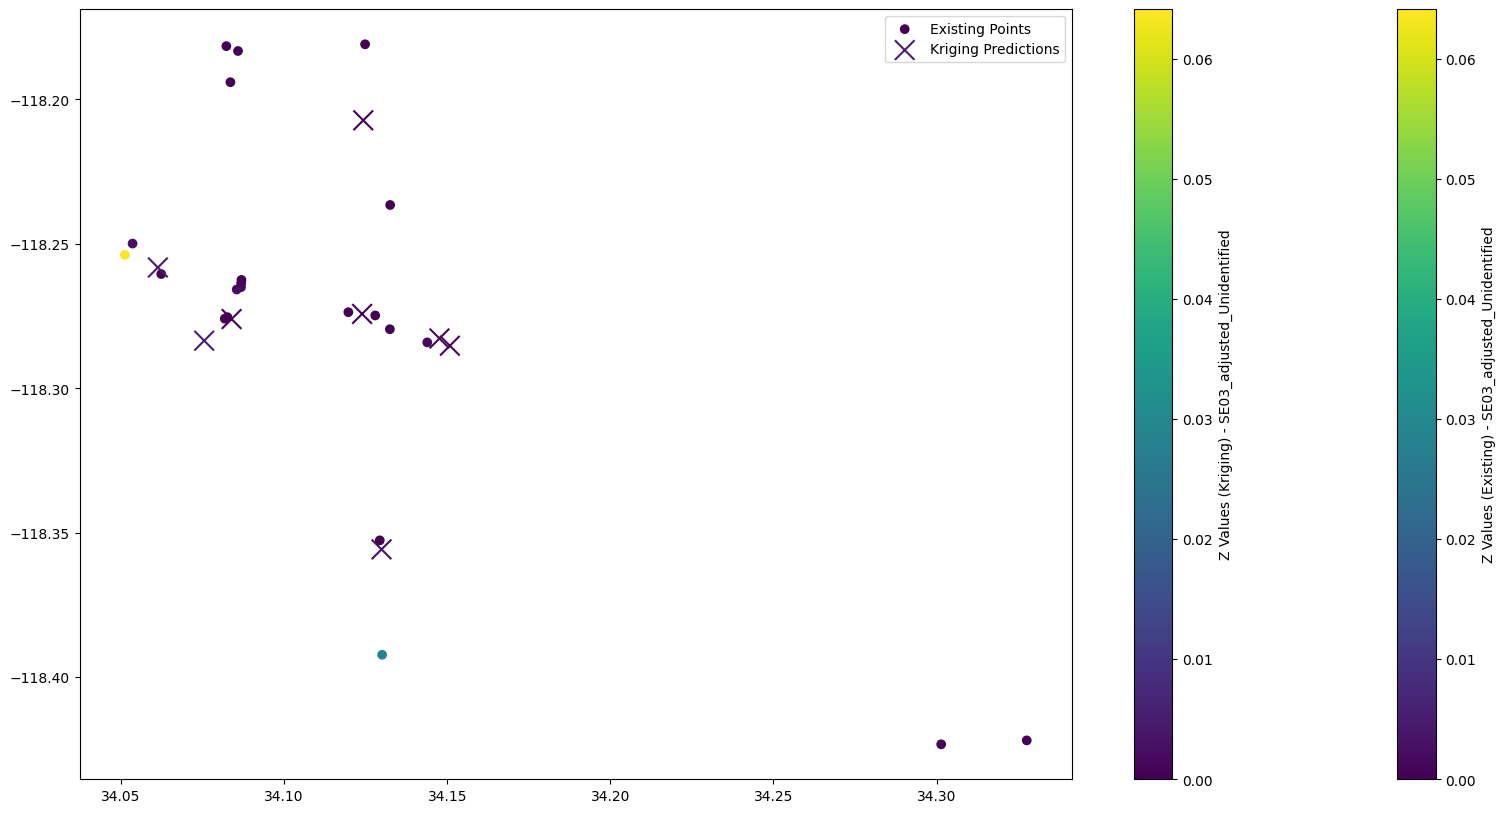

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


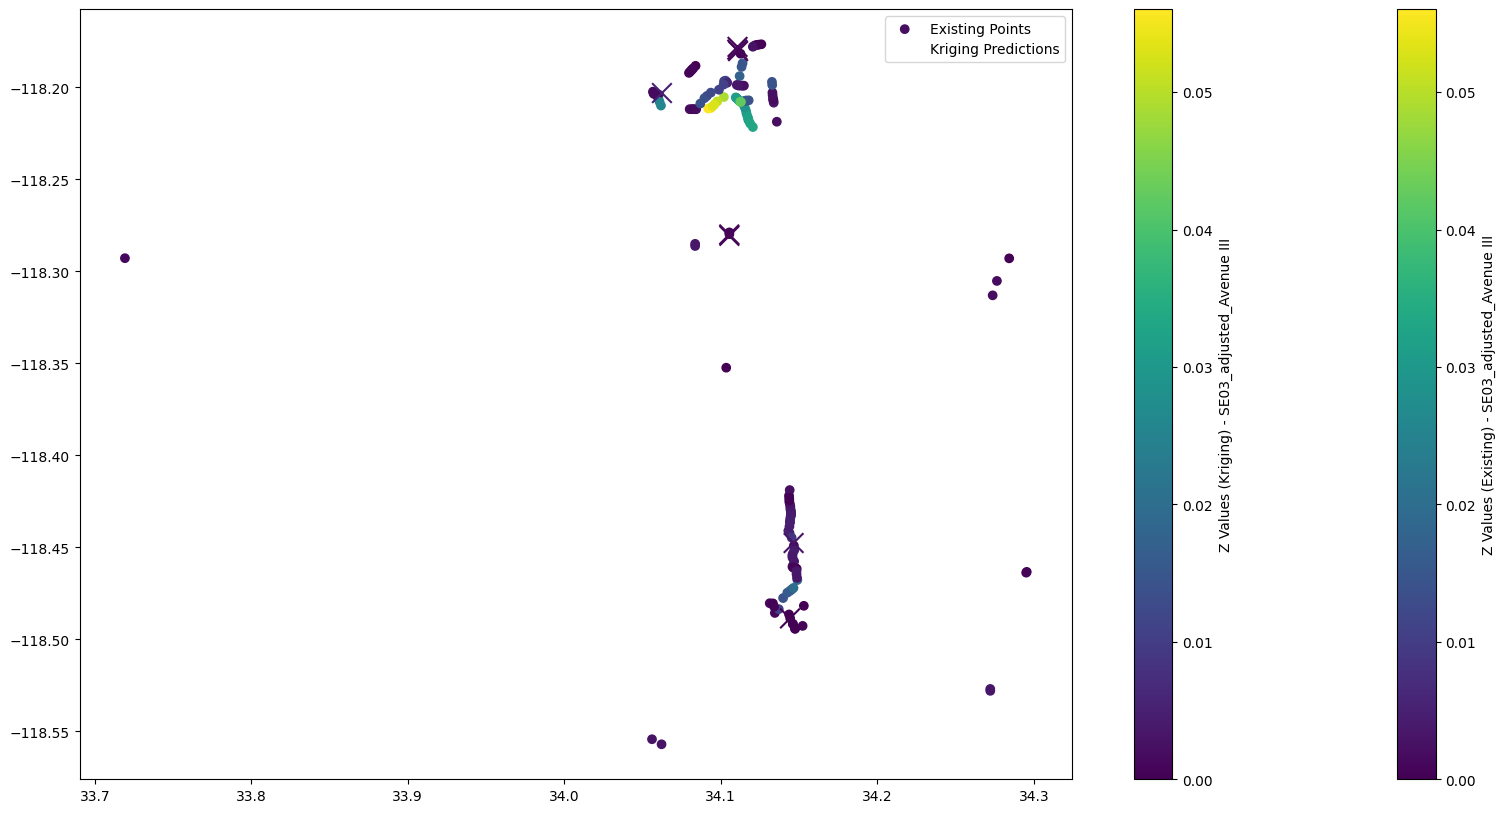

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


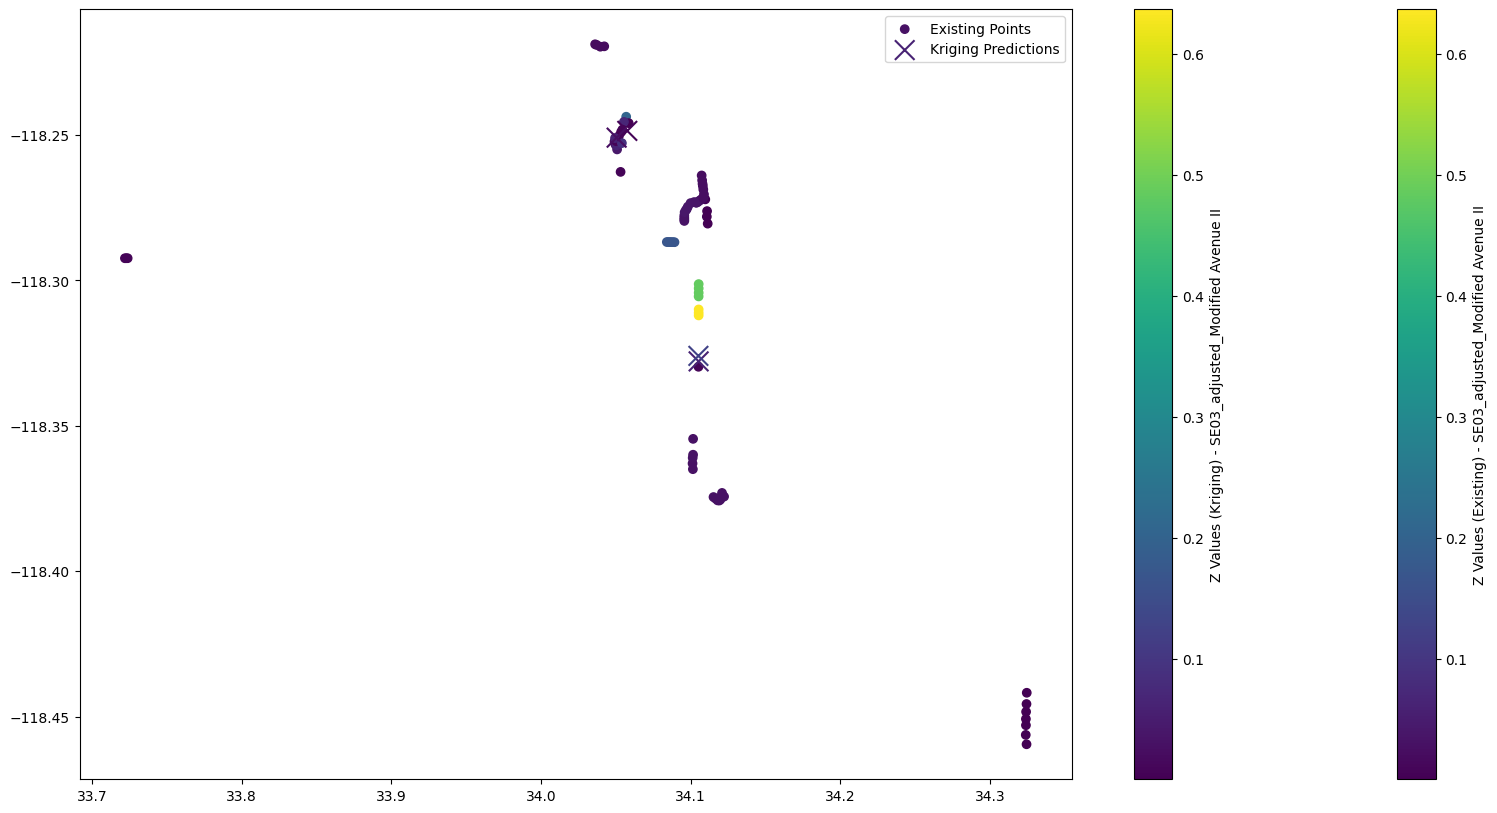

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


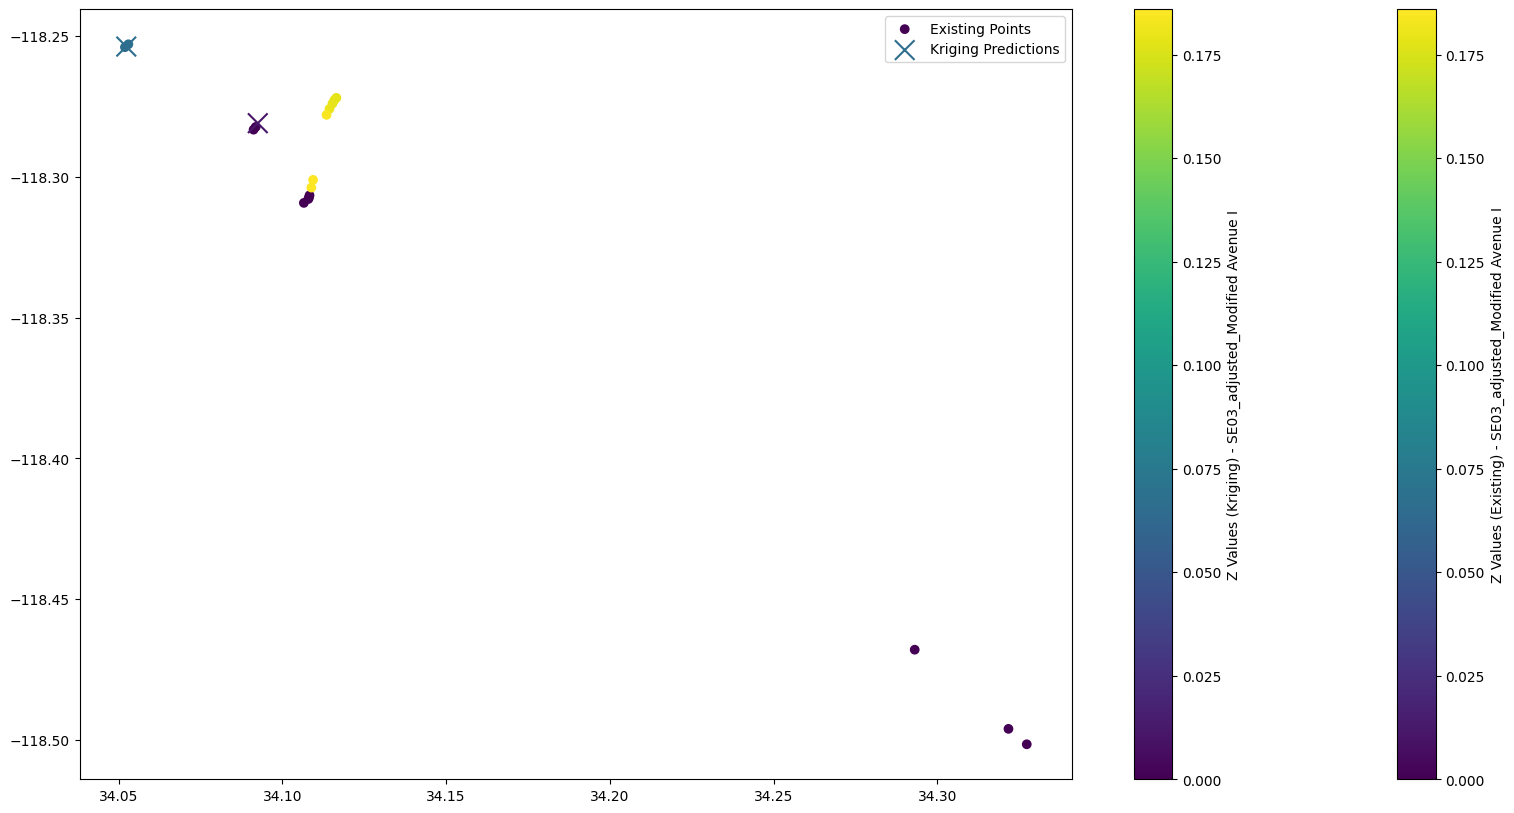

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


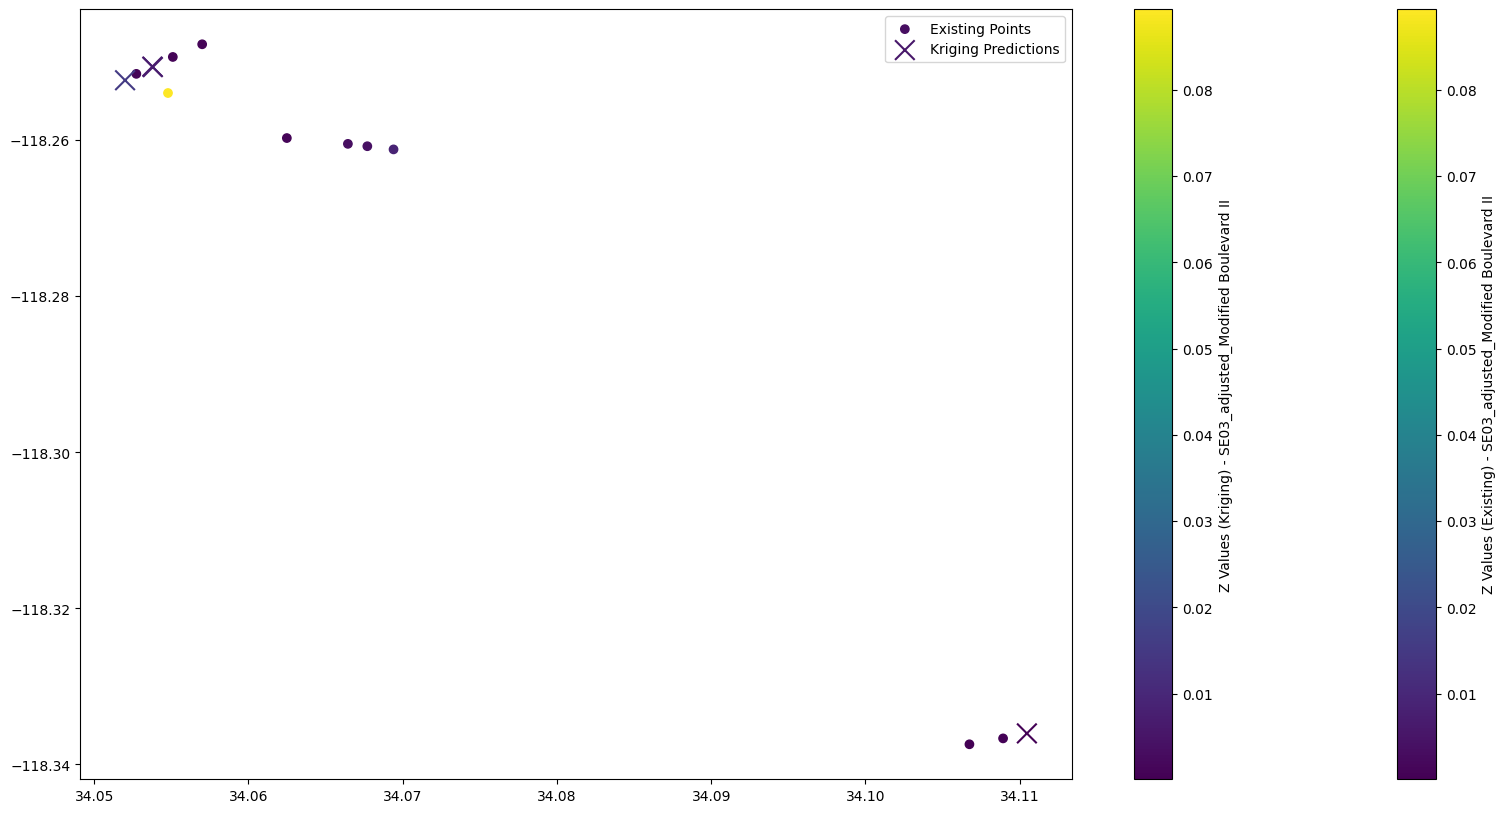

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  SI01_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


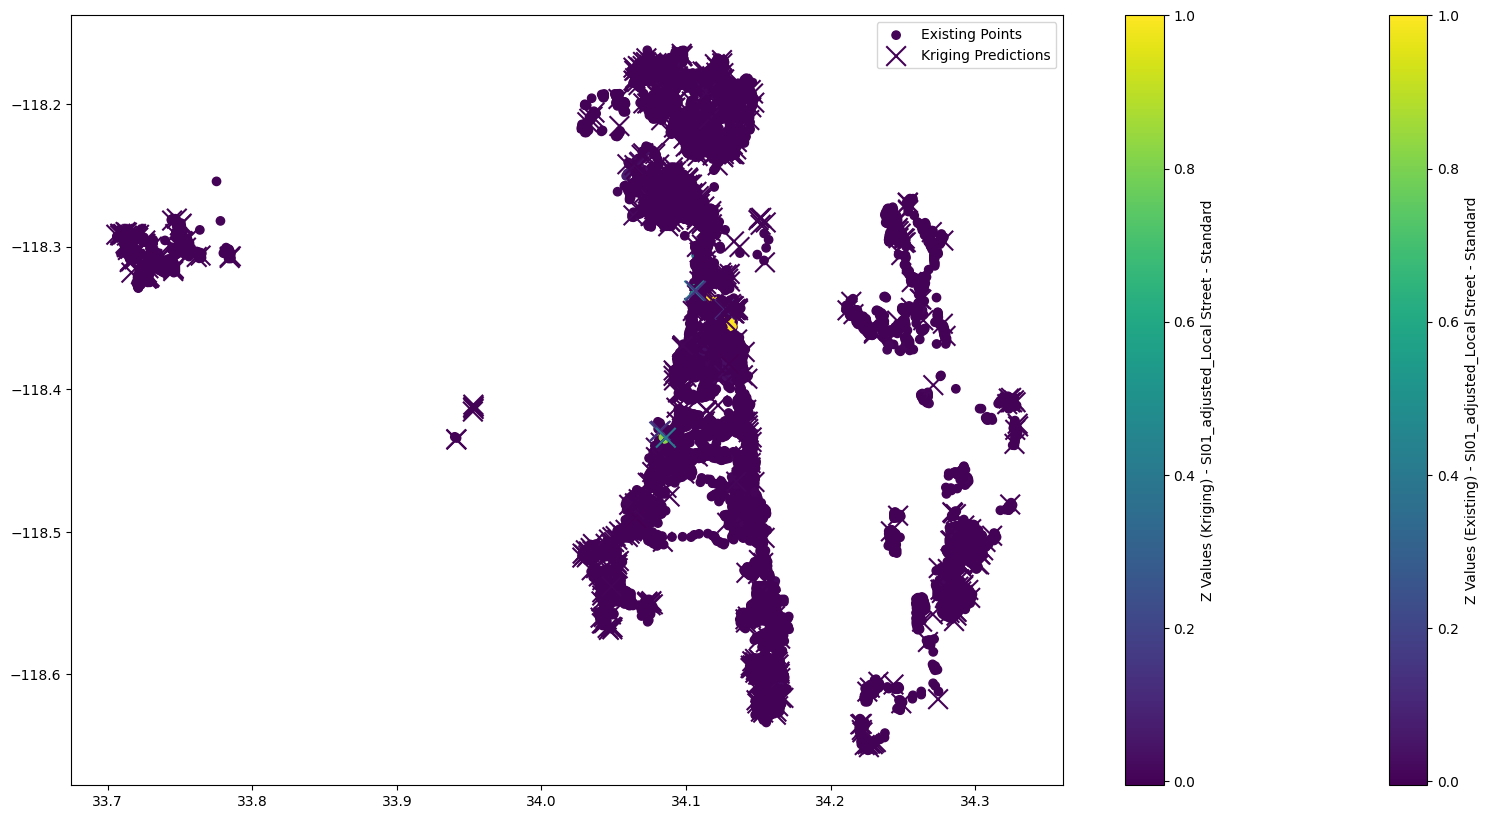

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


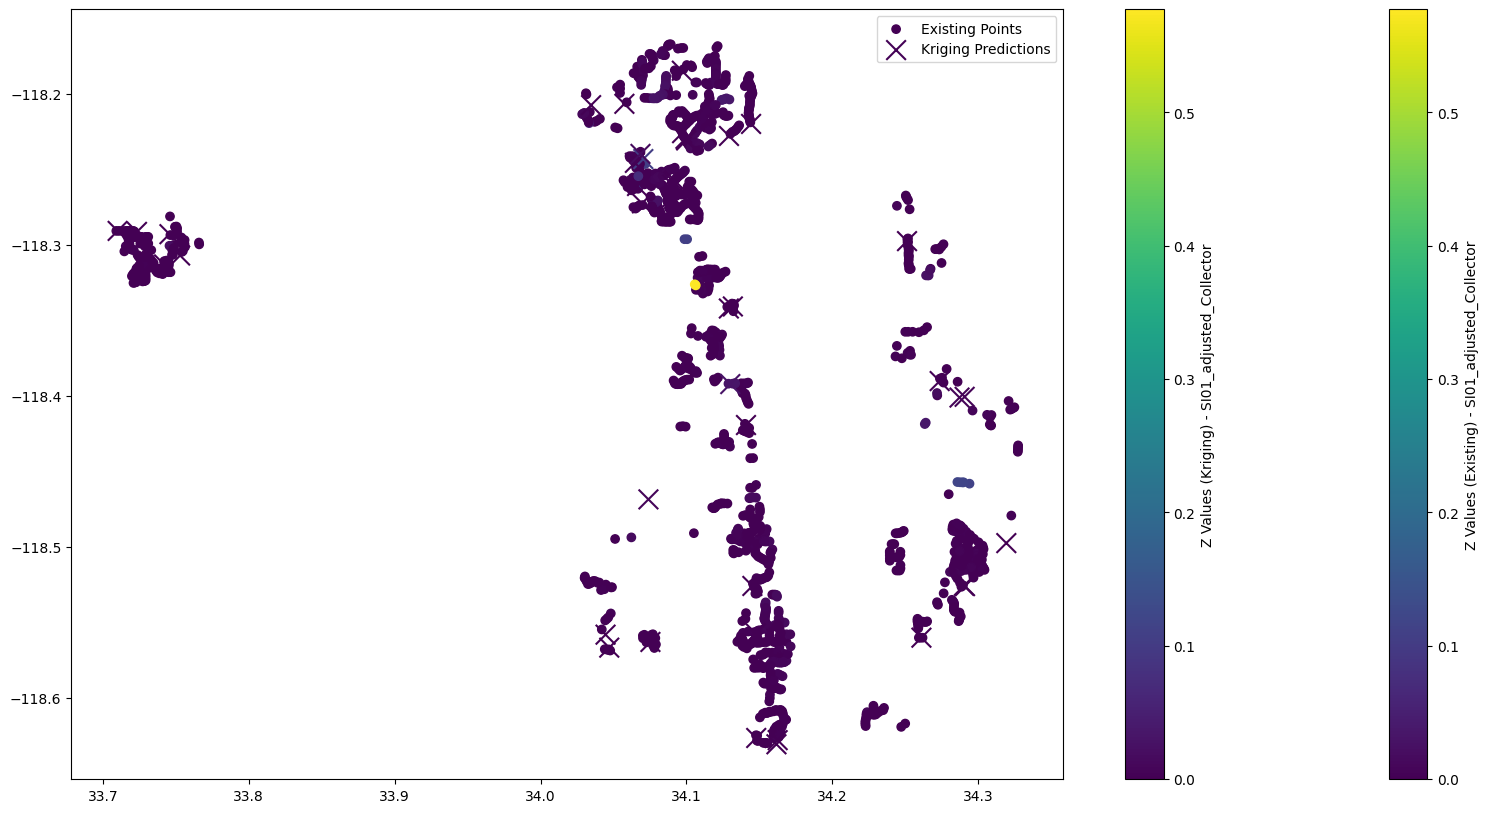

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


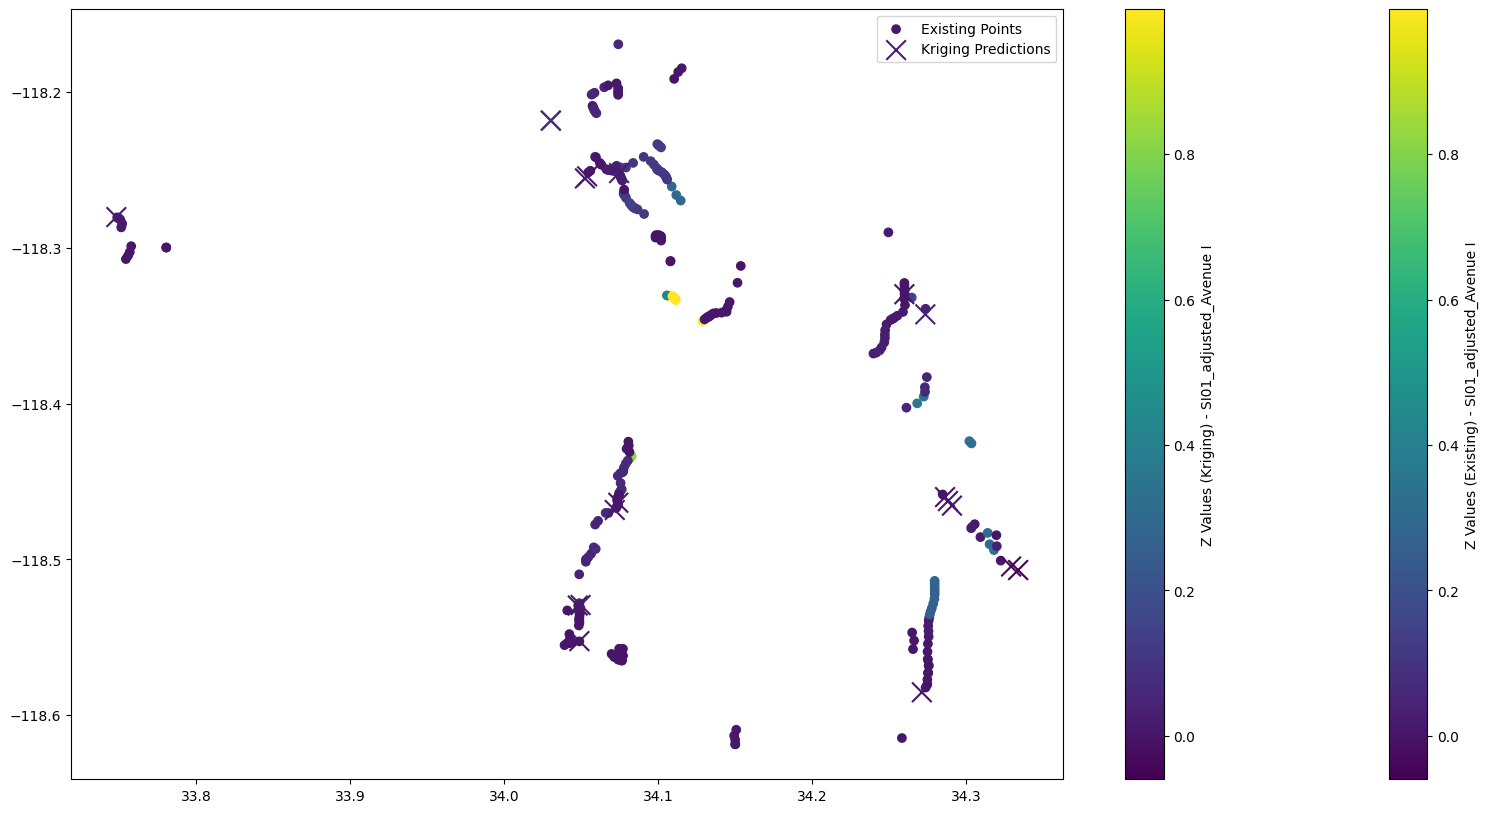

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


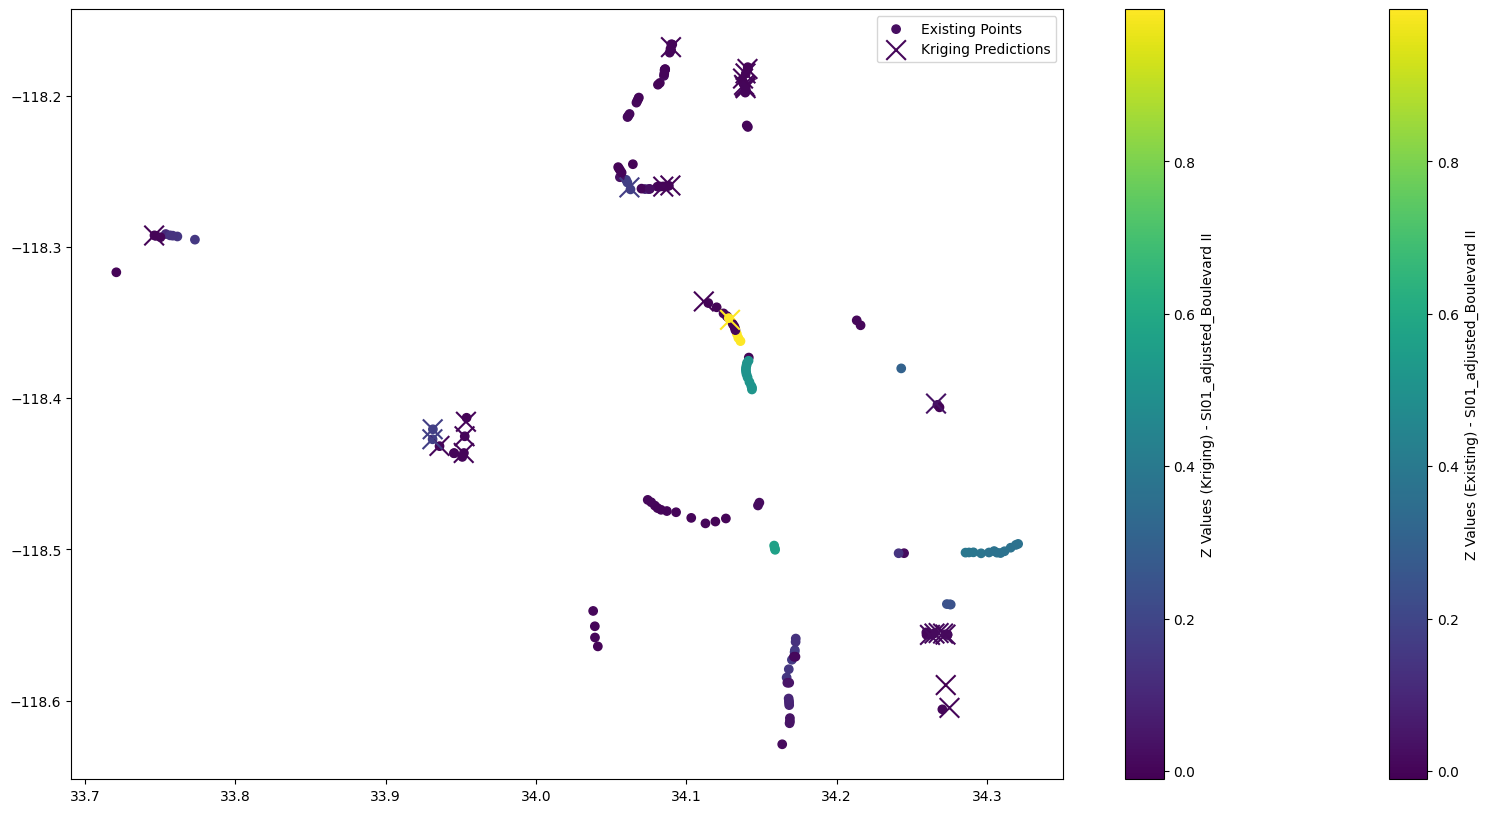

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


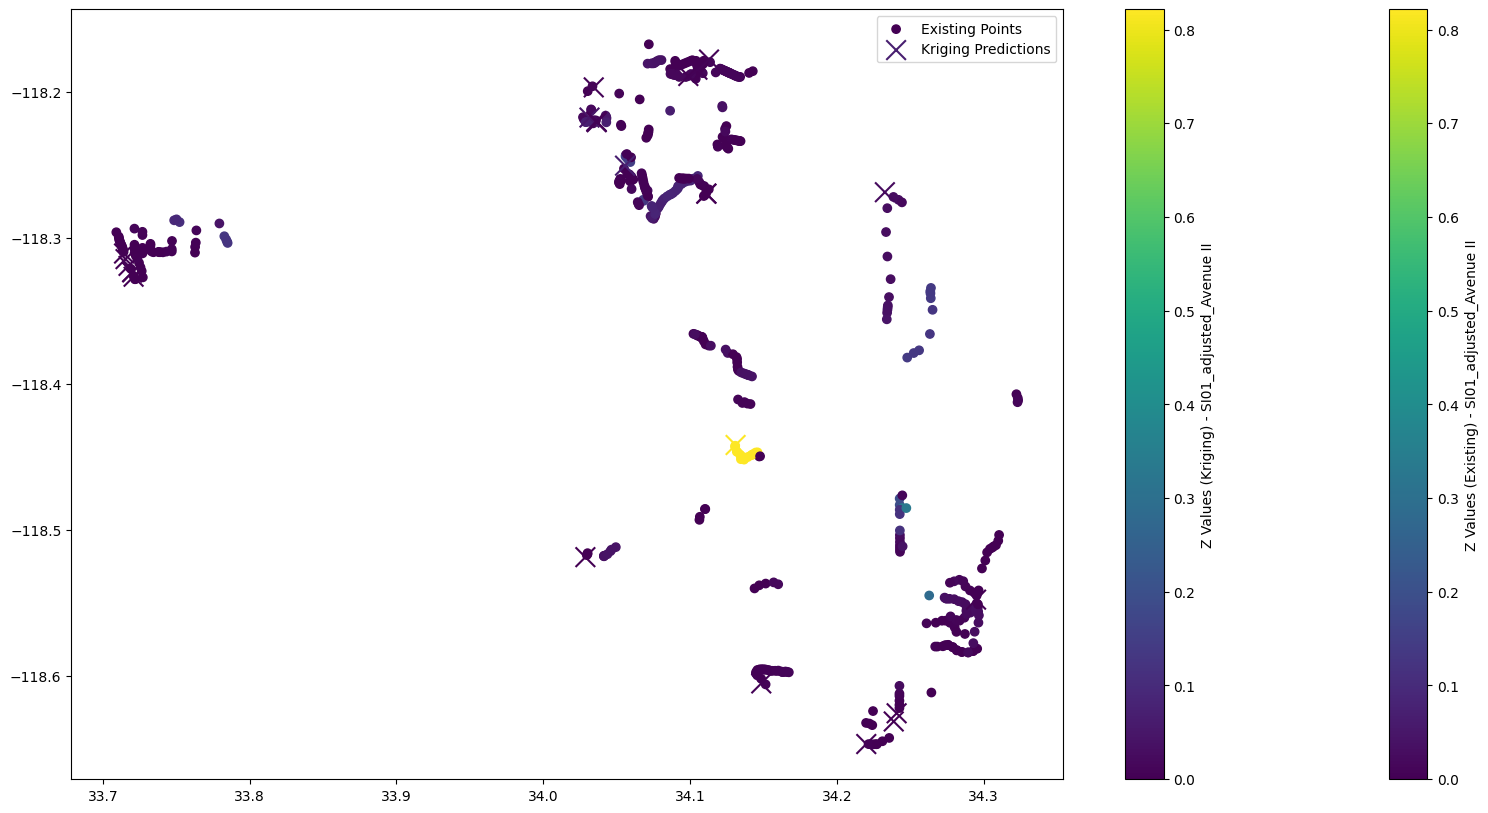

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


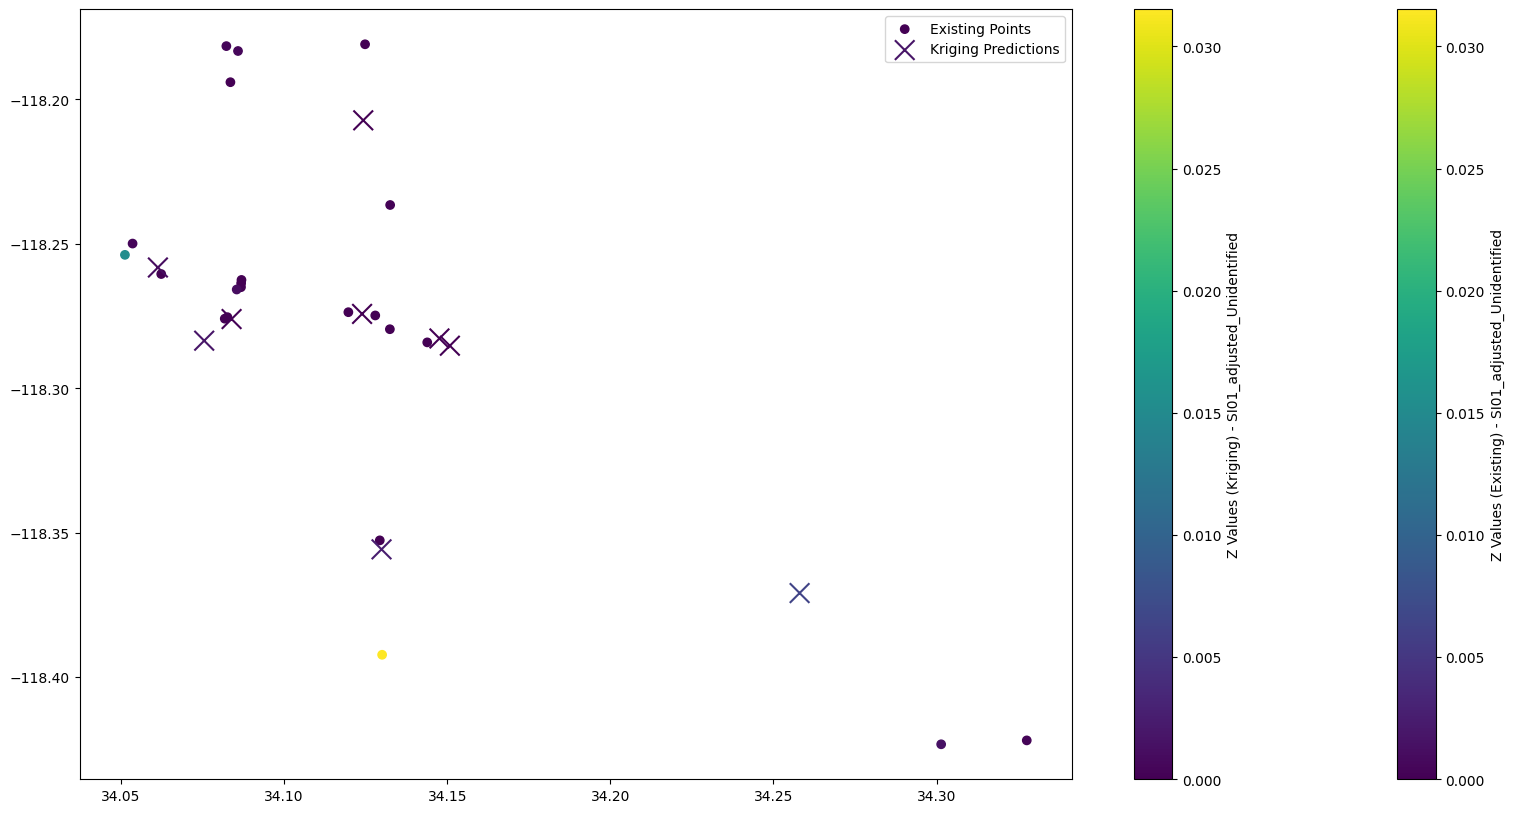

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


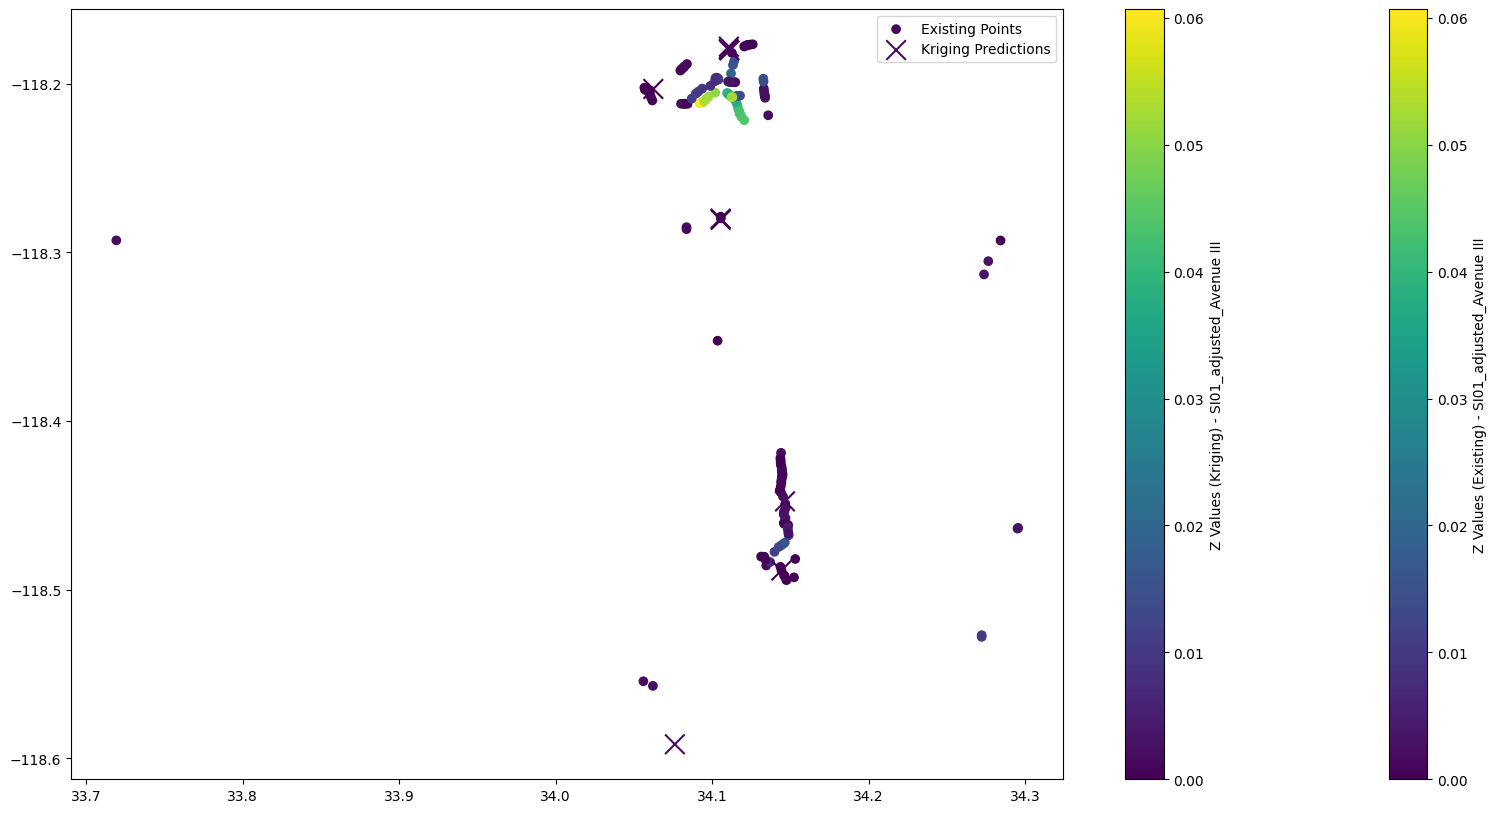

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


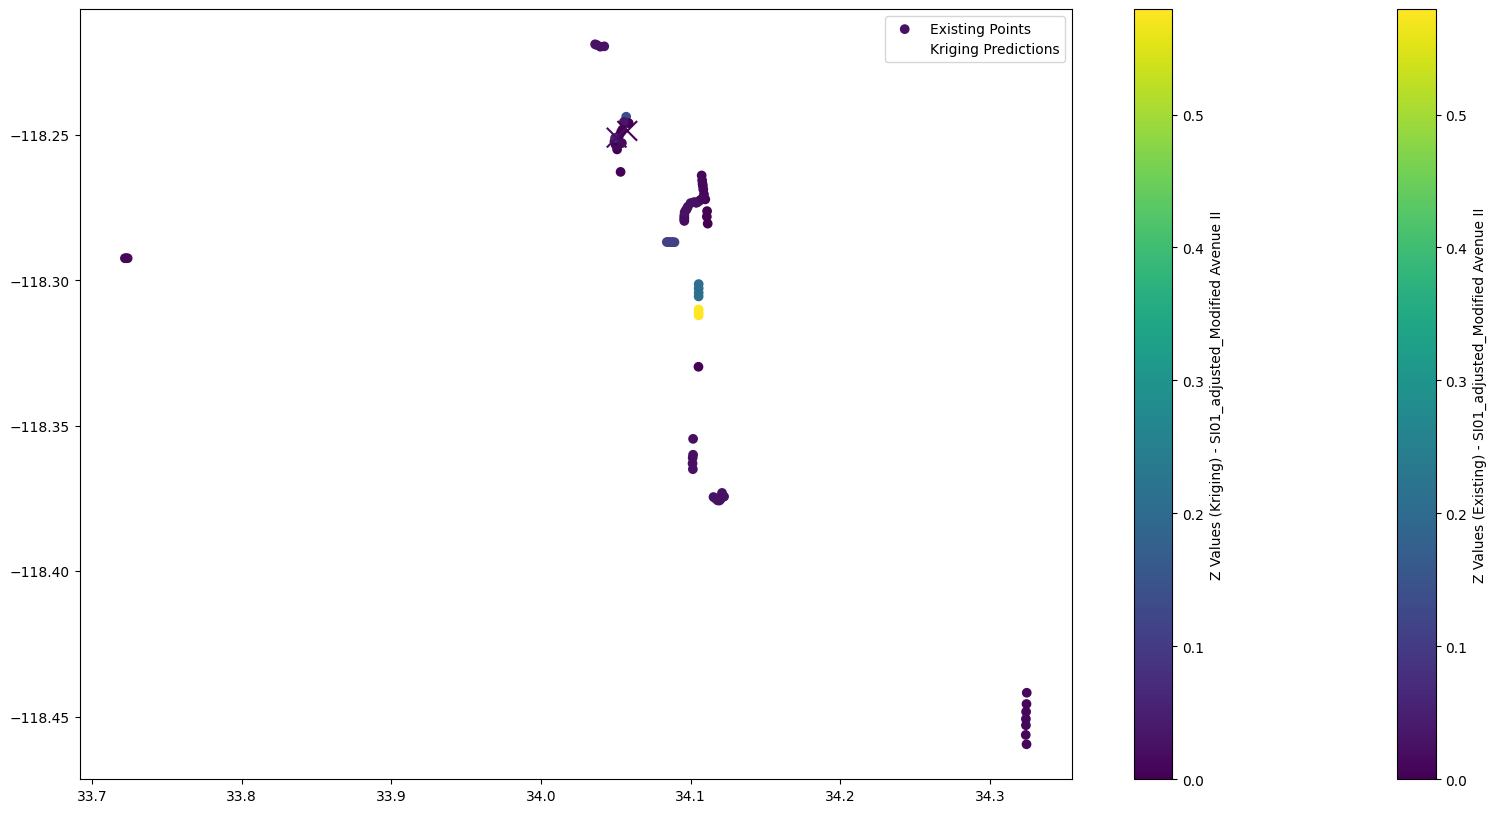

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


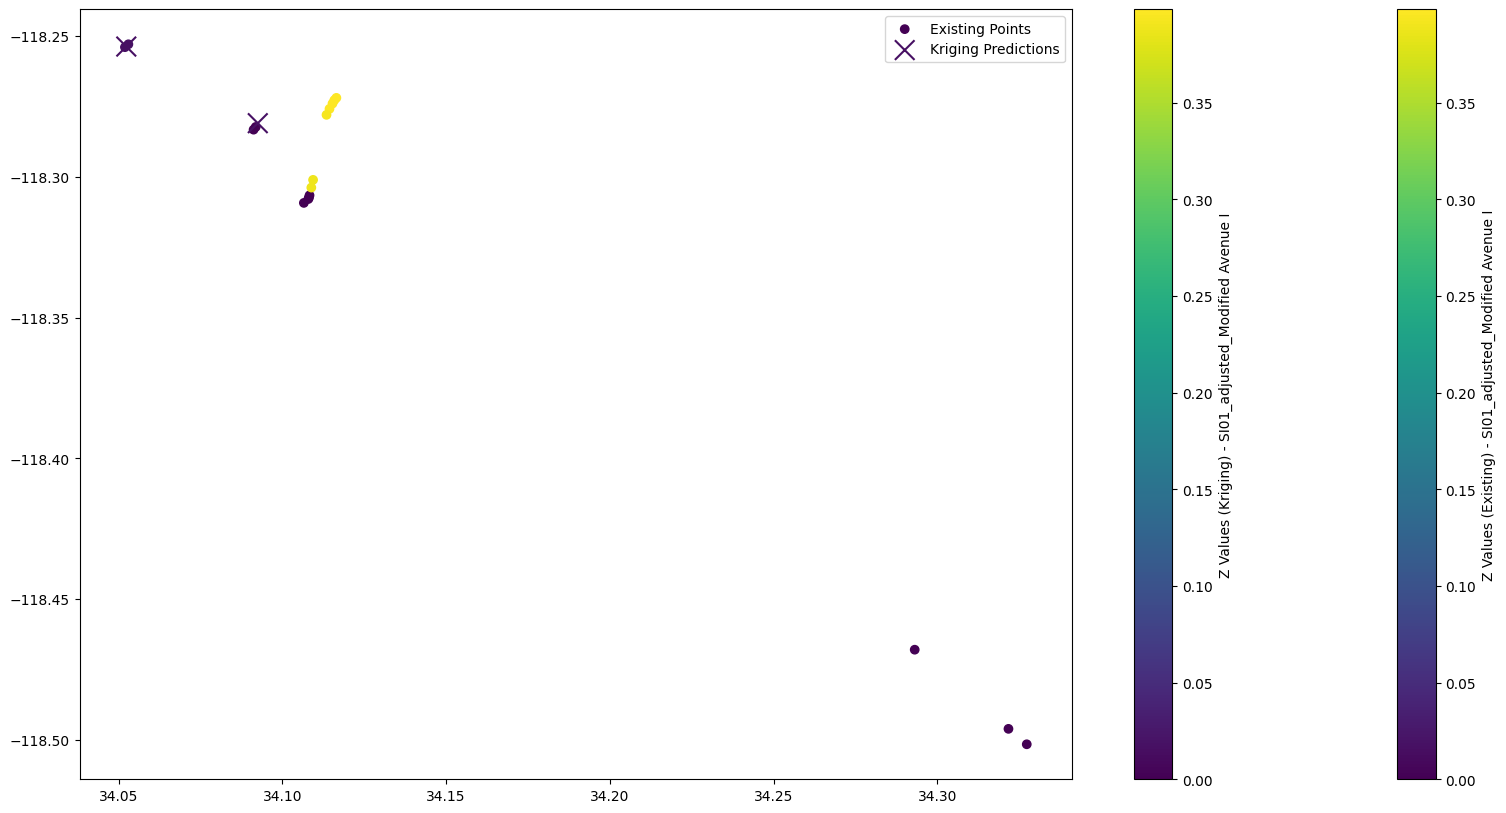

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


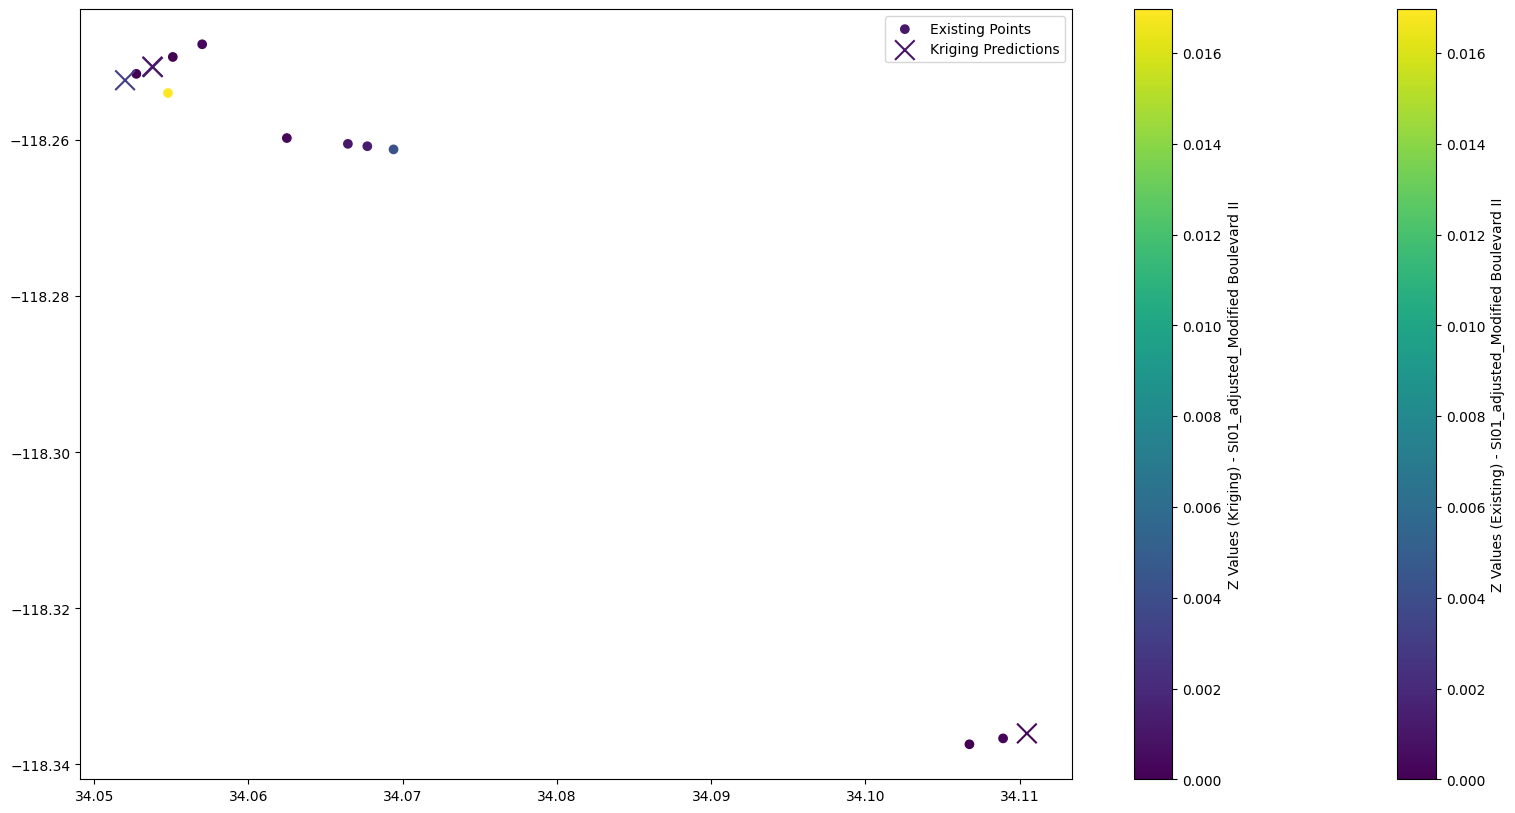

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  SI02_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


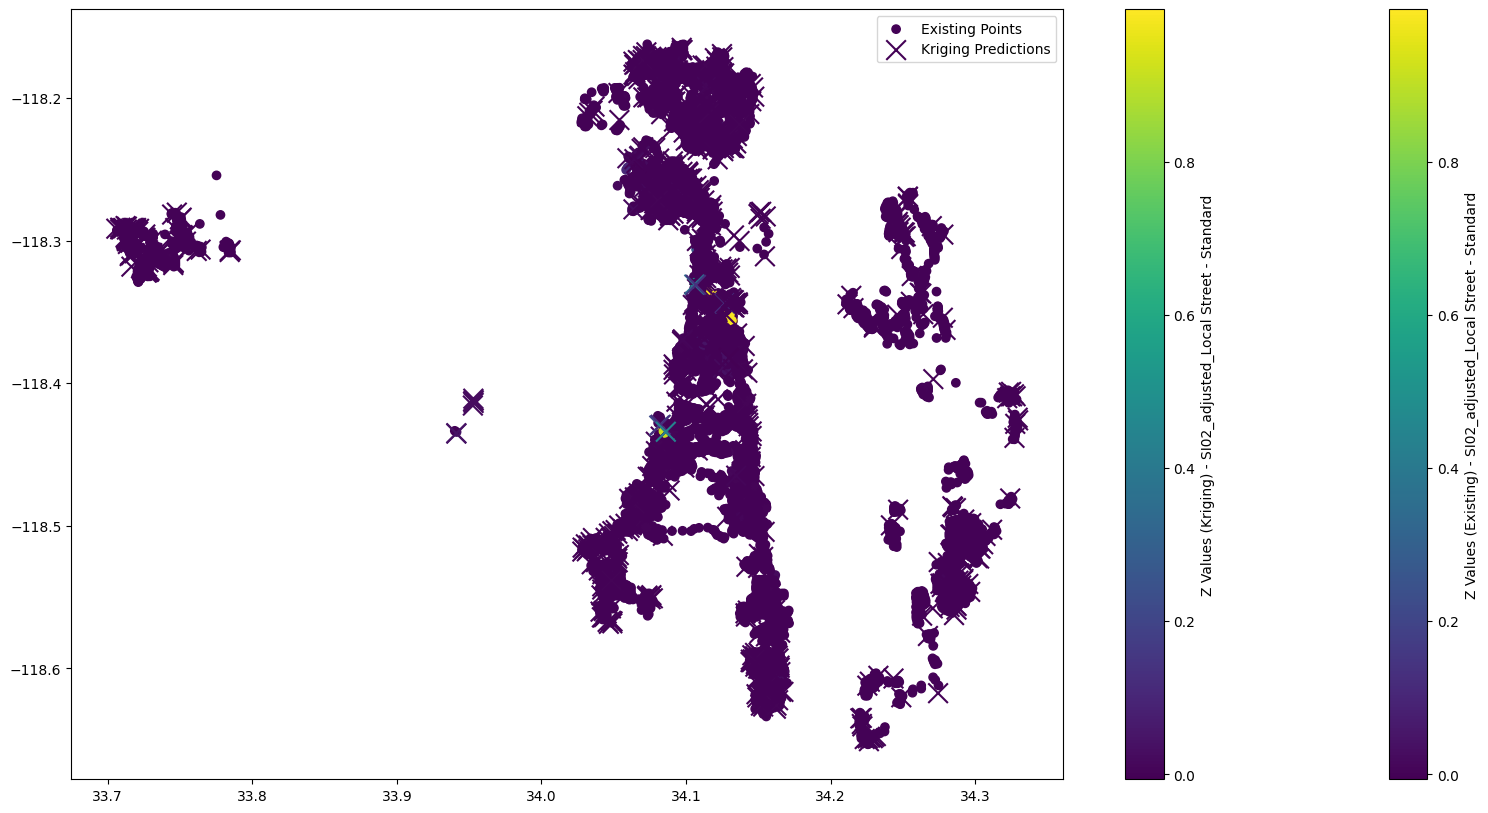

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


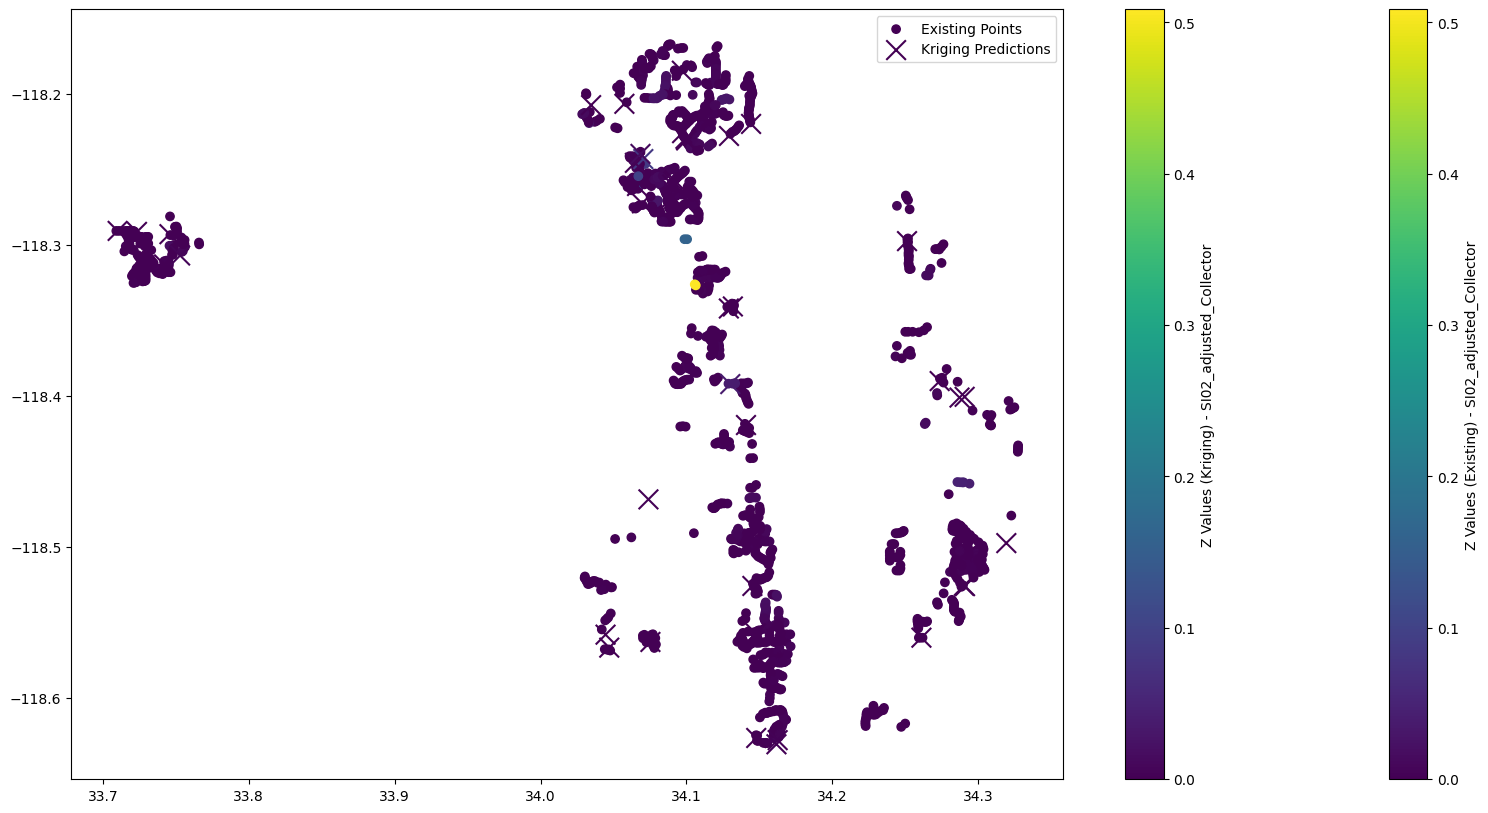

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


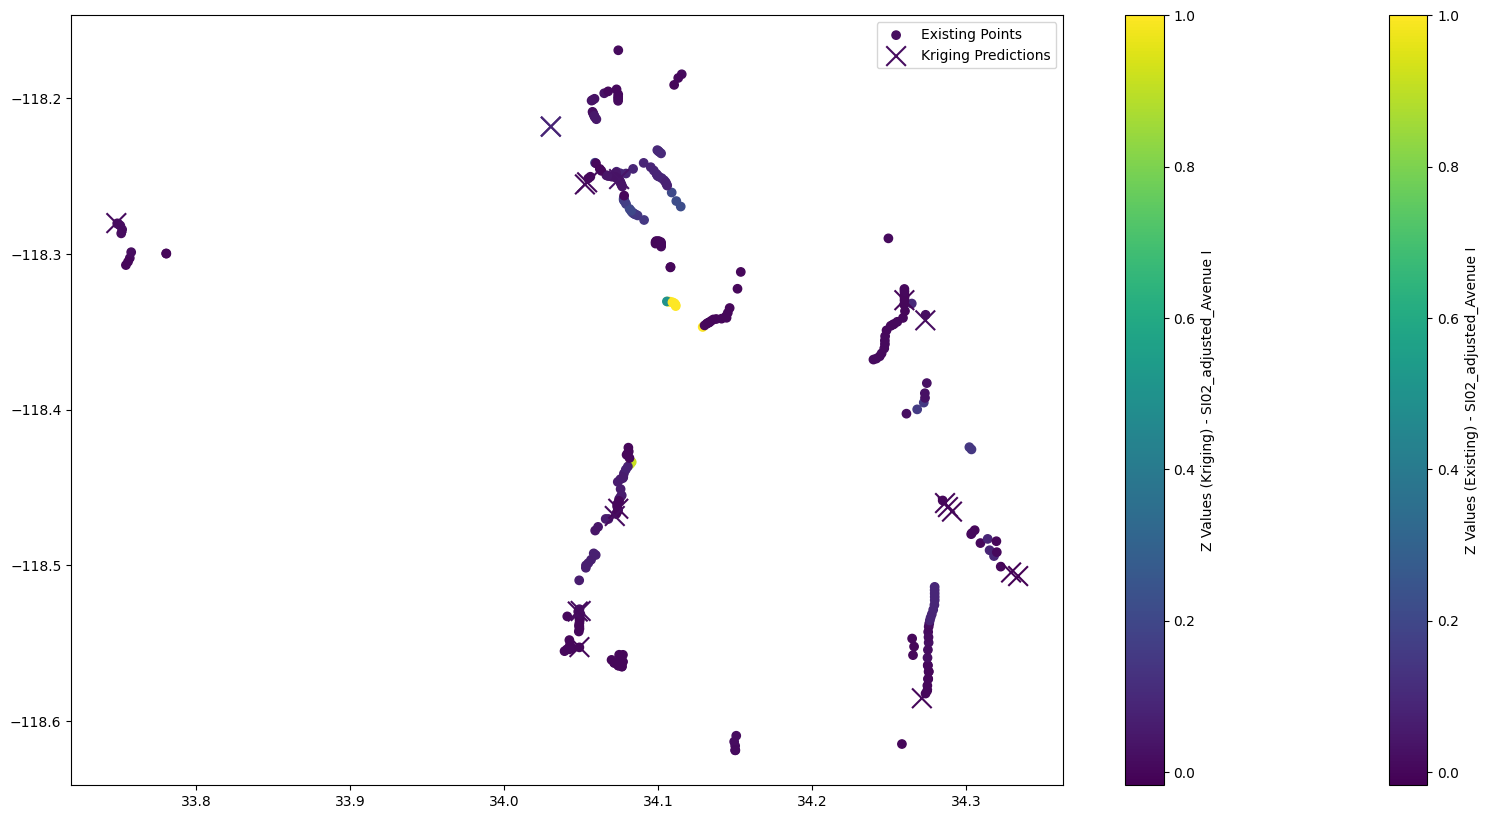

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


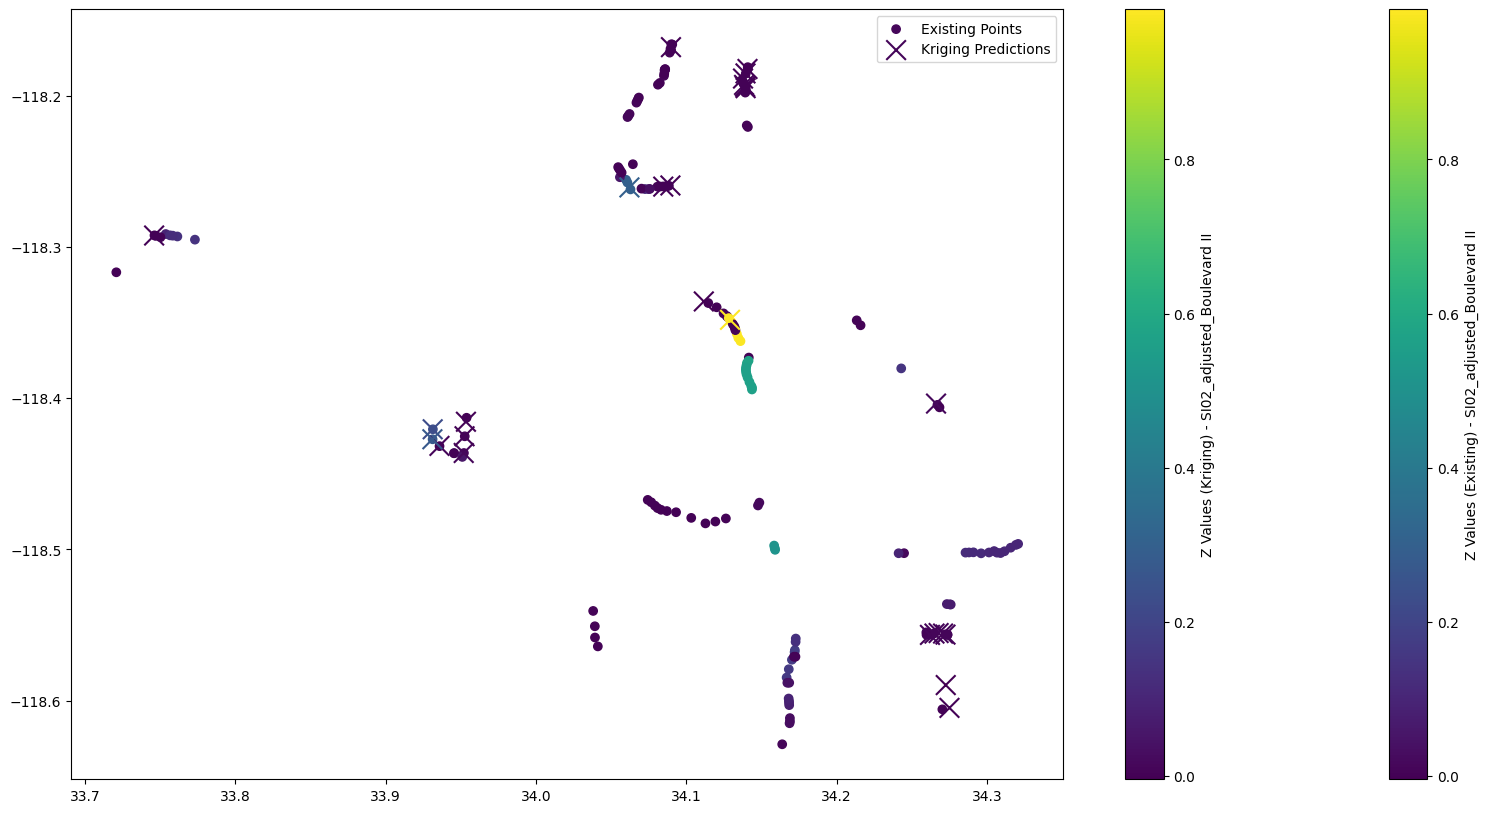

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


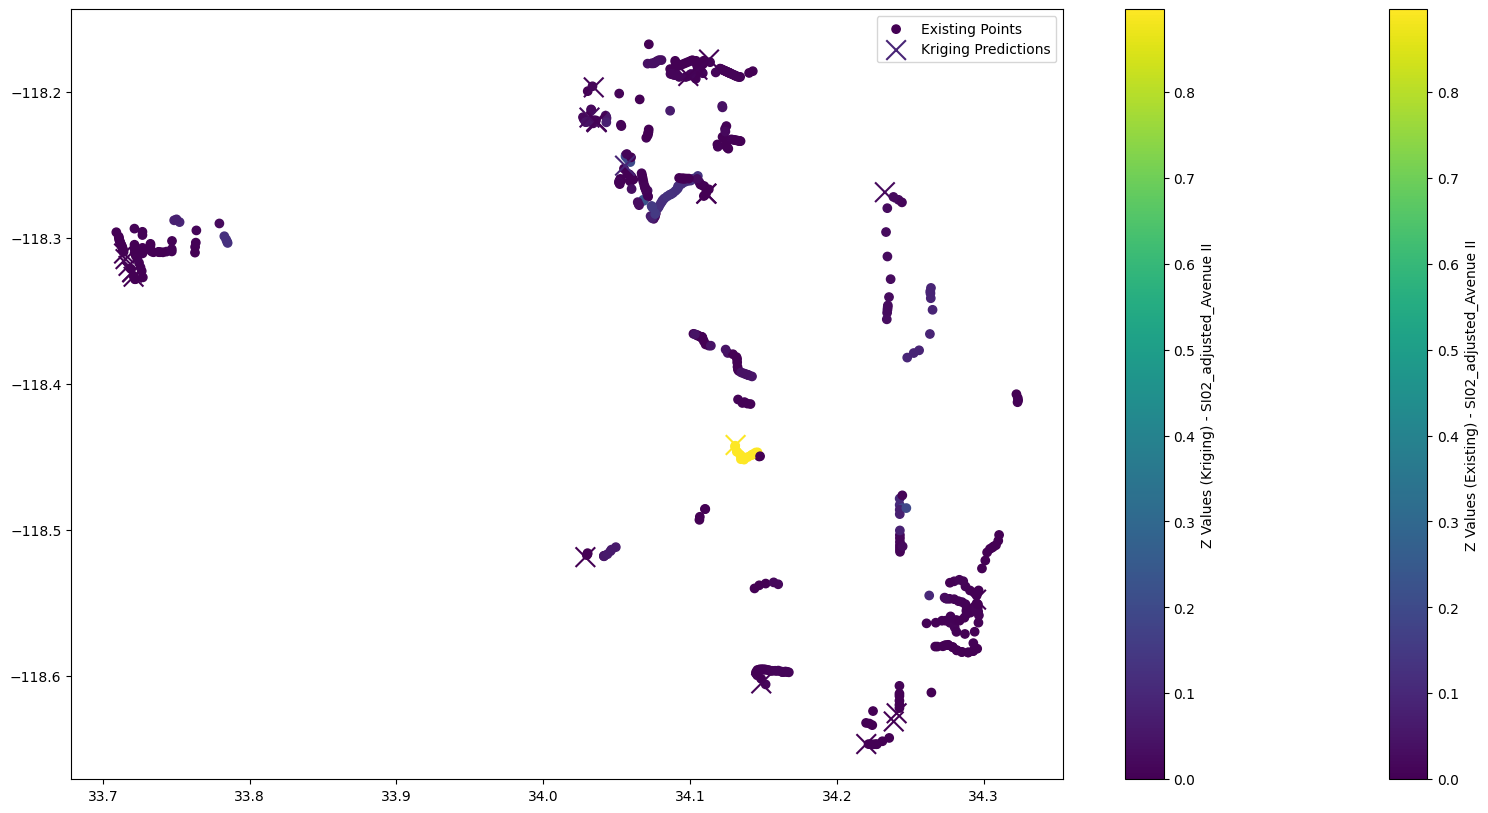

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


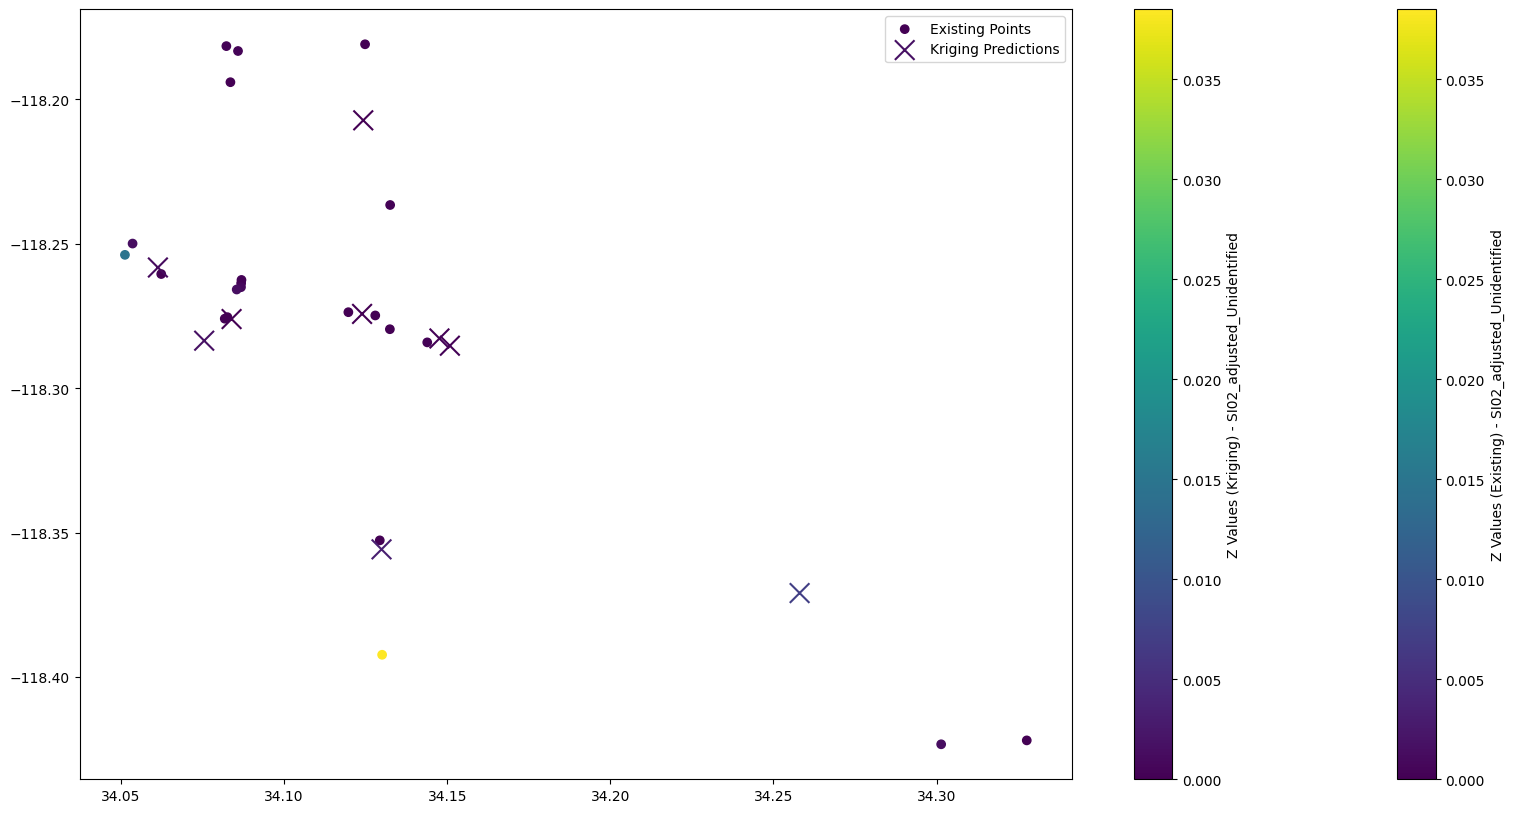

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


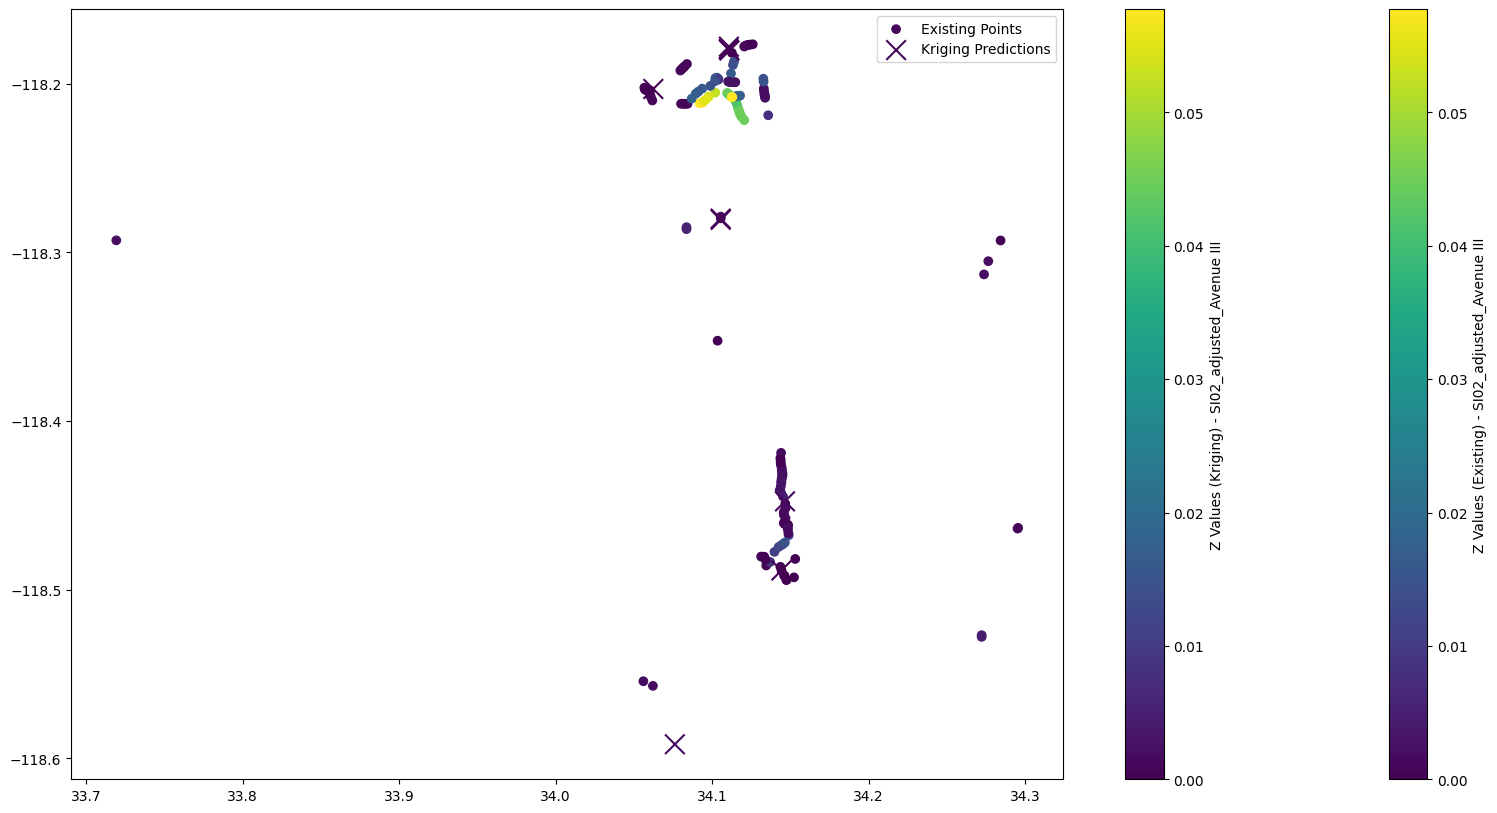

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


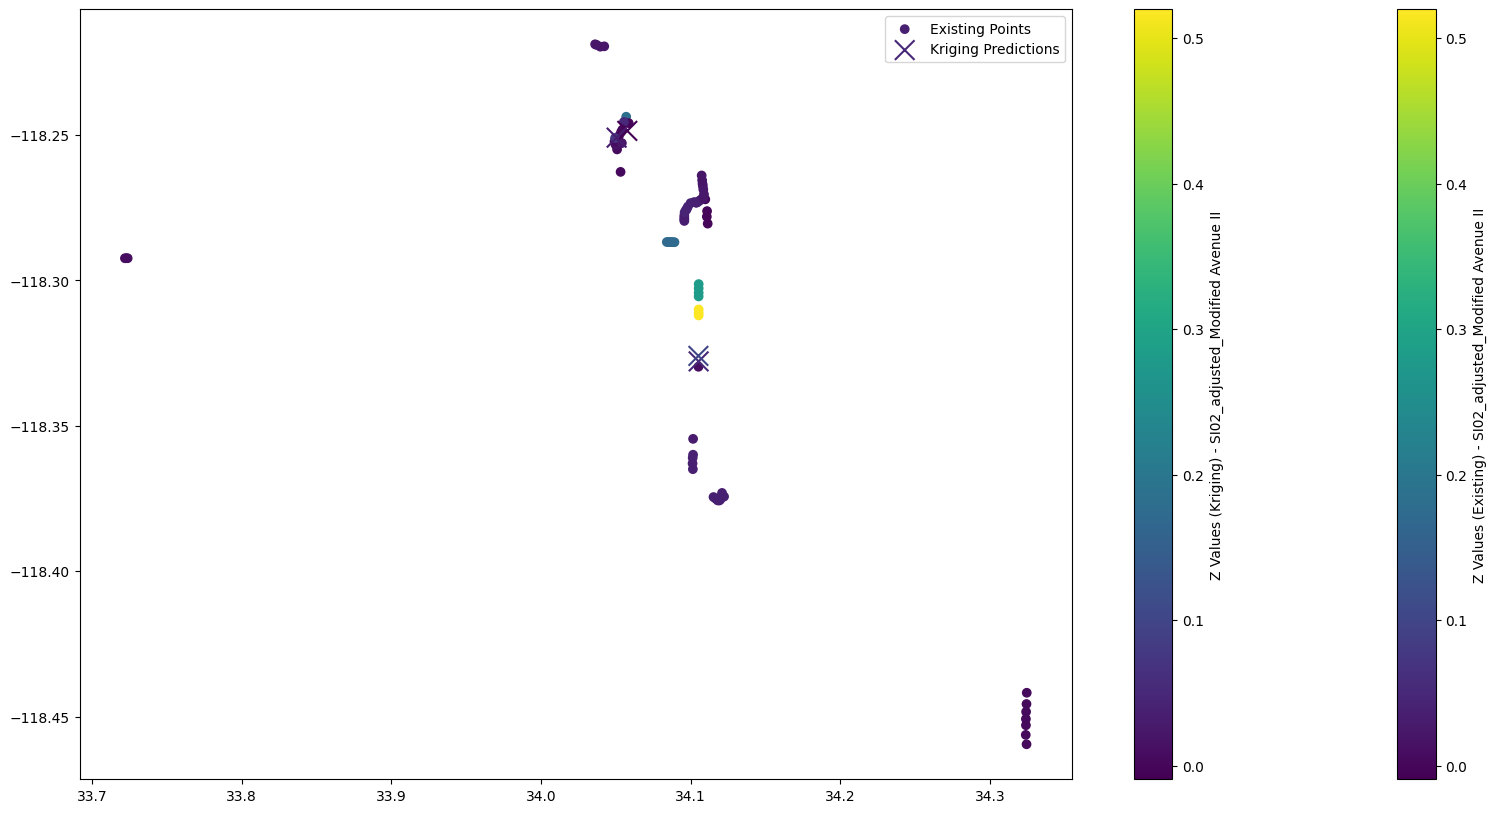

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


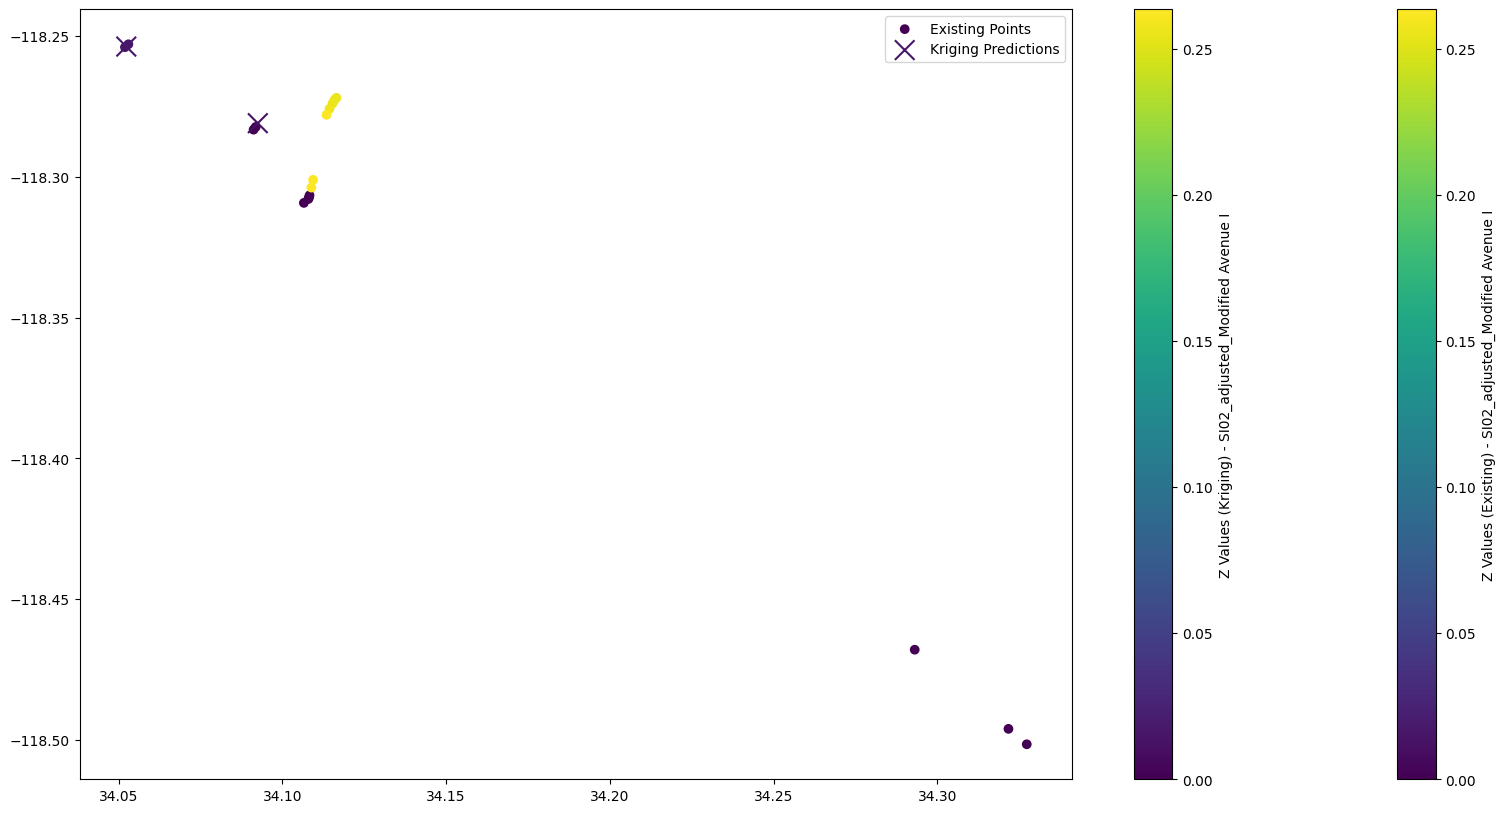

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


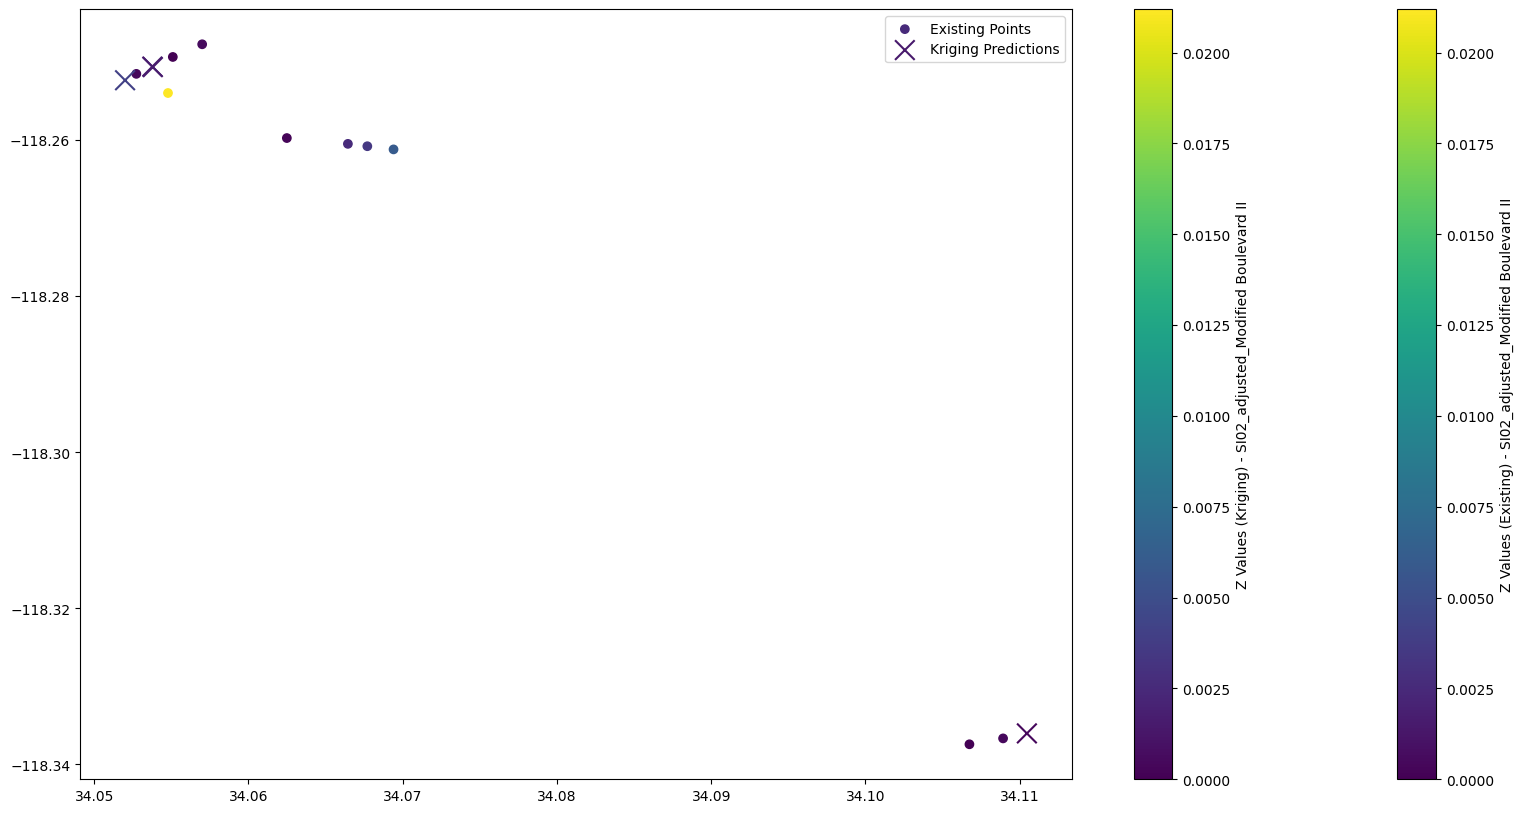

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  SI03_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


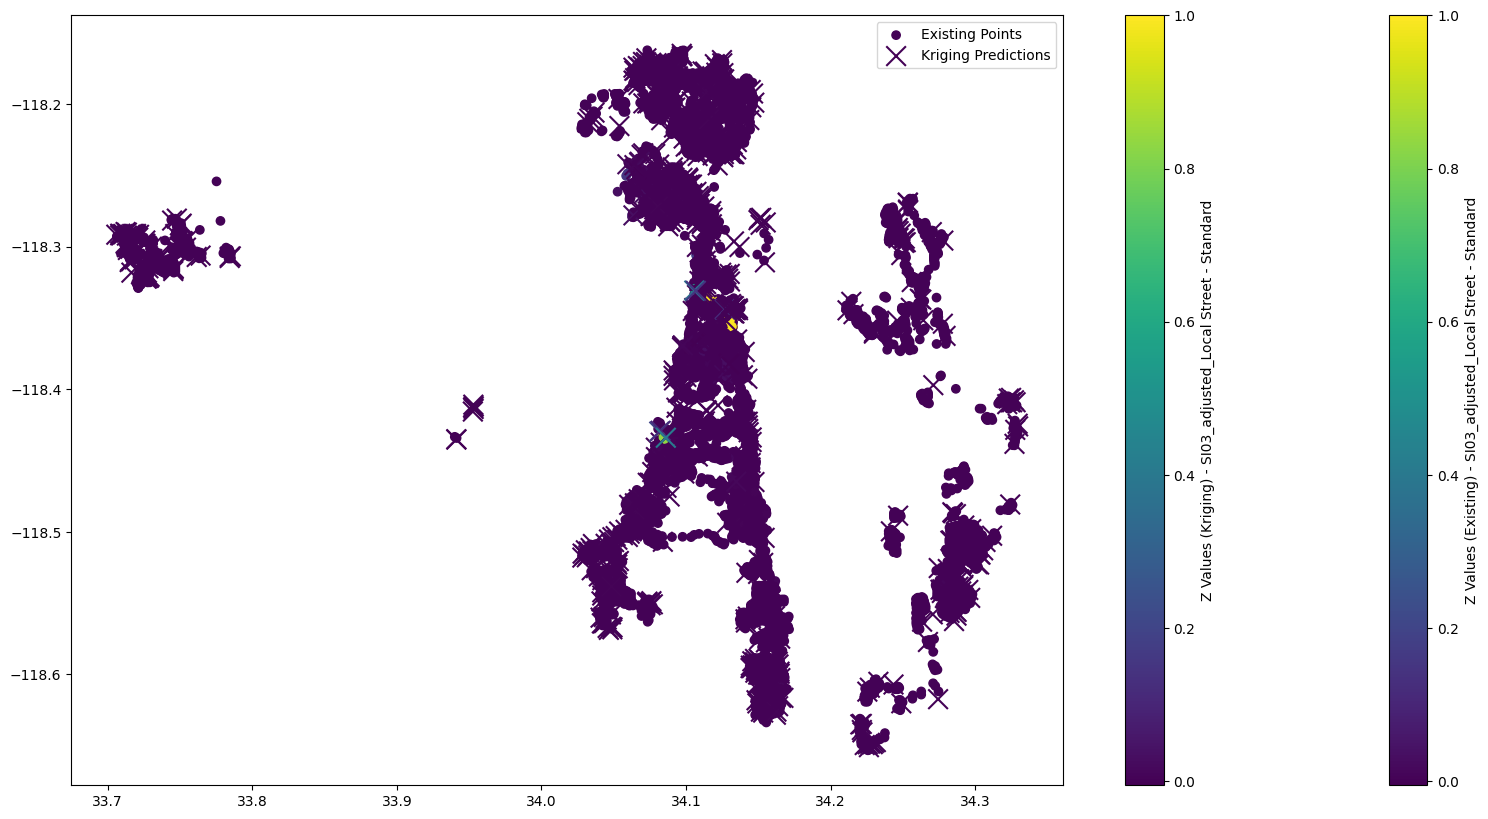

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


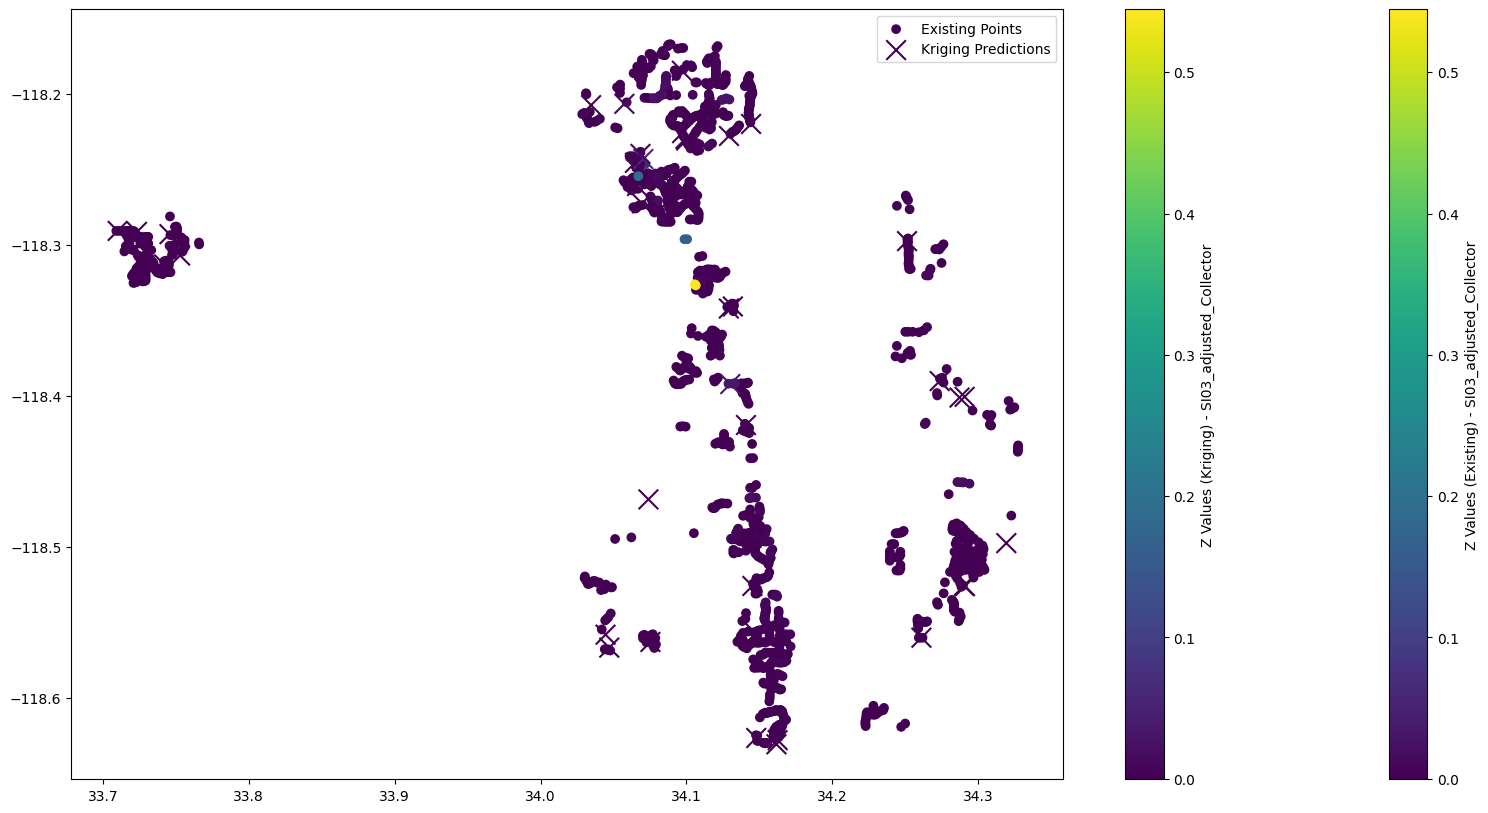

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


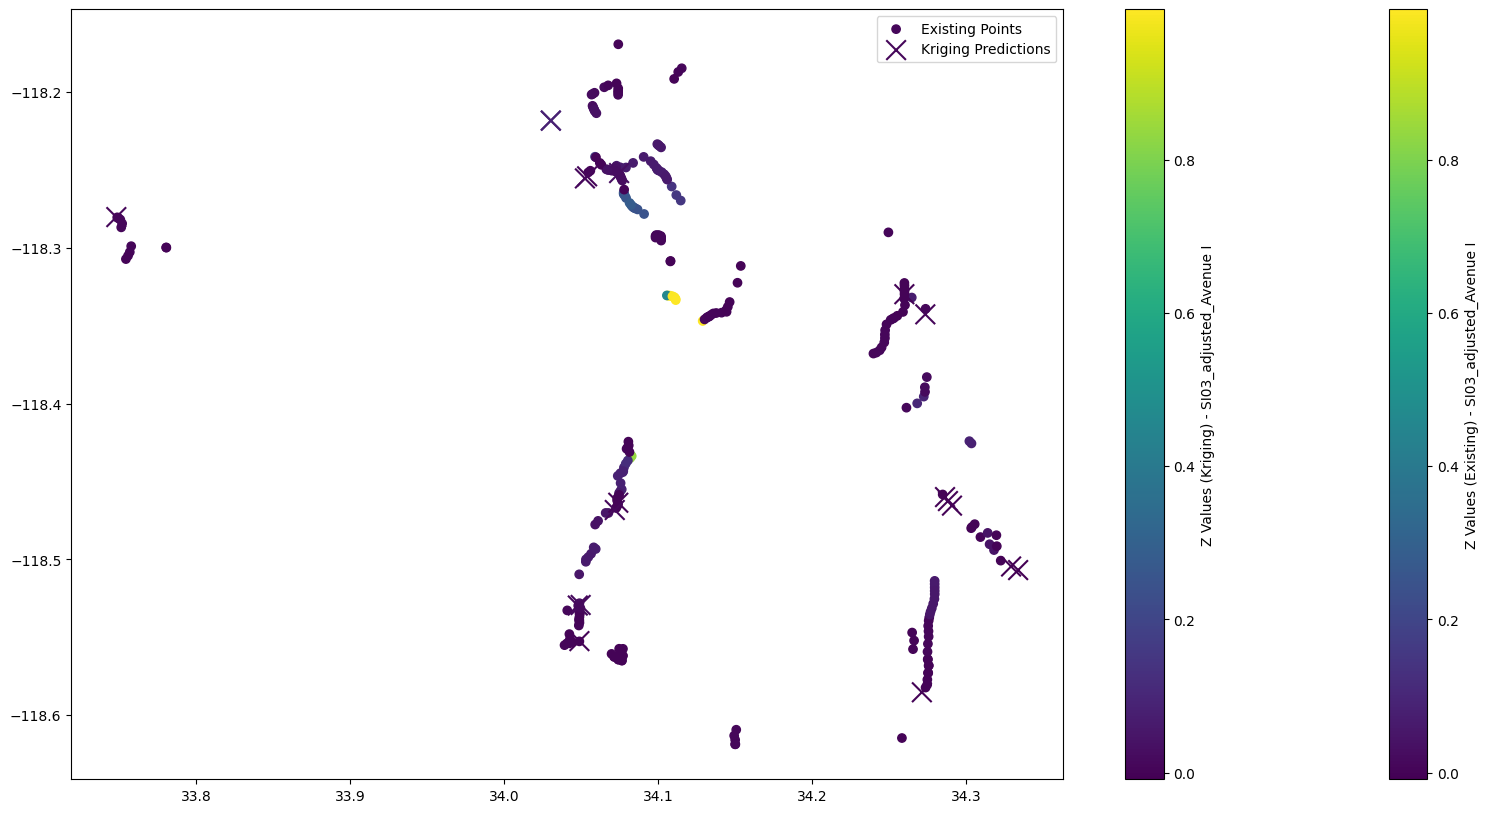

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


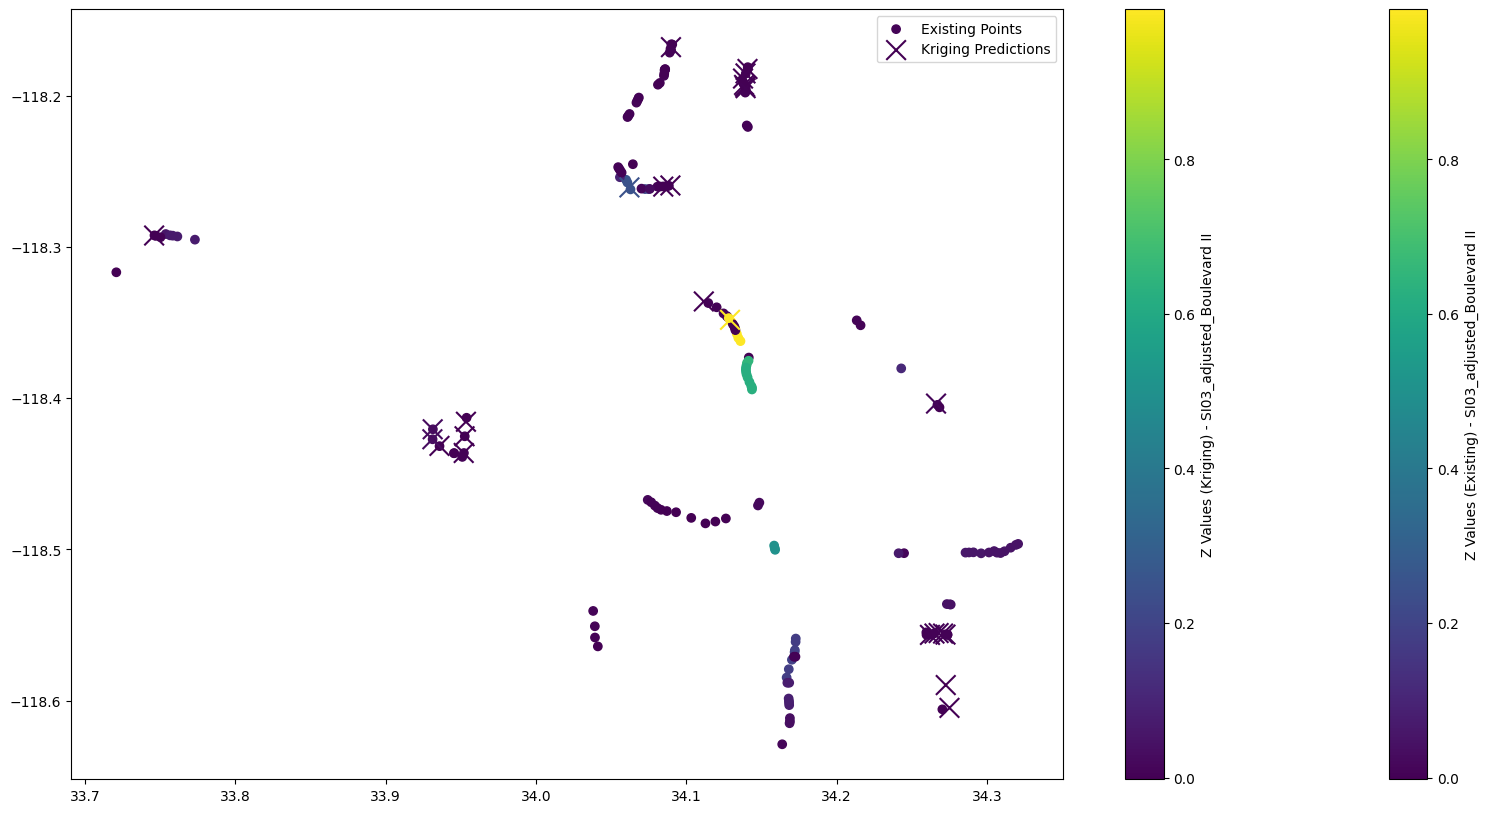

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


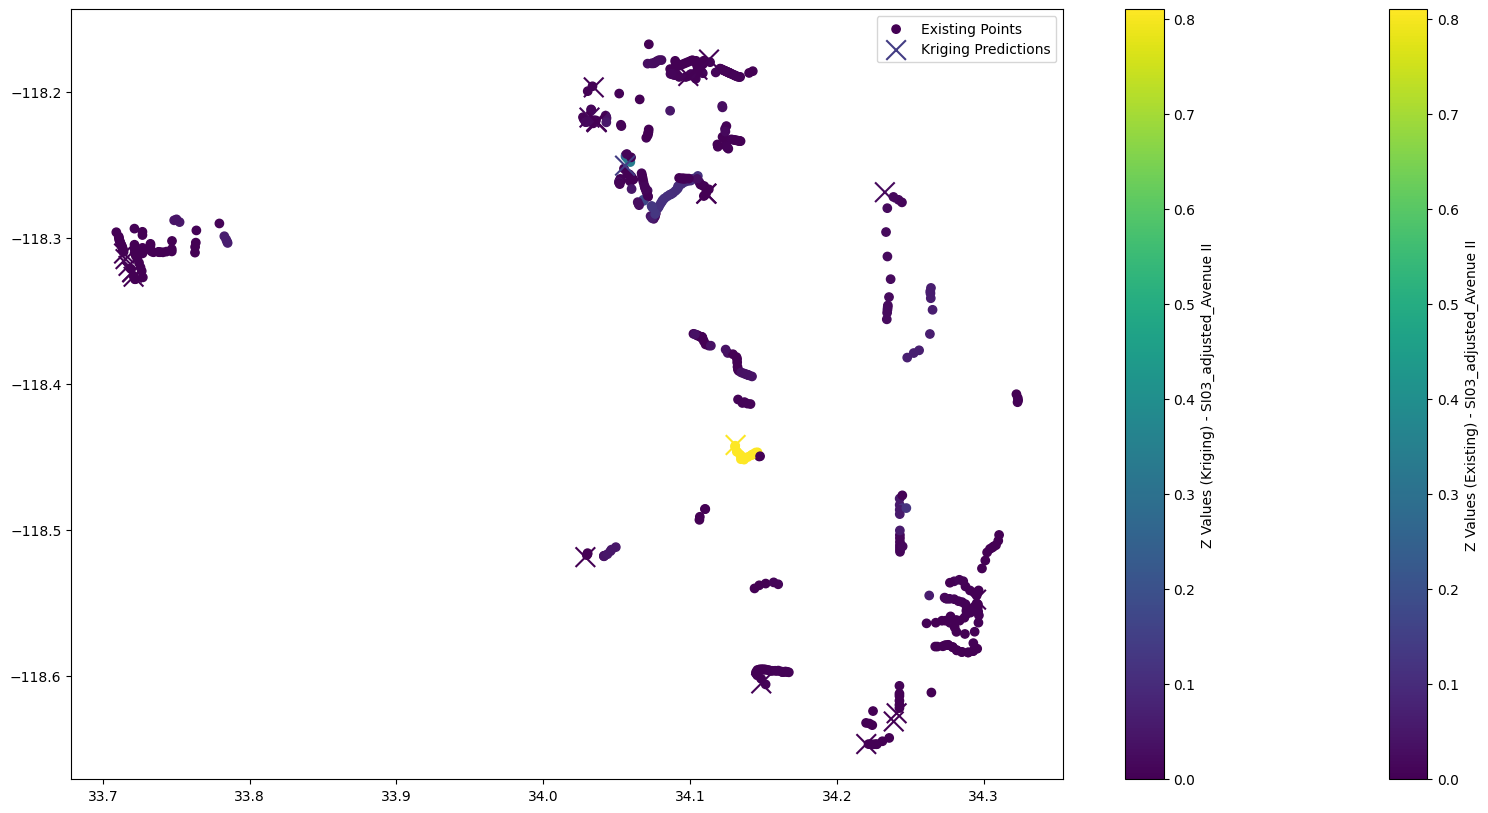

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


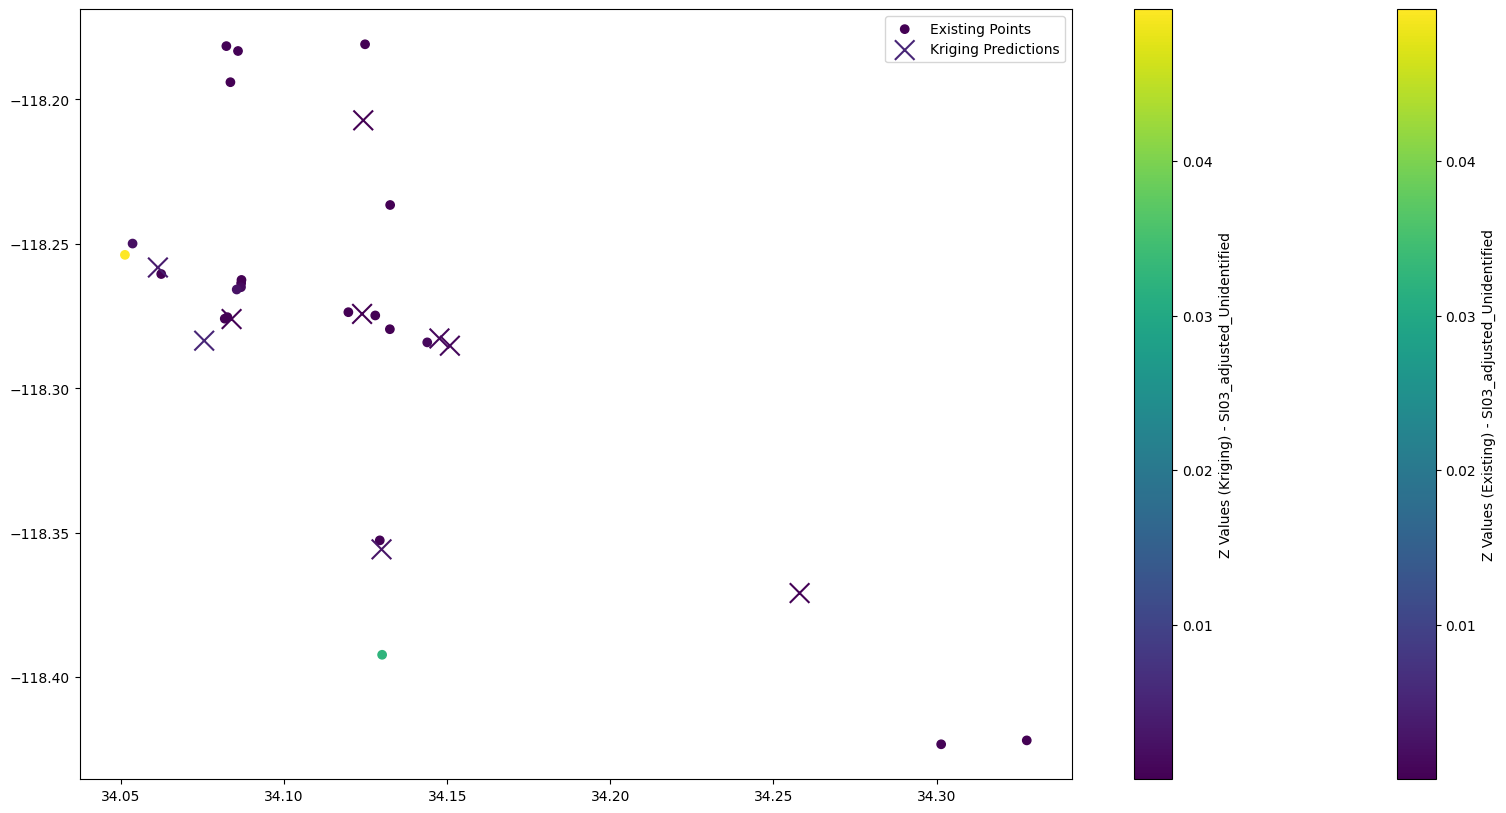

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


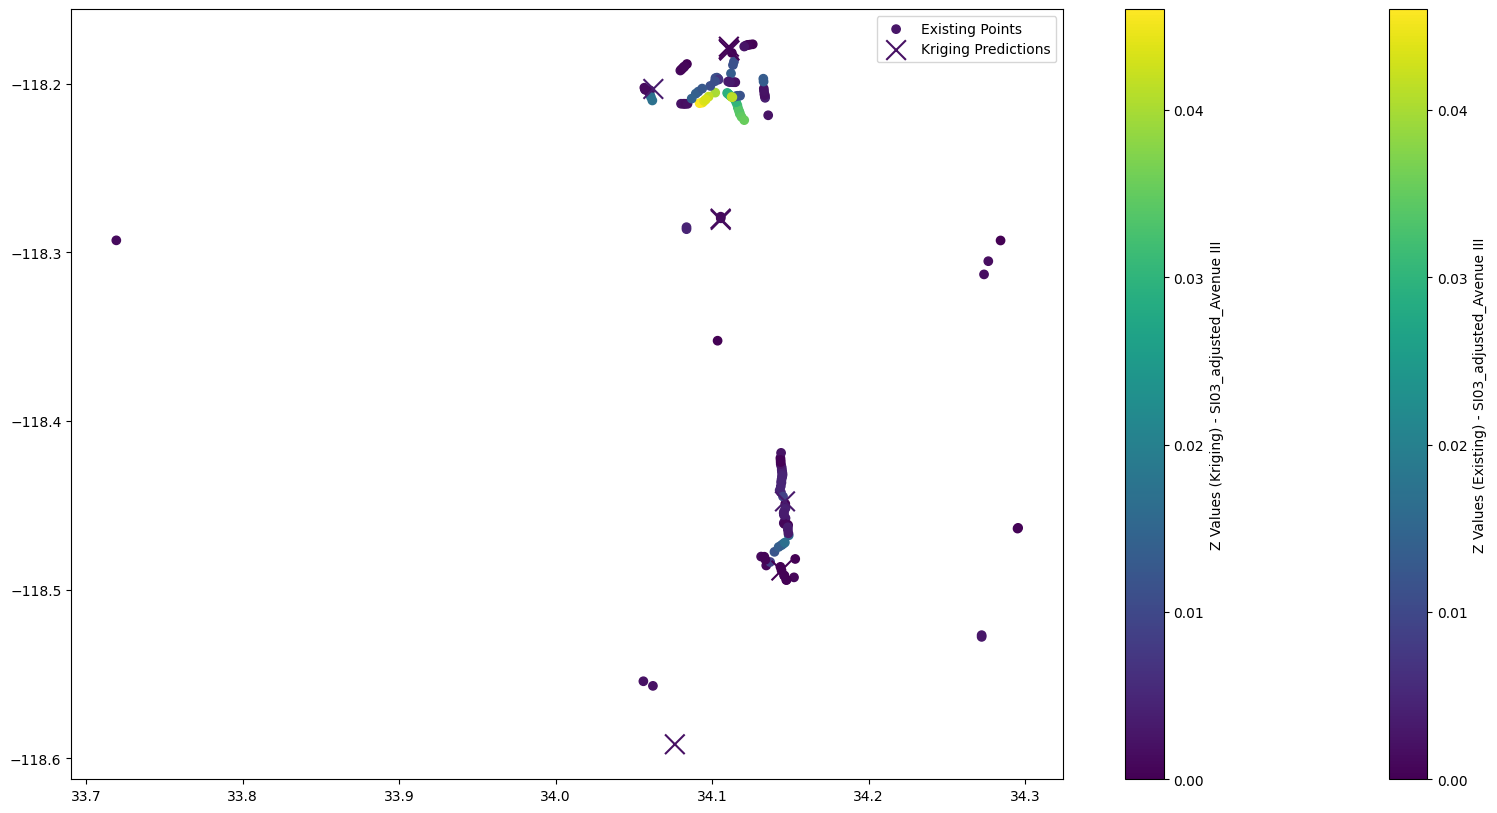

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


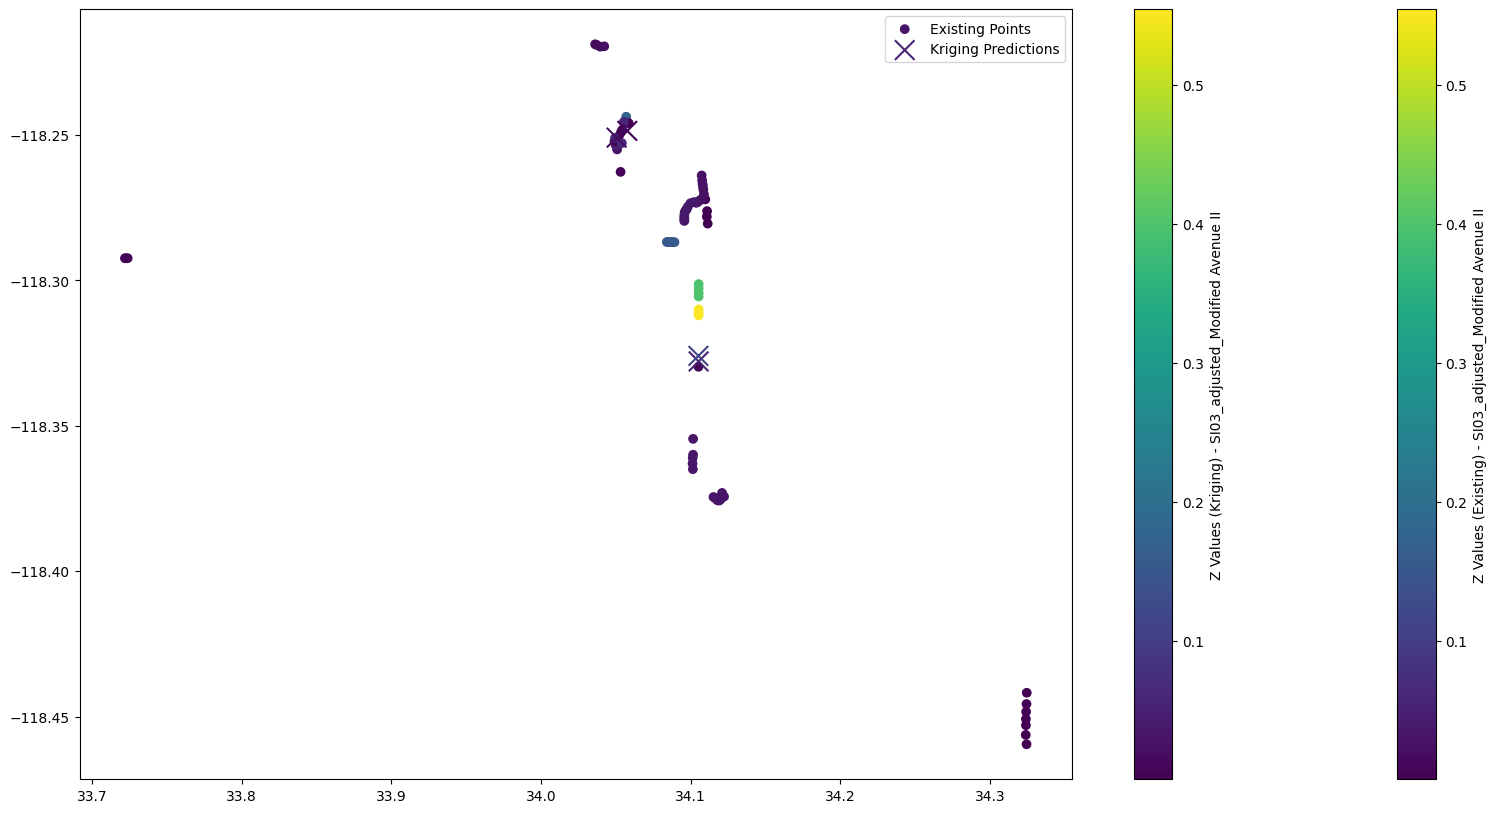

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


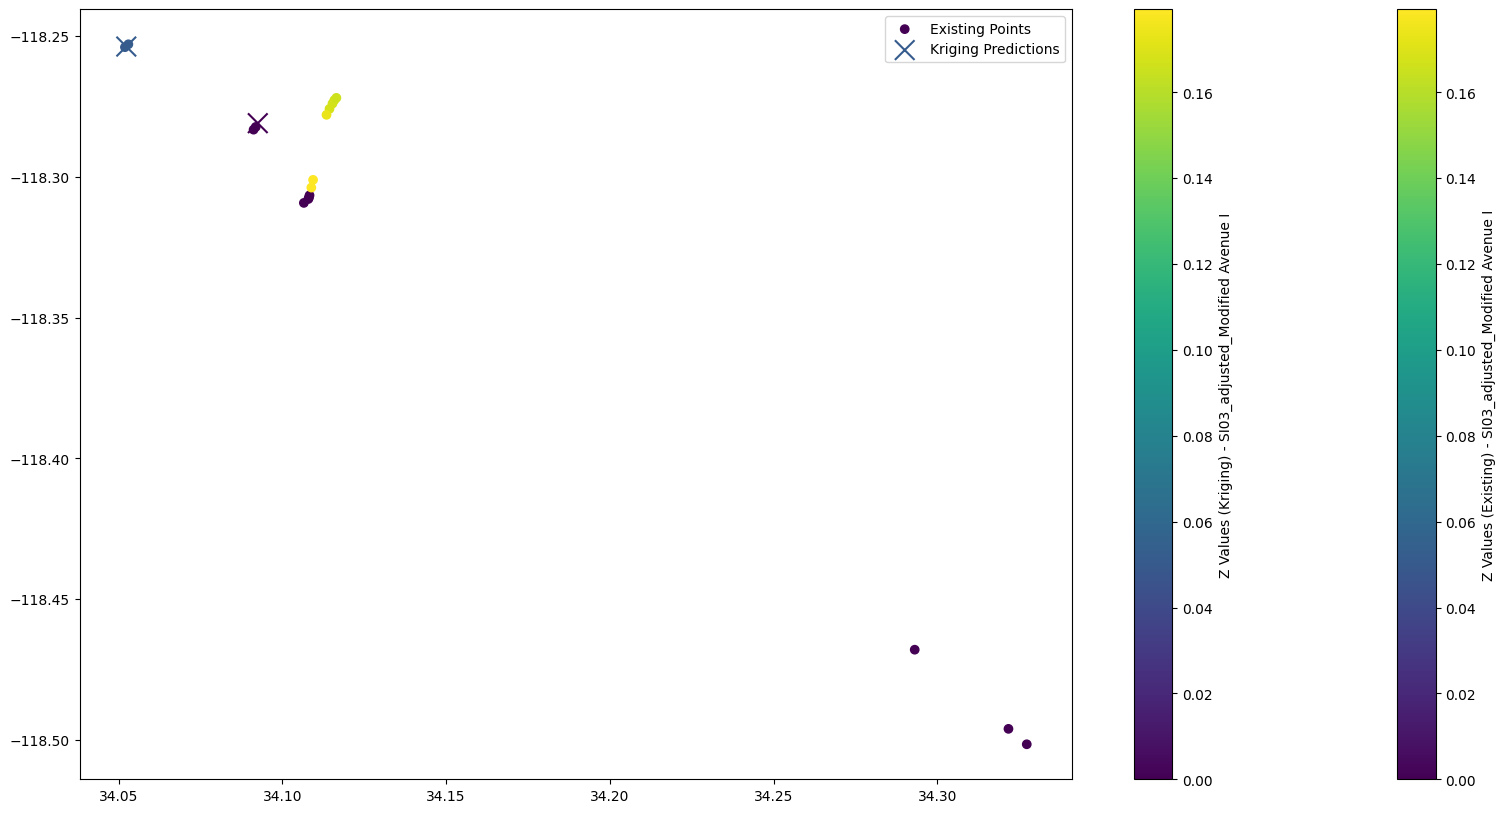

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


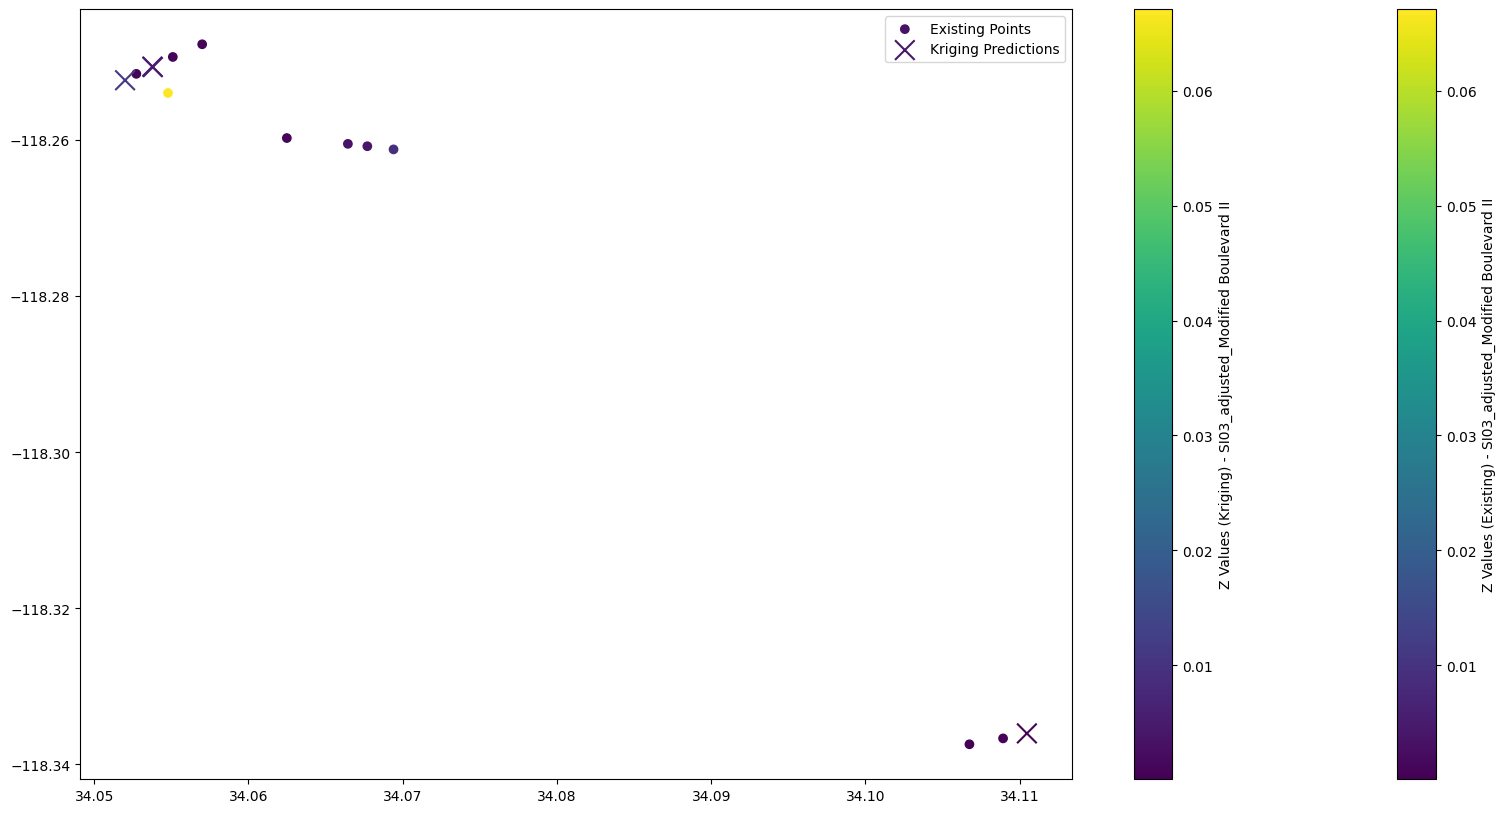

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None

 Currently updating:  S000_adjusted
Local Street - Standard

 Values in z1 are not constant.
910 values in field for designation:  Local Street - Standard
910 should ideally be updated for designation:  Local Street - Standard


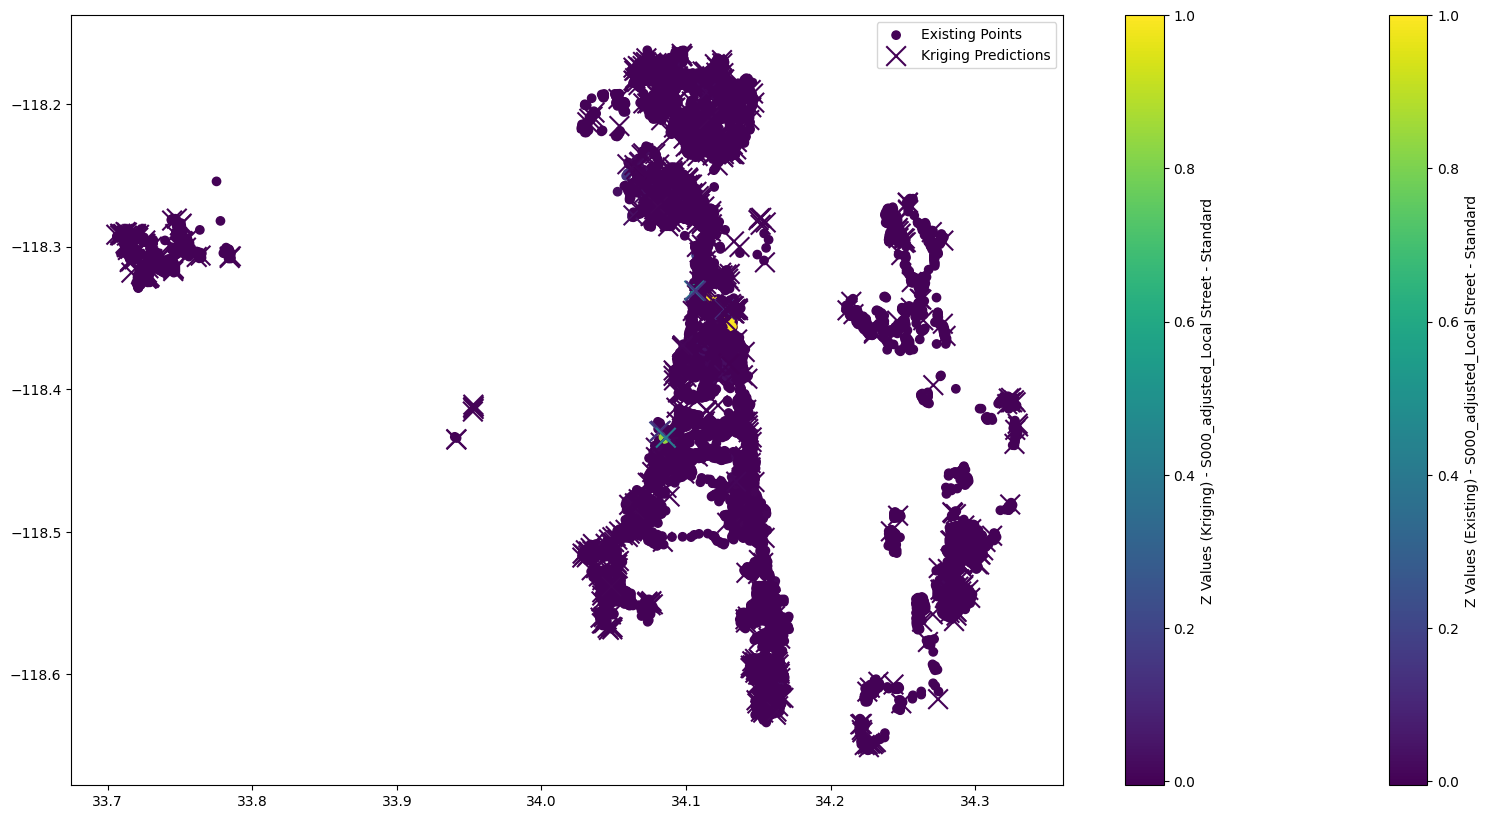

Lengths match for designation:  Local Street - Standard
Collector

 Values in z1 are not constant.
43 values in field for designation:  Collector
43 should ideally be updated for designation:  Collector


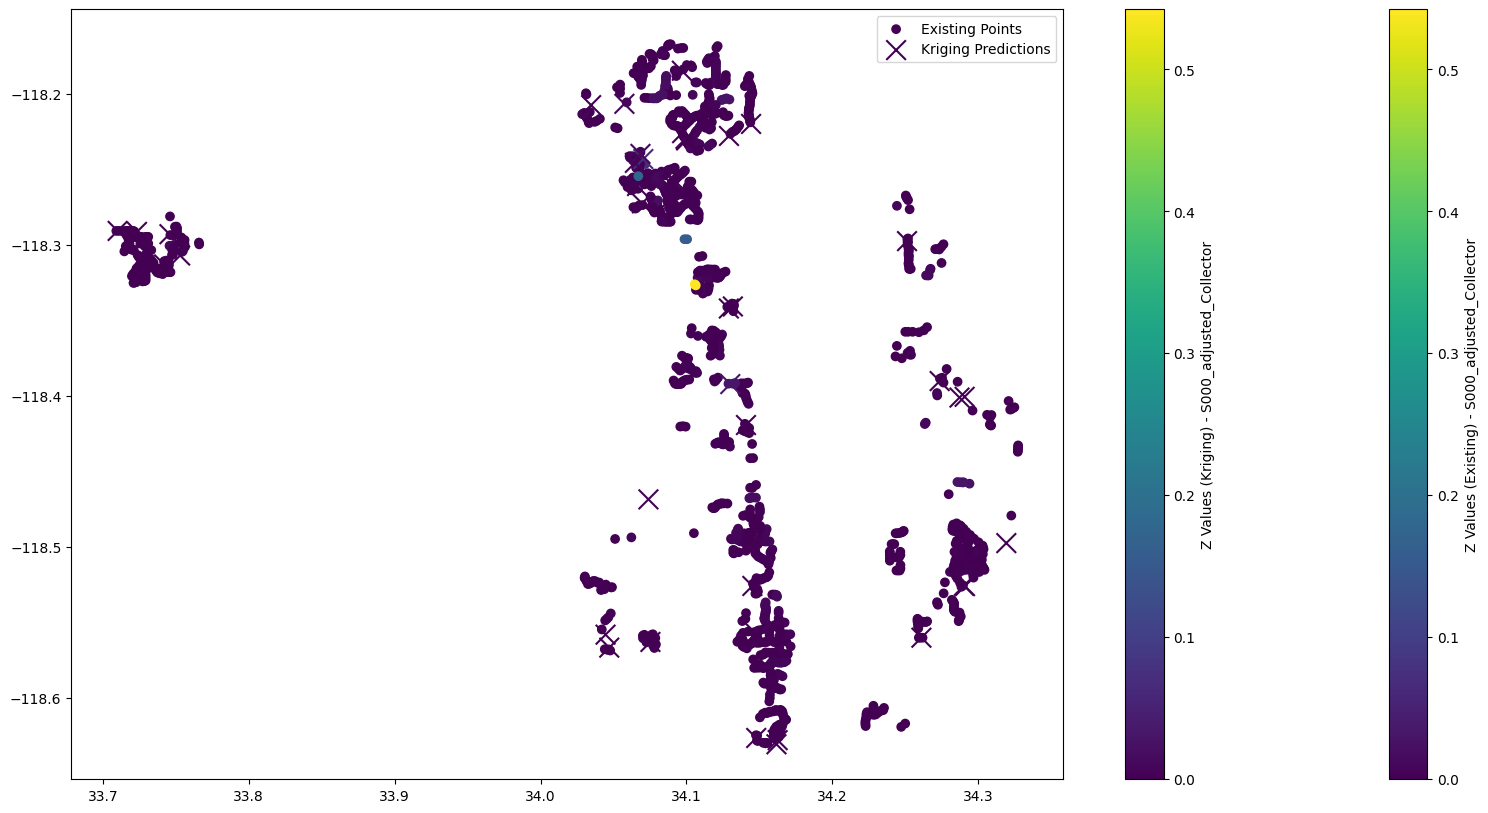

Lengths match for designation:  Collector
Avenue I

 Values in z1 are not constant.
19 values in field for designation:  Avenue I
19 should ideally be updated for designation:  Avenue I


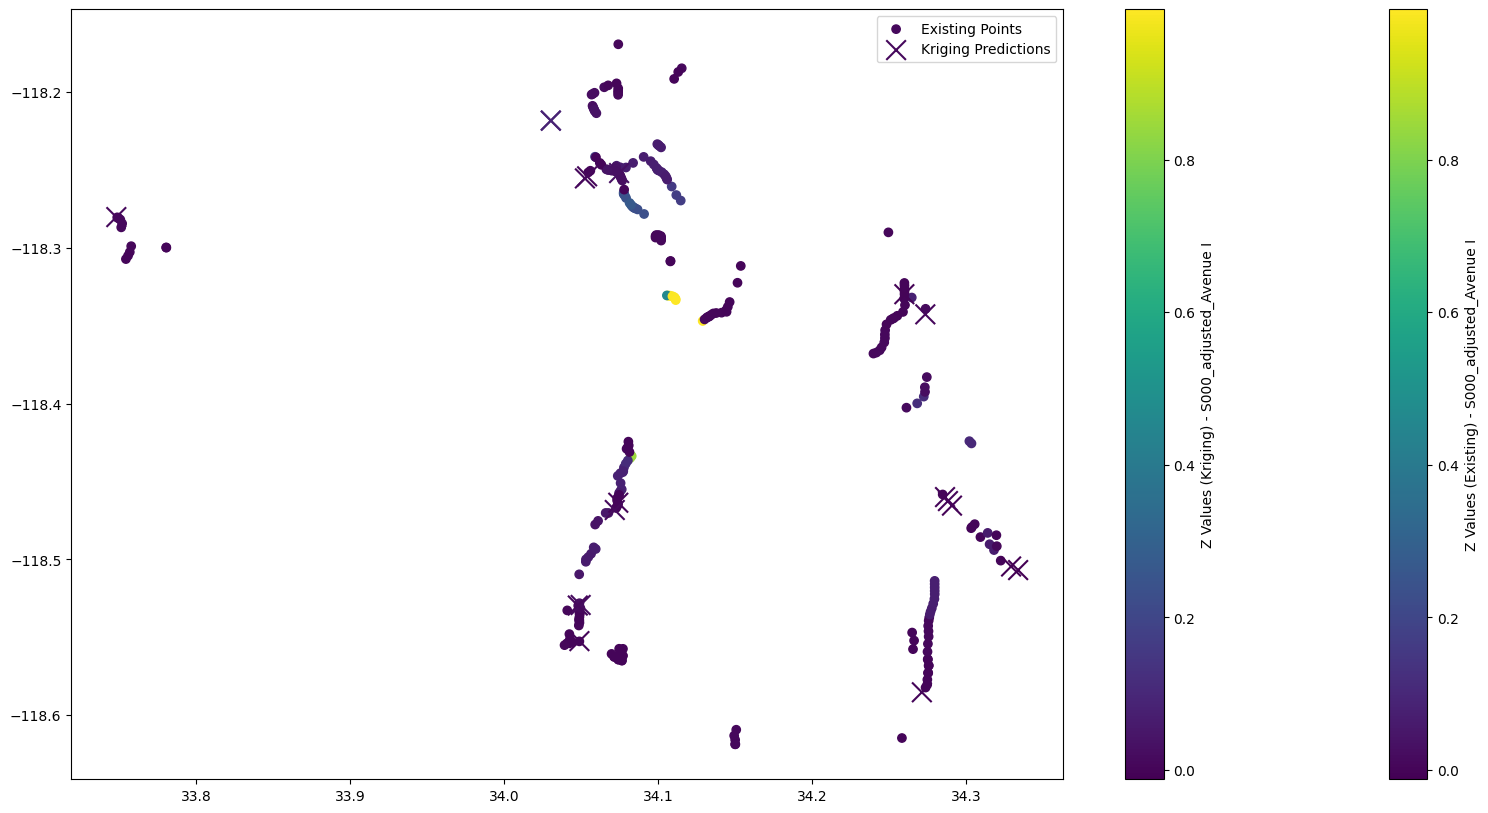

Lengths match for designation:  Avenue I
Boulevard II

 Values in z1 are not constant.
27 values in field for designation:  Boulevard II
27 should ideally be updated for designation:  Boulevard II


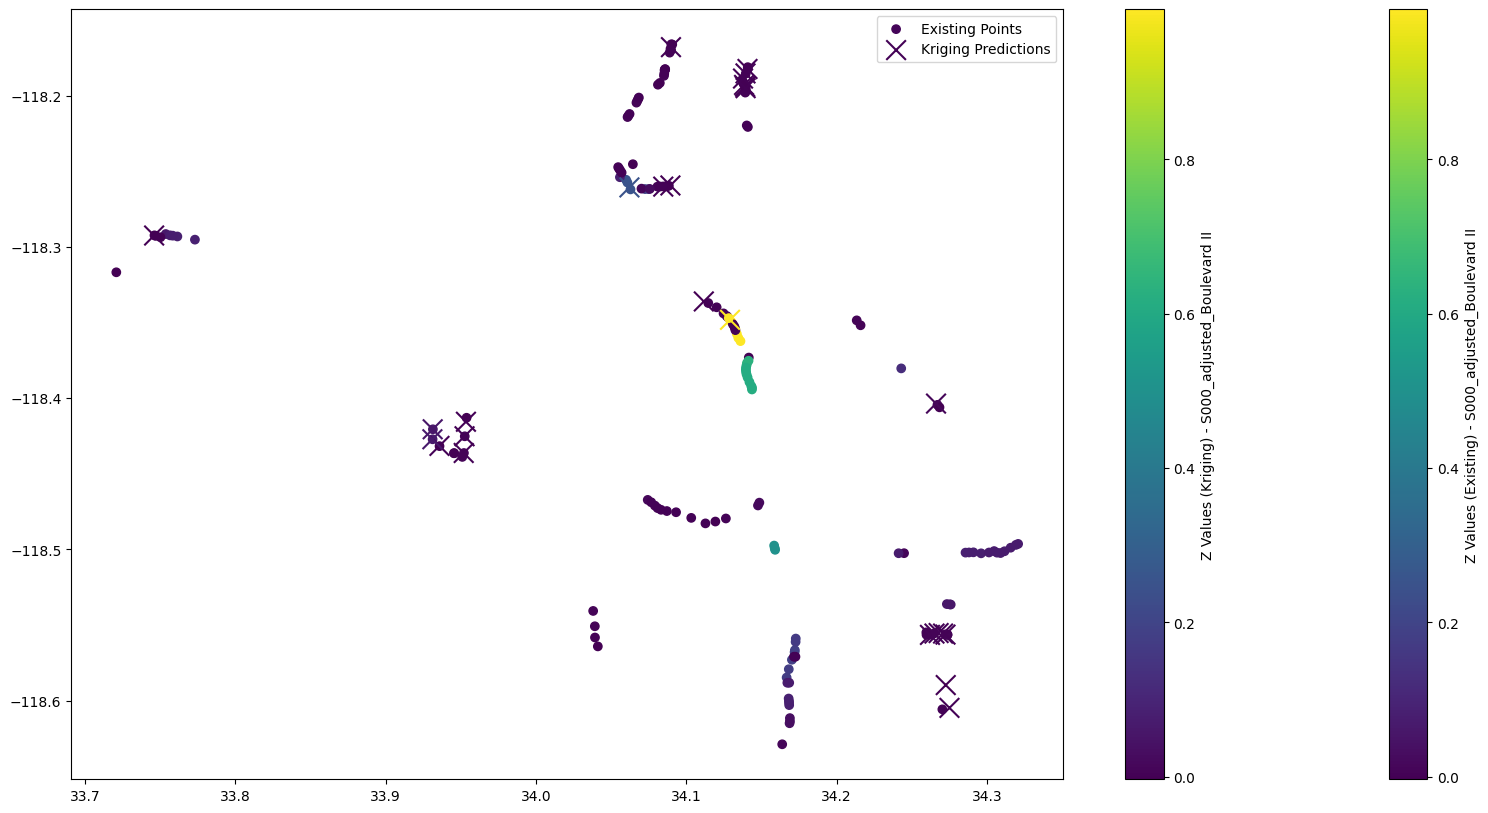

Lengths match for designation:  Boulevard II
Avenue II

 Values in z1 are not constant.
25 values in field for designation:  Avenue II
25 should ideally be updated for designation:  Avenue II


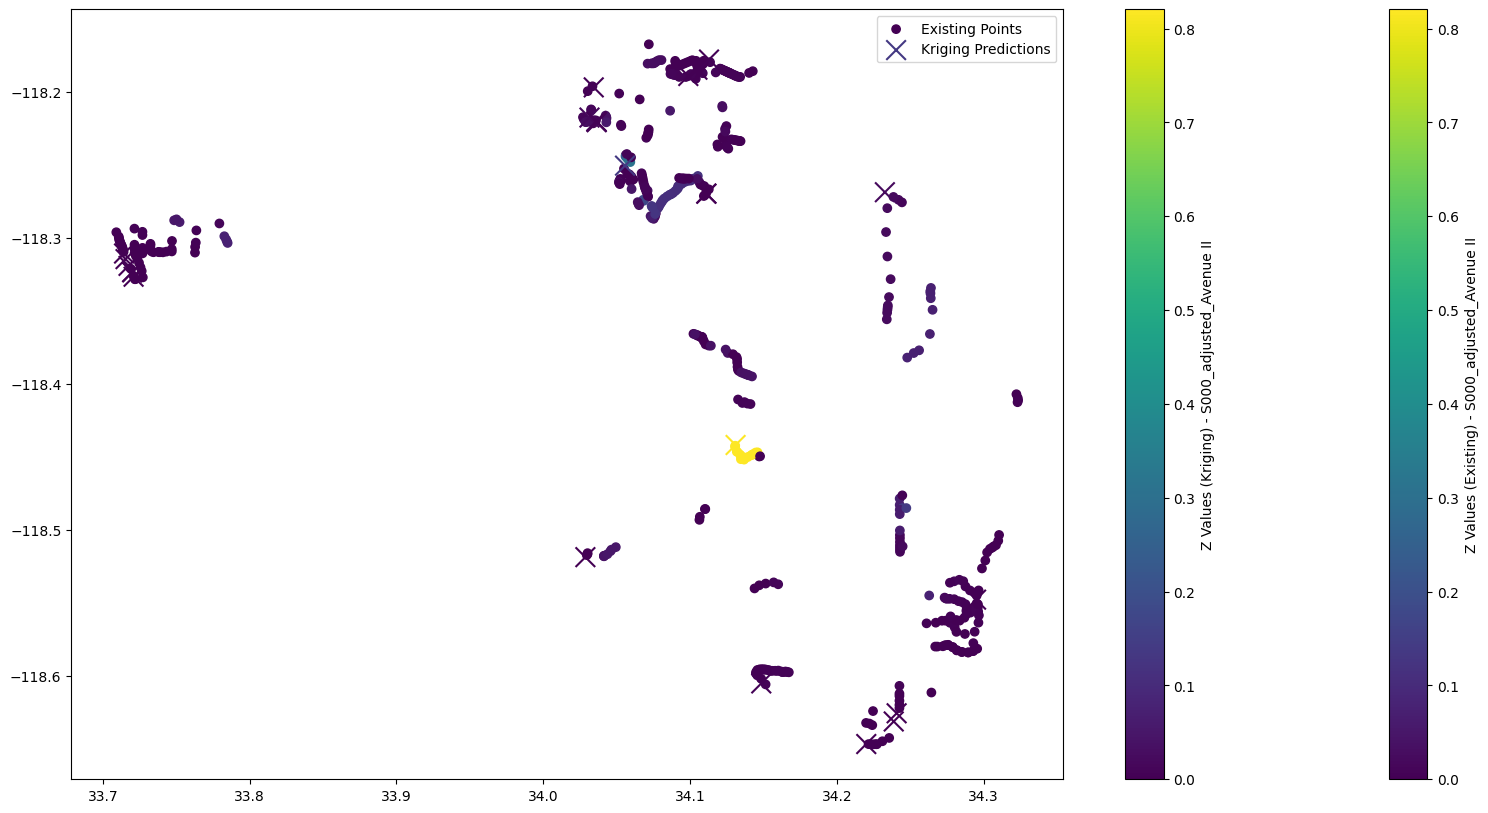

Lengths match for designation:  Avenue II
Unidentified

 Values in z1 are not constant.
10 values in field for designation:  Unidentified
10 should ideally be updated for designation:  Unidentified


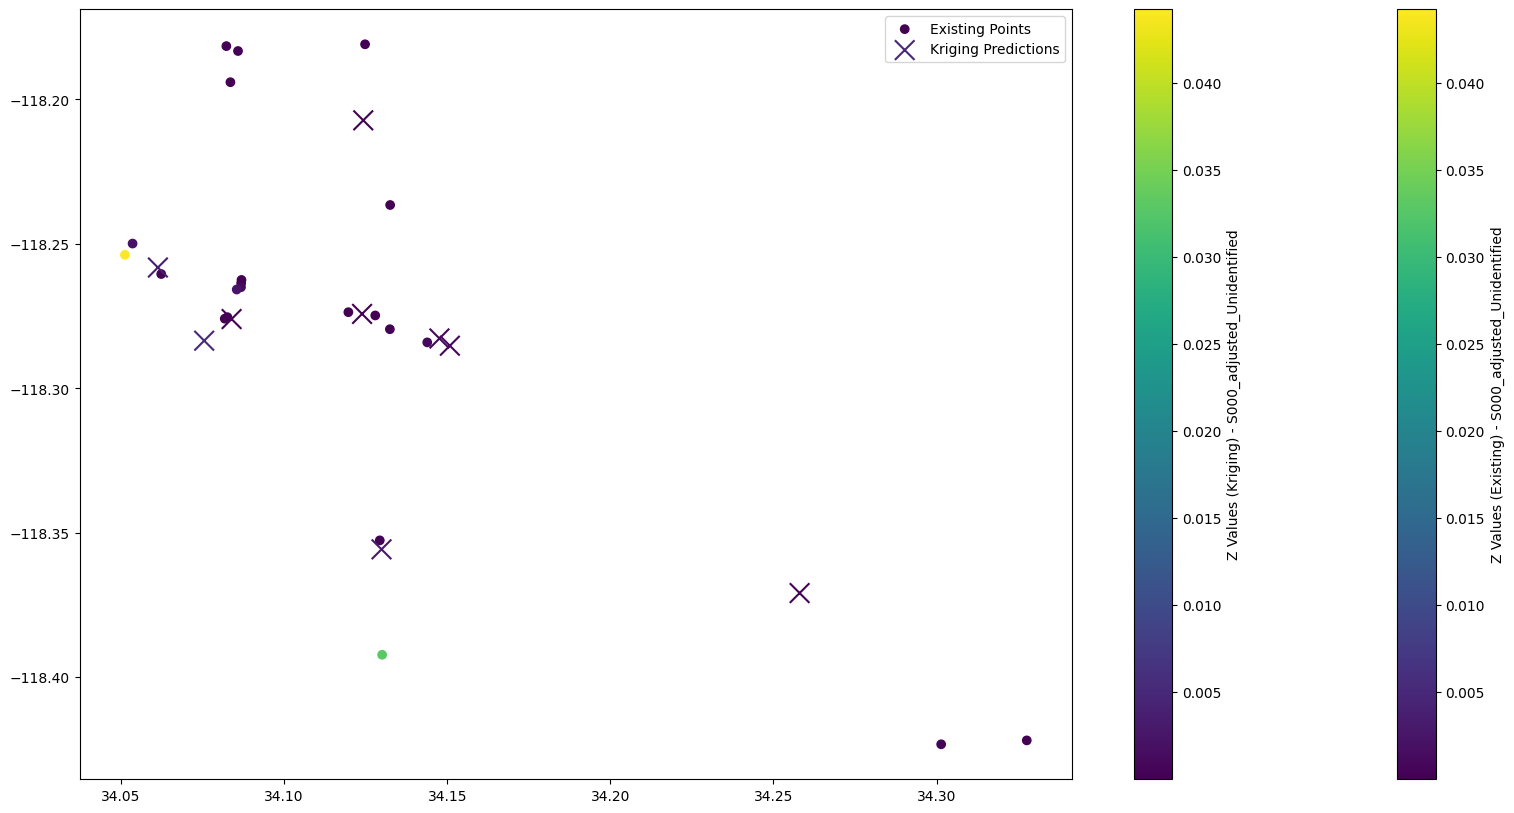

Lengths match for designation:  Unidentified
Avenue III

 Values in z1 are not constant.
11 values in field for designation:  Avenue III
11 should ideally be updated for designation:  Avenue III


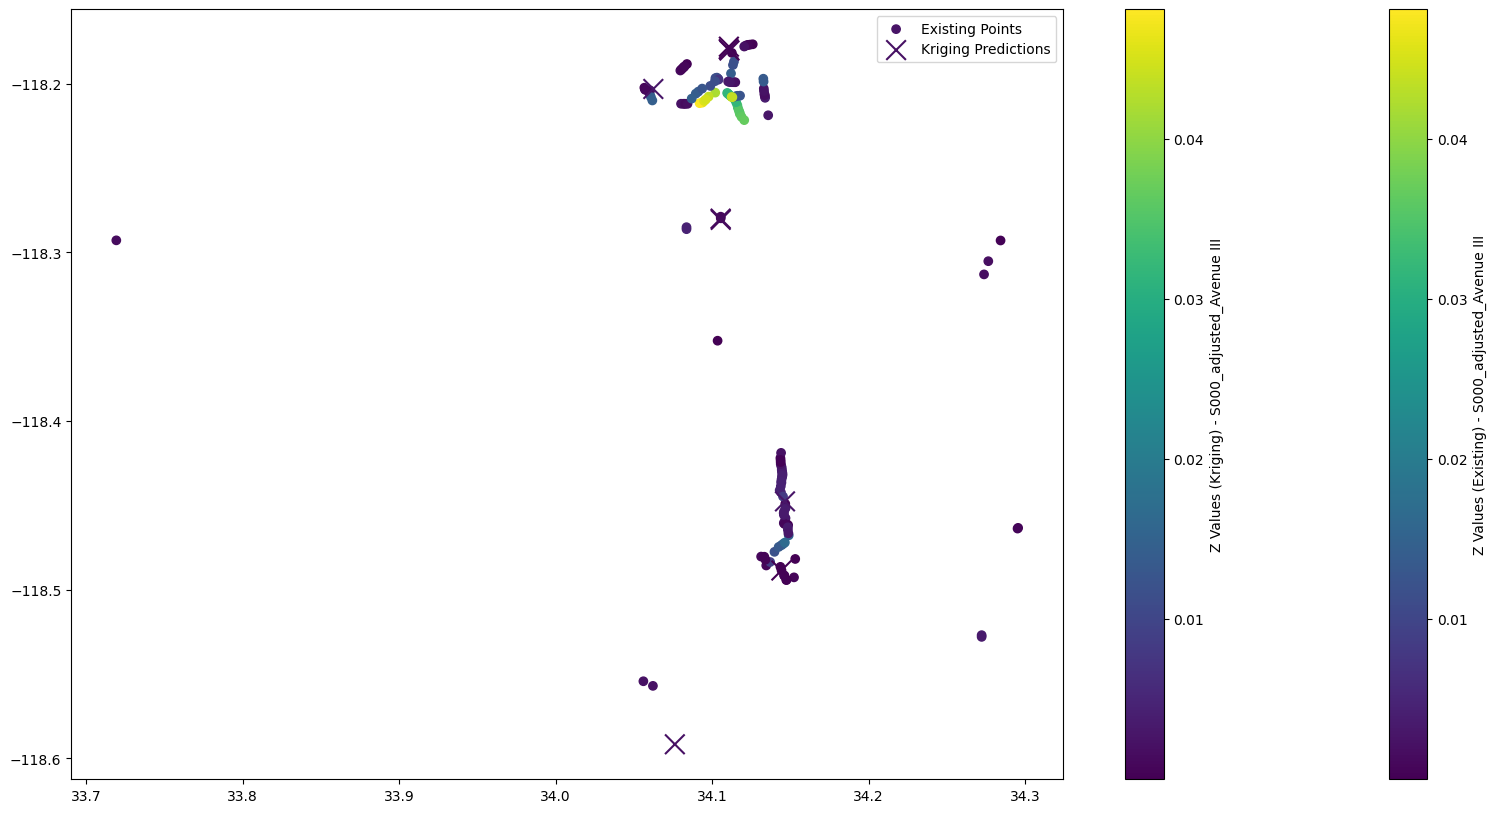

Lengths match for designation:  Avenue III
Modified Avenue II

 Values in z1 are not constant.
4 values in field for designation:  Modified Avenue II
4 should ideally be updated for designation:  Modified Avenue II


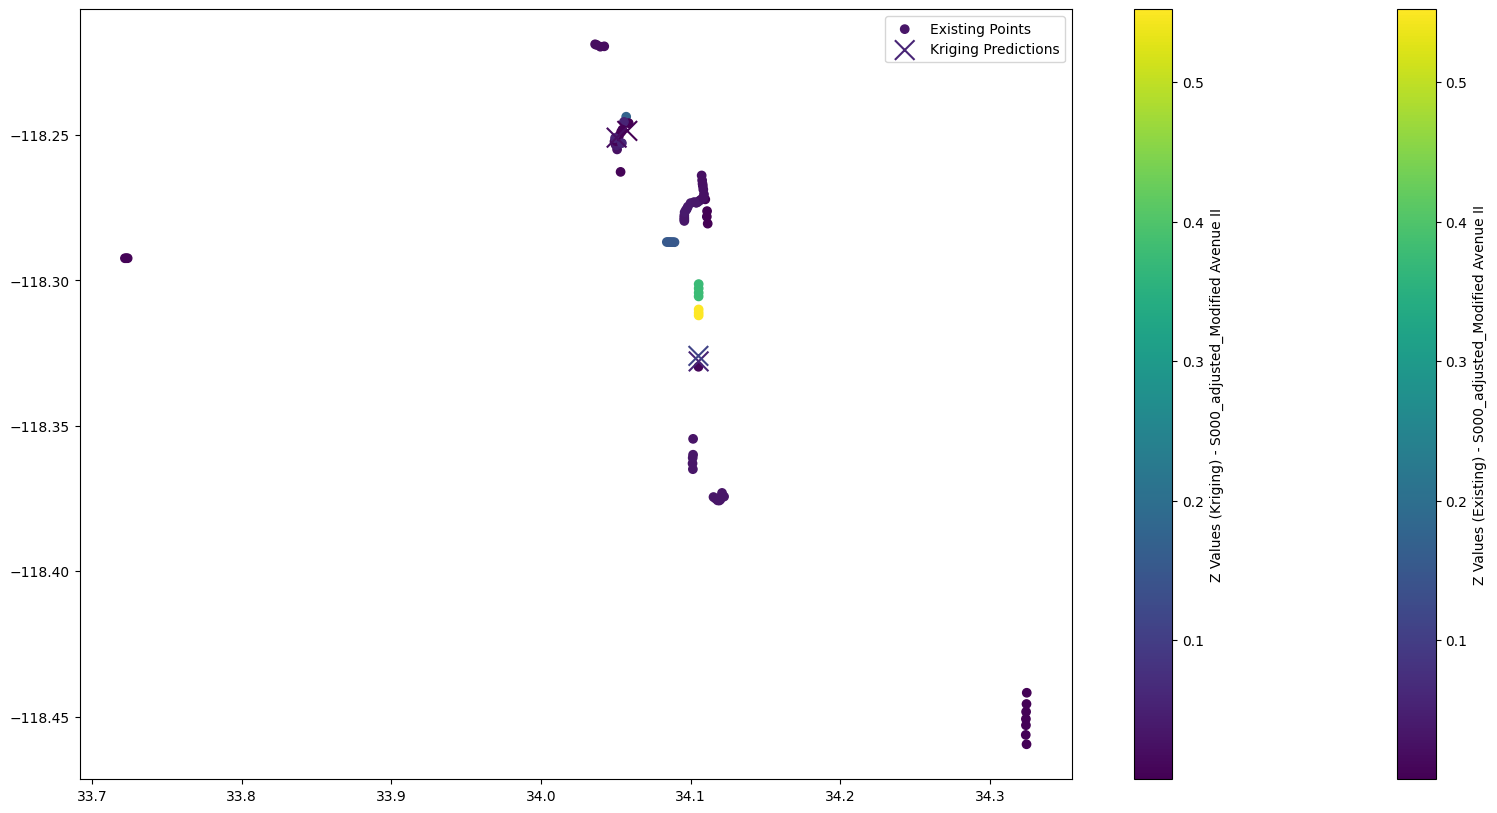

Lengths match for designation:  Modified Avenue II
Modified Avenue I

 Values in z1 are not constant.
2 values in field for designation:  Modified Avenue I
2 should ideally be updated for designation:  Modified Avenue I


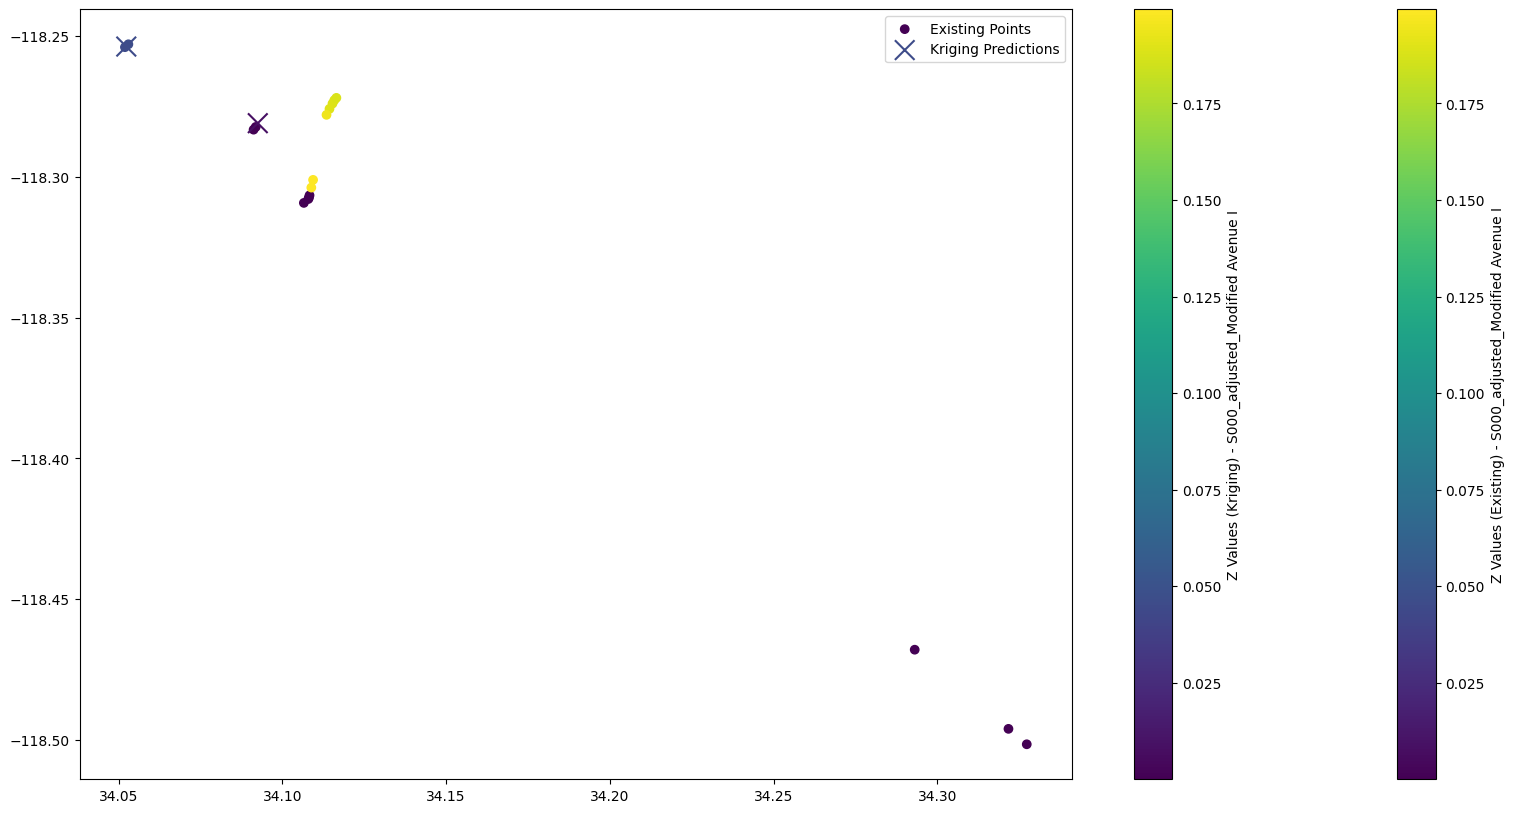

Lengths match for designation:  Modified Avenue I
Modified Boulevard II

 Values in z1 are not constant.
4 values in field for designation:  Modified Boulevard II
4 should ideally be updated for designation:  Modified Boulevard II


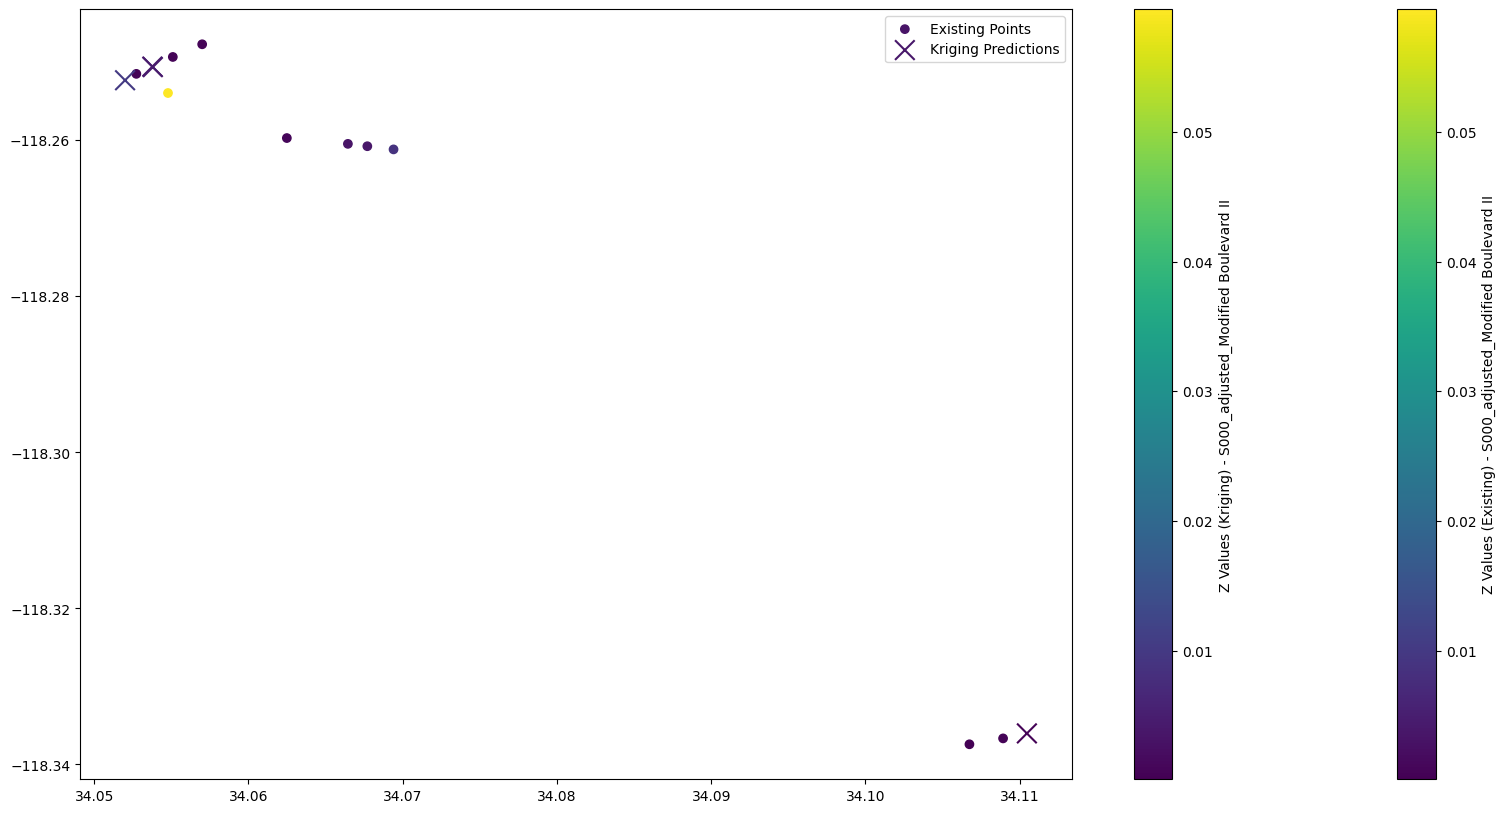

Lengths match for designation:  Modified Boulevard II
None

 No data for designation:  None


In [8]:
adj_cols = ['SA01_adjusted', 'SA02_adjusted', 'SA03_adjusted', 'SE01_adjusted', 'SE02_adjusted', 'SE03_adjusted', 'SI01_adjusted', 'SI02_adjusted', 'SI03_adjusted', 'S000_adjusted']

for col in adj_cols:
    print("\n Currently updating: ", col)
    for designation in udf['Street_Designation'].unique():
        print(designation)
        # Set x1, y1, z1 for existing points
        x1 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] != 0)]['centroid_lat'].to_numpy()
        y1 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] != 0)]['centroid_lon'].to_numpy()
        z1 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] != 0)][col].to_numpy()

        # Set x2, y2 for points to be updated (with S000_adjusted == 0)
        x2 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] == 0)]['centroid_lat'].to_numpy()
        y2 = udf[(udf['Street_Designation'] == designation) & (udf['S000_adjusted'] == 0)]['centroid_lon'].to_numpy()

        # Error handling
        if len(x1) == 0:
            print("\n No data for designation: ", designation)

        if len(z1) == 0:
            break

        else:
            # Error handling
            if len(np.unique(z1)) == 1:
                print("\n All values in z1 are constant for designation: ", designation)
            else:
                # We want z1 to be not constant for the variogram model to be created
                print("\n Values in z1 are not constant.")
                variogram_model = Variogram(np.vstack((x1, y1)).T, z1)

                # Apply Kriging to get field values for x2, y2
                ok = OrdinaryKriging(variogram_model, min_points=2, max_points=10, mode='exact')

                field = ok.transform(x2, y2)

                print(str(len(field)) + " values in field for designation: ", designation)
                print(str(len(x2)) + " should ideally be updated for designation: ", designation)
                
                # Plotting Kriging predictions
                norm = Normalize(vmin=min(np.min(z1), np.min(field)), vmax=max(np.max(z1), np.max(field)))
                fig_name = str(col) + "_" + str(designation)

                plt.figure(fig_name, figsize=(20, 10))

                scatter1 = plt.scatter(x1, y1, c=z1, norm=norm, marker='o', label='Existing Points')
                scatter2 = plt.scatter(x2, y2, c=field, norm=norm, marker='x', s=200, label='Kriging Predictions')

                sample_label = 'Z Values (Existing) - ' + str(fig_name)
                kriging_label = 'Z Values (Kriging) - ' + str(fig_name)

                cbar = plt.colorbar(scatter1, label=sample_label)
                cbar2 = plt.colorbar(scatter2, label=kriging_label)
                plt.legend()
                plt.savefig("kriging_visuals/figure_" + str(fig_name) + ".png", format='png', dpi=200)
                plt.show()

                # Update udf with kriging predictions
                if len(x2) == len(field):
                    print("Lengths match for designation: ", designation)
                    for i in range(len(x2)):
                        udf.loc[(udf['centroid_lat'] == x2[i]) & (udf['centroid_lon'] == y2[i]), col] = field[i]

                else:
                    print("Lengths do not match for designation: ", designation)

In [9]:
print("Before Kriging - number of rows with 0 in S000_adjusted: ", len(udf_before[(udf_before['S000_adjusted'] == 0)]))
print("After Kriging - number of rows with 0 in S000_adjusted: ", len(udf[(udf['S000_adjusted'] == 0)]))

Before Kriging - number of rows with 0 in S000_adjusted:  1081
After Kriging - number of rows with 0 in S000_adjusted:  26


In [10]:
udf.to_file(r"hillside_inventory_LA_centrality_full_new_evacmidnorth_lodes_kriging.geojson", driver='GeoJSON')